<span style='font-size:120%;'>
    <a id='nan'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Cascadia code;'>
        <center> Intrusion Detection System </center>
    </h1>
</span>

<div style="text-align:center;">
    <img src="gif_title.gif" alt="Machine Learning Project" style="width: 400px; float: left;">
    <img src="1-s2.0-S1110016820300223-gr4.jpg" alt="Machine Learning Project" style="width: 400px; float: right;">
</div>



<p><h1 style="color:red;font-weight:bolder;">I/ Bussiness Understanding</h1>

<h4 style="color:green;">  Problem Explanation :</h4>

<b>An Intrusion Detection System (IDS) is a fundamental component of cybersecurity, serving as a vigilant guardian against potential threats to computer networks. Whether in the form of a Host-based IDS (HIDS) overseeing individual devices or a Network-based IDS (NIDS) scrutinizing the broader network traffic, these systems meticulously monitor activities to identify signs of malicious behavior or security breaches. By analyzing patterns, anomalies, and deviations from normal operations, an IDS aims to promptly detect and alert administrators to potential intrusions. This early warning system plays a crucial role in fortifying the security posture of organizations, allowing for swift responses and mitigative actions to safeguard against cyber threats and unauthorized access.</b>

<h4 style="color:green;">  Business Objectives :</h4>


BO1 : Understand data behavior.

DSO1: Perform descriptive data analysis.

BO2 : Detect network intrusions and cyber attacks in real-time to protect systems and data. The dataset contains information on different types of network connections that could be used to train models to flag anomalous or malicious activity.

DSO2 : Detect anomalies and ** outliers** in network traffic that could indicate intrusions or malware.

BO3 : Improve network security policies and configurat
BO3 : Improve network security policies and configurations.

DSO3: Detect anomalies and outliers in network traffic that could indicate intrusions or malware

Business Objective 1 (BO1): Gain insights into data behavior and patterns.

Data Science Objective 1 (DSO1): Apply machine learning and data-driven techniques to highlight various behaviors, with a focus on anomaly detection.

Business Objective 2 (BO2): Identify malicious activities on the network and distinguish abnormal behavior from the normal baseline.

Data Science Objective 2 (DSO2): Employ classification methods, such as k-nearest neighbors (KNN), to categorize diverse activities as either anomalous or normal.

Business Objective 3 (BO3): Mitigate potential attacks.

Data Science Objective 3 (DSO3): Forecast and anticipate future attacks.

<p><h1 style="color:red;font-weight:bolder;">II/ Data Understanding</h1></p>

<img src="https://www.fireblazeaischool.in/blogs/wp-content/uploads/2020/06/Python-Libraries-1068x712.png" align='center' style="width:60%;height:82%"></center>

In [24]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing the dataset ⬇️ </center>
    </h1>
</div>

In [25]:
columns = ['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level']

In [26]:
train = pd.read_csv('KDDTrain+.txt',names=columns)

In [27]:
test = pd.read_csv('KDDTest+.txt',names=columns)

In [28]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [29]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


<div style='font-size:100%;'>
    <a id='features'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Definition of features and target 🎯</center>
    </h1>
</div>

In [30]:
train.shape

(125973, 43)

In [31]:
test.shape

(22544, 43)

✅We can mention that our test dataset has 22544 records and 43 features.


<h4 style="color:green;"> Feature description:</h4>



Feature|Description
-------|-----------------
Duration|duration of connection(in seconds)
protocol_type|type of protocol
Service|Network type
Flag|Flag status
Src_bytes|Number of bytes transferred from source to destination
Dst_bytes|Number of bytes transferred from destination to source
Land|If connection is to same host land=1 else 0
Wrong_fragment|Number of wrong fragments
Urgent|Number of urgent packets
Hot|Number of “hot” indicatorsh
Num_failed_logins|Number of failed logins
Logged_in|If logged in logged_in=1else 0
num_compromised|Number of compromised conditions
root_shell|If root shell is obtained root_shell=1 else 0
su_attempted|If “su root” accesses su_attempted=1 else 0
num_root|Number of accessed roots
num_file_creations|Number of file creations
num_shells|Number of shell prompt
num_access_files|Number of operations on access files
num_outbound_cmds|Number of outbound commands
is_host_login|If login is hot is_host_login=1 else 0
is_guest_login|If login is guest is_guest_login=1 else 0
Count_No|Number of connections to the same host in last 2 seconds
srv_count|Number of connections to the same service in last 2 seconds
serror_rate|Percentage of connection with syn error
srv_serror_rate|Percentage of connection with syn error
rerror_rate|Percentage of connection with rej error
srv_rerror_rate|Percentage of connection with rej error
same_srv_rate|Percentage of connection of same service
diff_srv_rate|Percentage of connection of different service
srv_diff_host_rate|Percentage of connection of different hosts
dst_host_count Number|of connections of same destination host
dst_host_srv_count|Number of connections of same destination host and service
dst_host_same_srv_rate|Percentage of connections having same destination host and service
dst_host_diff_srv_rate|Percentage of connections having different service on current host
dst_host_same_src_port_rate|Percentage of connections of current host having same src port
dst_host_srv_diff_host_rate|Percentage of connection of same service and different hosts
dst_host_serror_rate|Percentage of connections of current host having S0 error
dst_host_srv_serror_rate|Percentage of connections of current host of a service having S0 error
dst_host_rerror_rate|Percentage of connections of current host that have rst error
dst_host_srv_rerror_rate|Percentage of connections of current host of service that have rst error
xAttack|Type of attack

Our dataset contains 42 features including the target variable which is xAttack.

In [32]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [33]:
feature_counts = train.dtypes.value_counts()
for dtype, count in feature_counts.items():
    print(f"Number of {dtype} features: {count}")

Number of int64 features: 24
Number of float64 features: 15
Number of object features: 4


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Explore Descriptive Statistics: ⬇️ </center>
    </h1>
</div>

In [34]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [35]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Data Visualization 📊 </center>
    </h1>
</div>

<h4 style="color:green;"> Representation of quantitative variables:</h4>

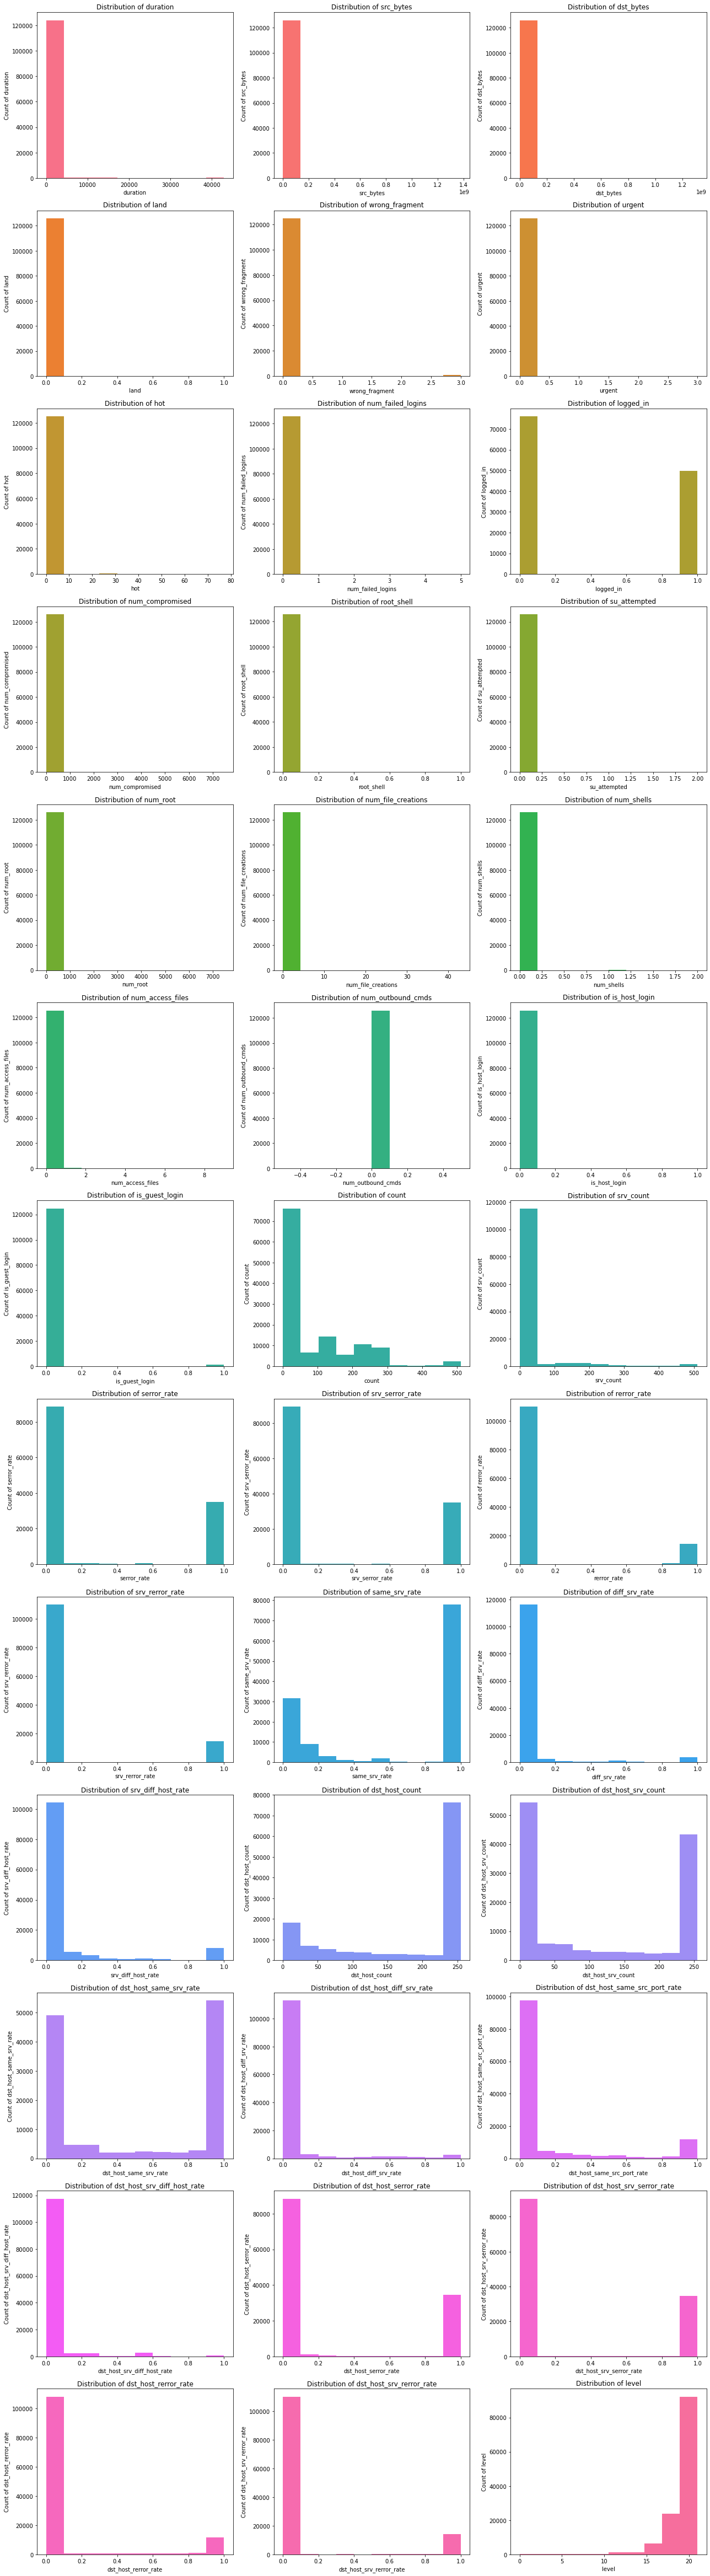

In [36]:
numeric_cols = train.select_dtypes('number').columns
num_rows = len(numeric_cols) // 3 + len(numeric_cols) % 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))
axes = axes.flatten()
colors = sns.color_palette("husl", n_colors=len(numeric_cols))
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(train[col], color=colors[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Count of {}'.format(col))
    ax.set_title('Distribution of {}'.format(col))
plt.tight_layout()
plt.show()

✅ As we can see some features have fair and balanced distribution such as dst-host_same_srv_rate , same_srv_rate etc.. Others have a category that covers the largest proportion for example is_guest_login,num_access_files. And we can mention that some have a single value such as num_outbound_cmds.

<h4 style="color:green;"> Representation of qualitative variables:</h4>

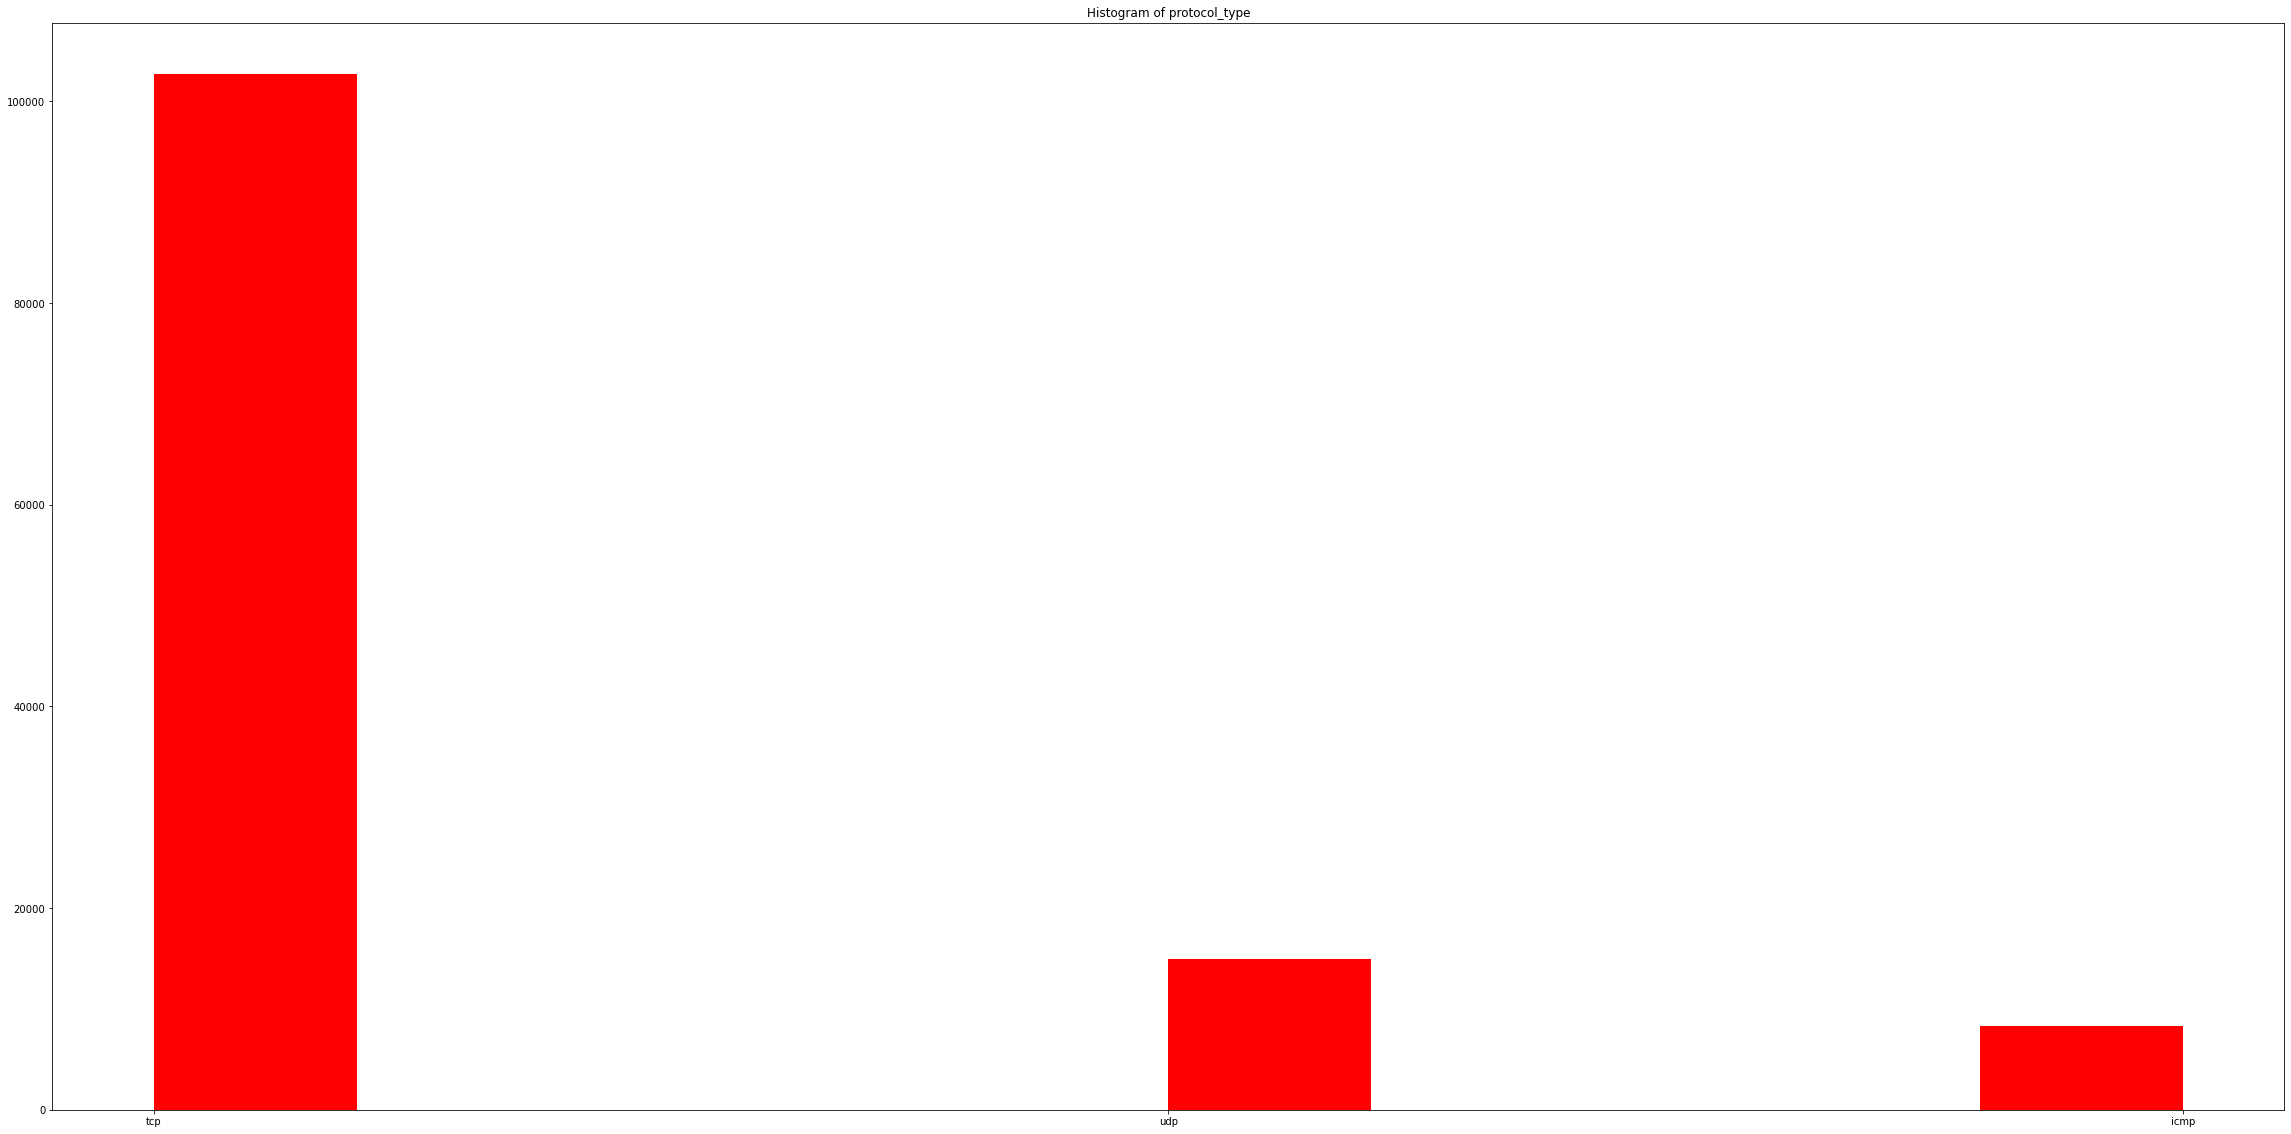

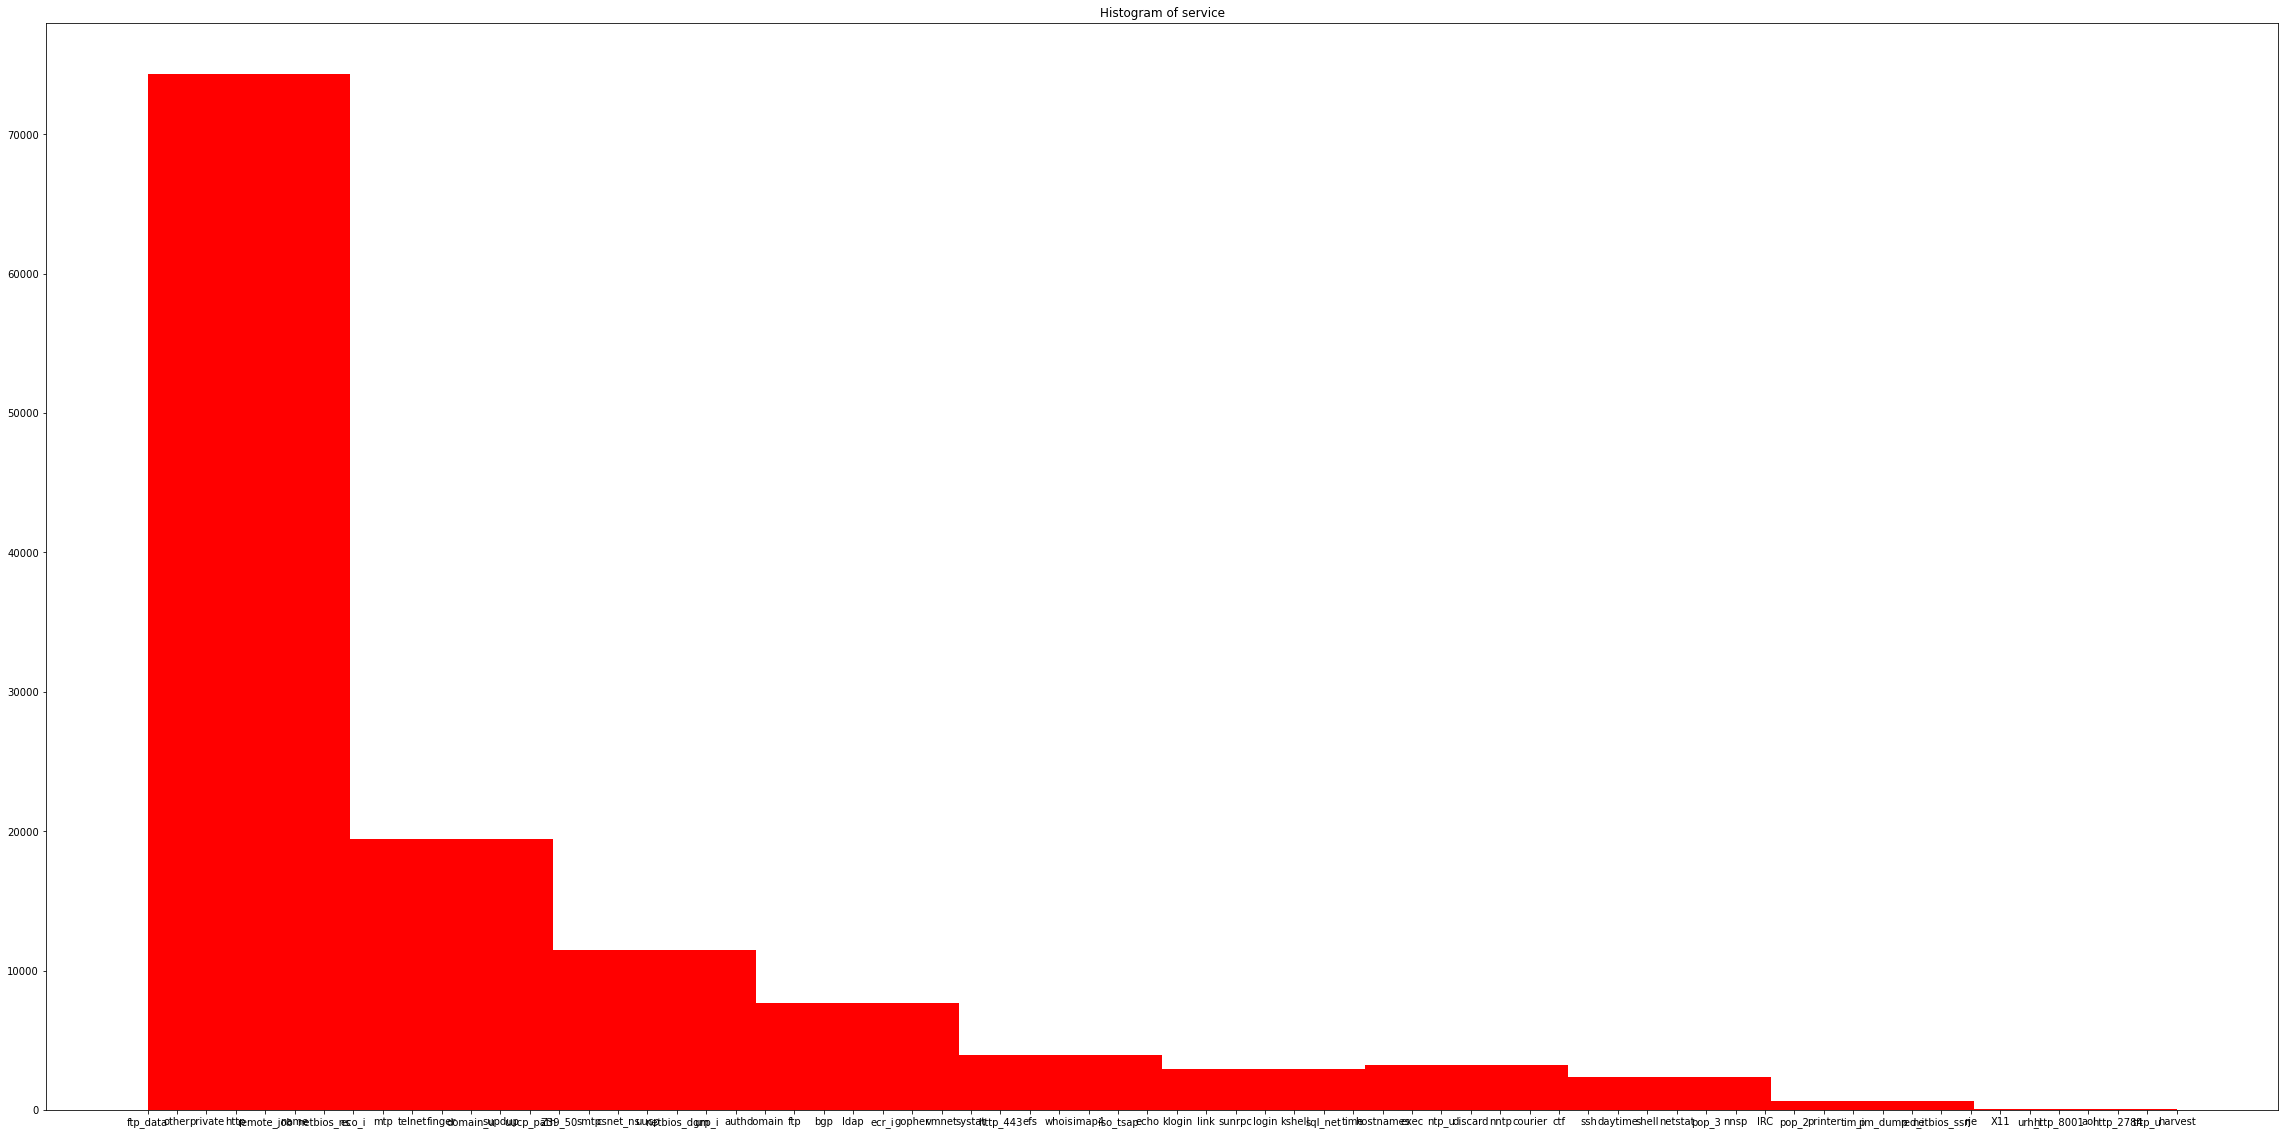

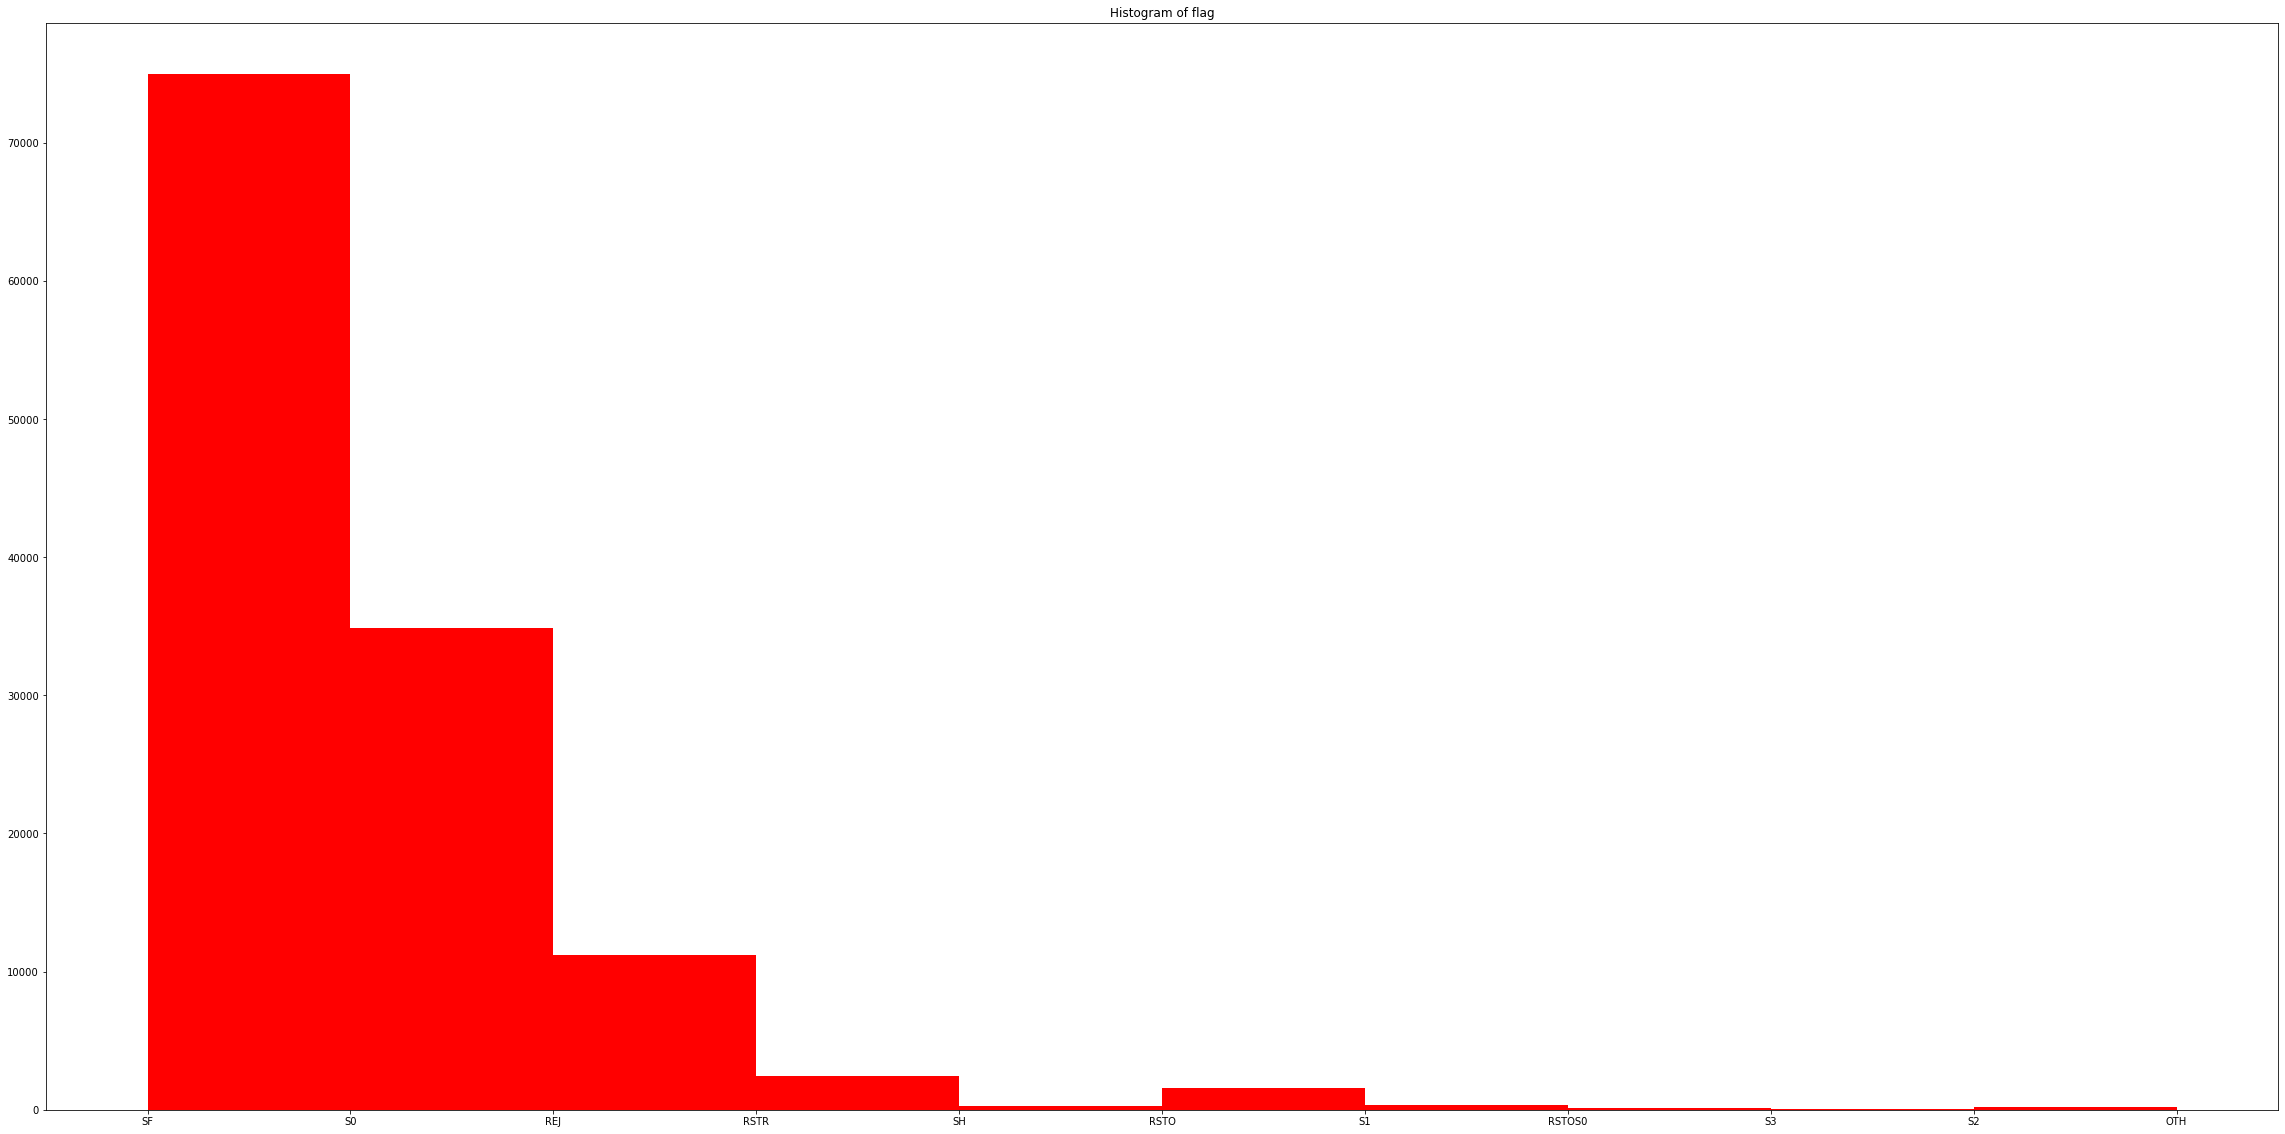

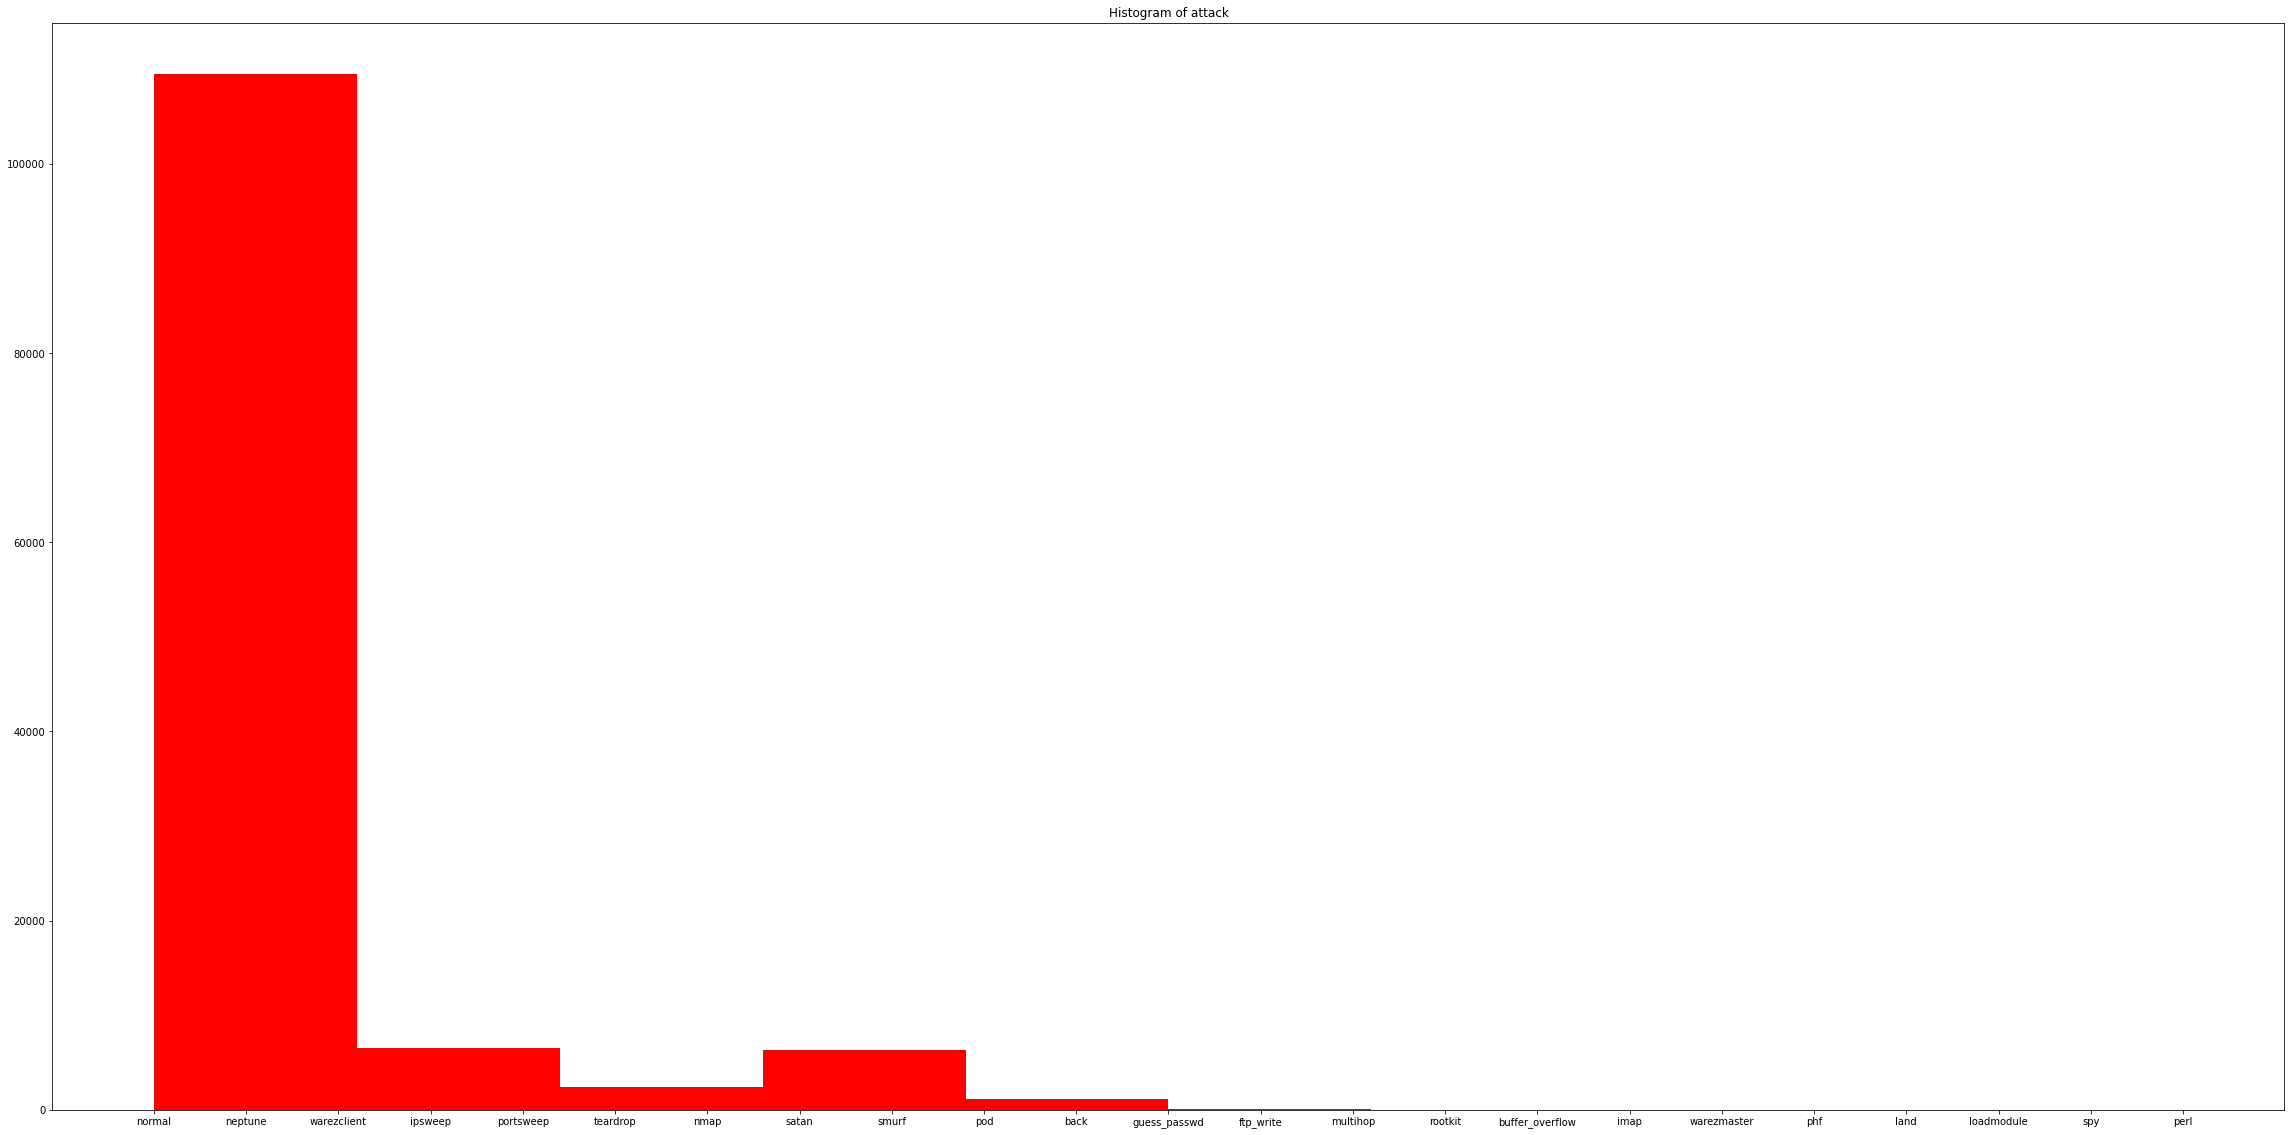

In [37]:
for col in train.select_dtypes('object').columns :
    plt.figure(figsize=(40,20))
    plt.hist(train[col],color='red')
    plt.title('Histogram of {}'.format(col))
    plt.show()

✅ As we can see the protocol_type has 3 categories with tcp with the highest proportion and icmp with the lowest one.

For the variables flag and service , it has a balanced proportions of features' values.



<h4 style="color:green;"> Correlation Matrix:</h4>

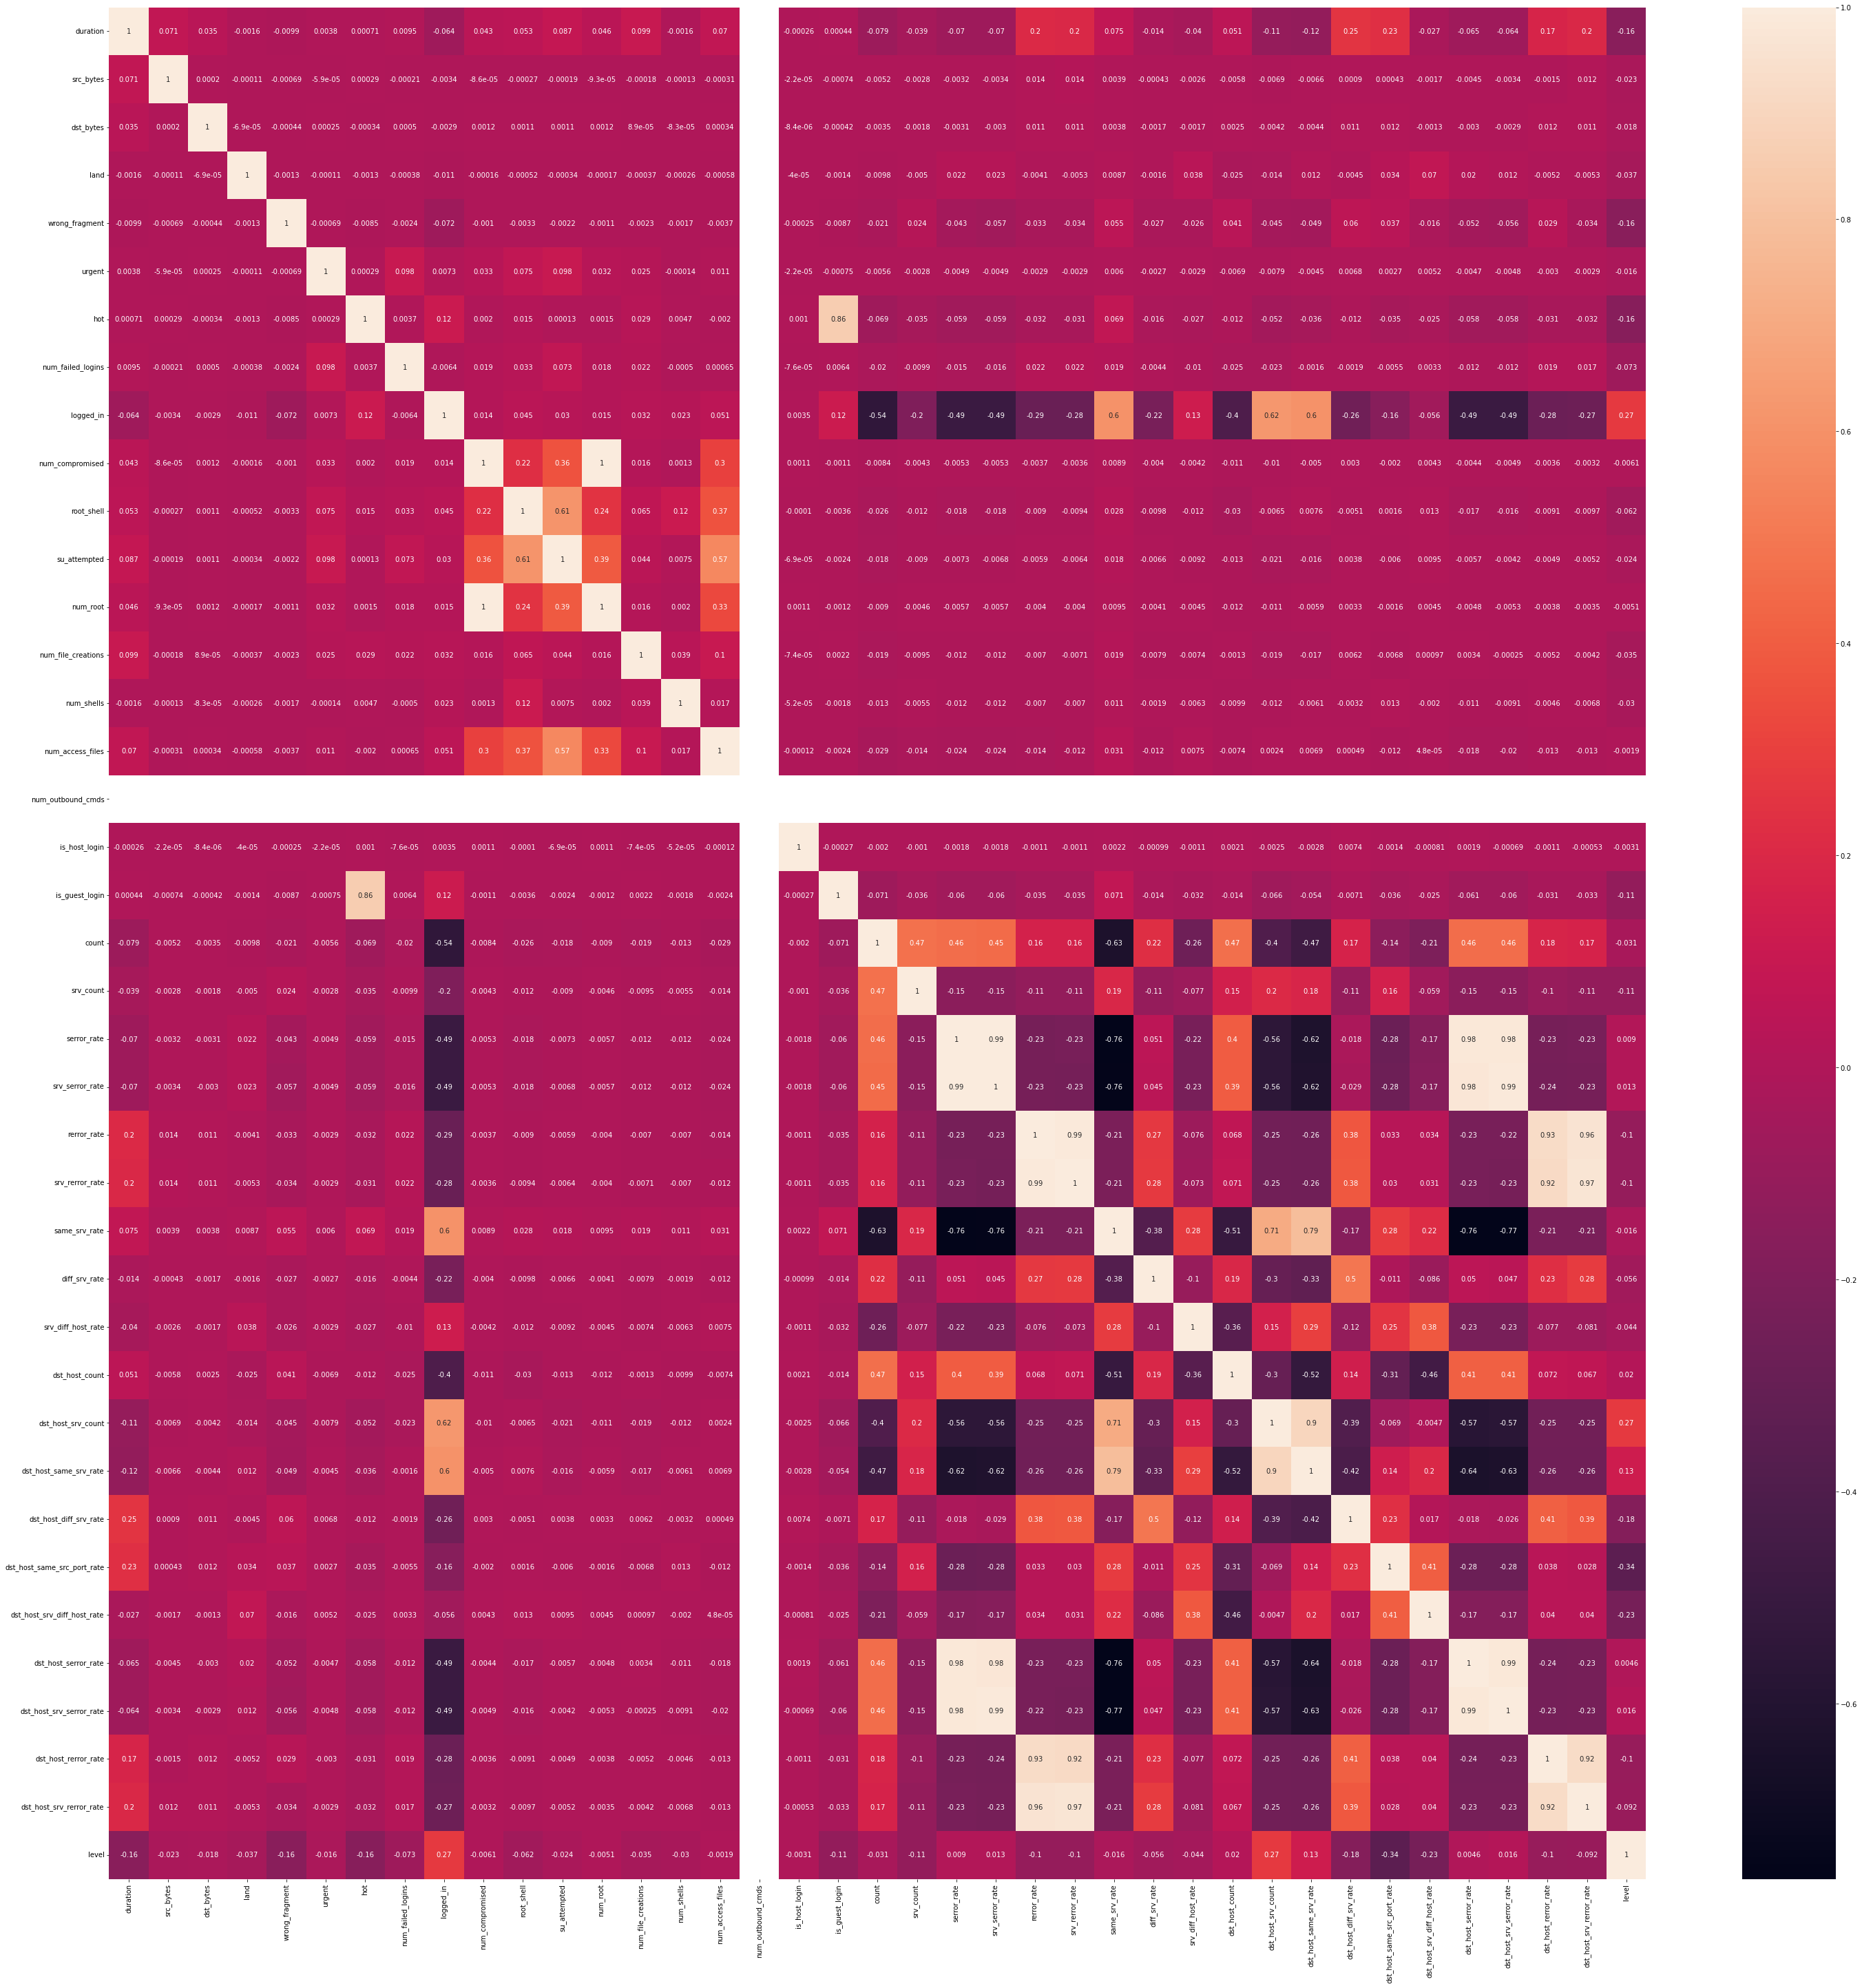

In [38]:
correlations = train.corr(method='pearson')
f, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(correlations, annot = True)
plt.show()

* <div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style='font-weight: bold; font-family: Cascadia code;'>
        <center> Understanding the Target Variable✅  </center>
    </h1>
</div>

In [39]:
unique_values = train['attack'].unique()

if len(unique_values) == 2:
    print("Binary Classification")
else:
    print("Multi-class Classification")


Multi-class Classification


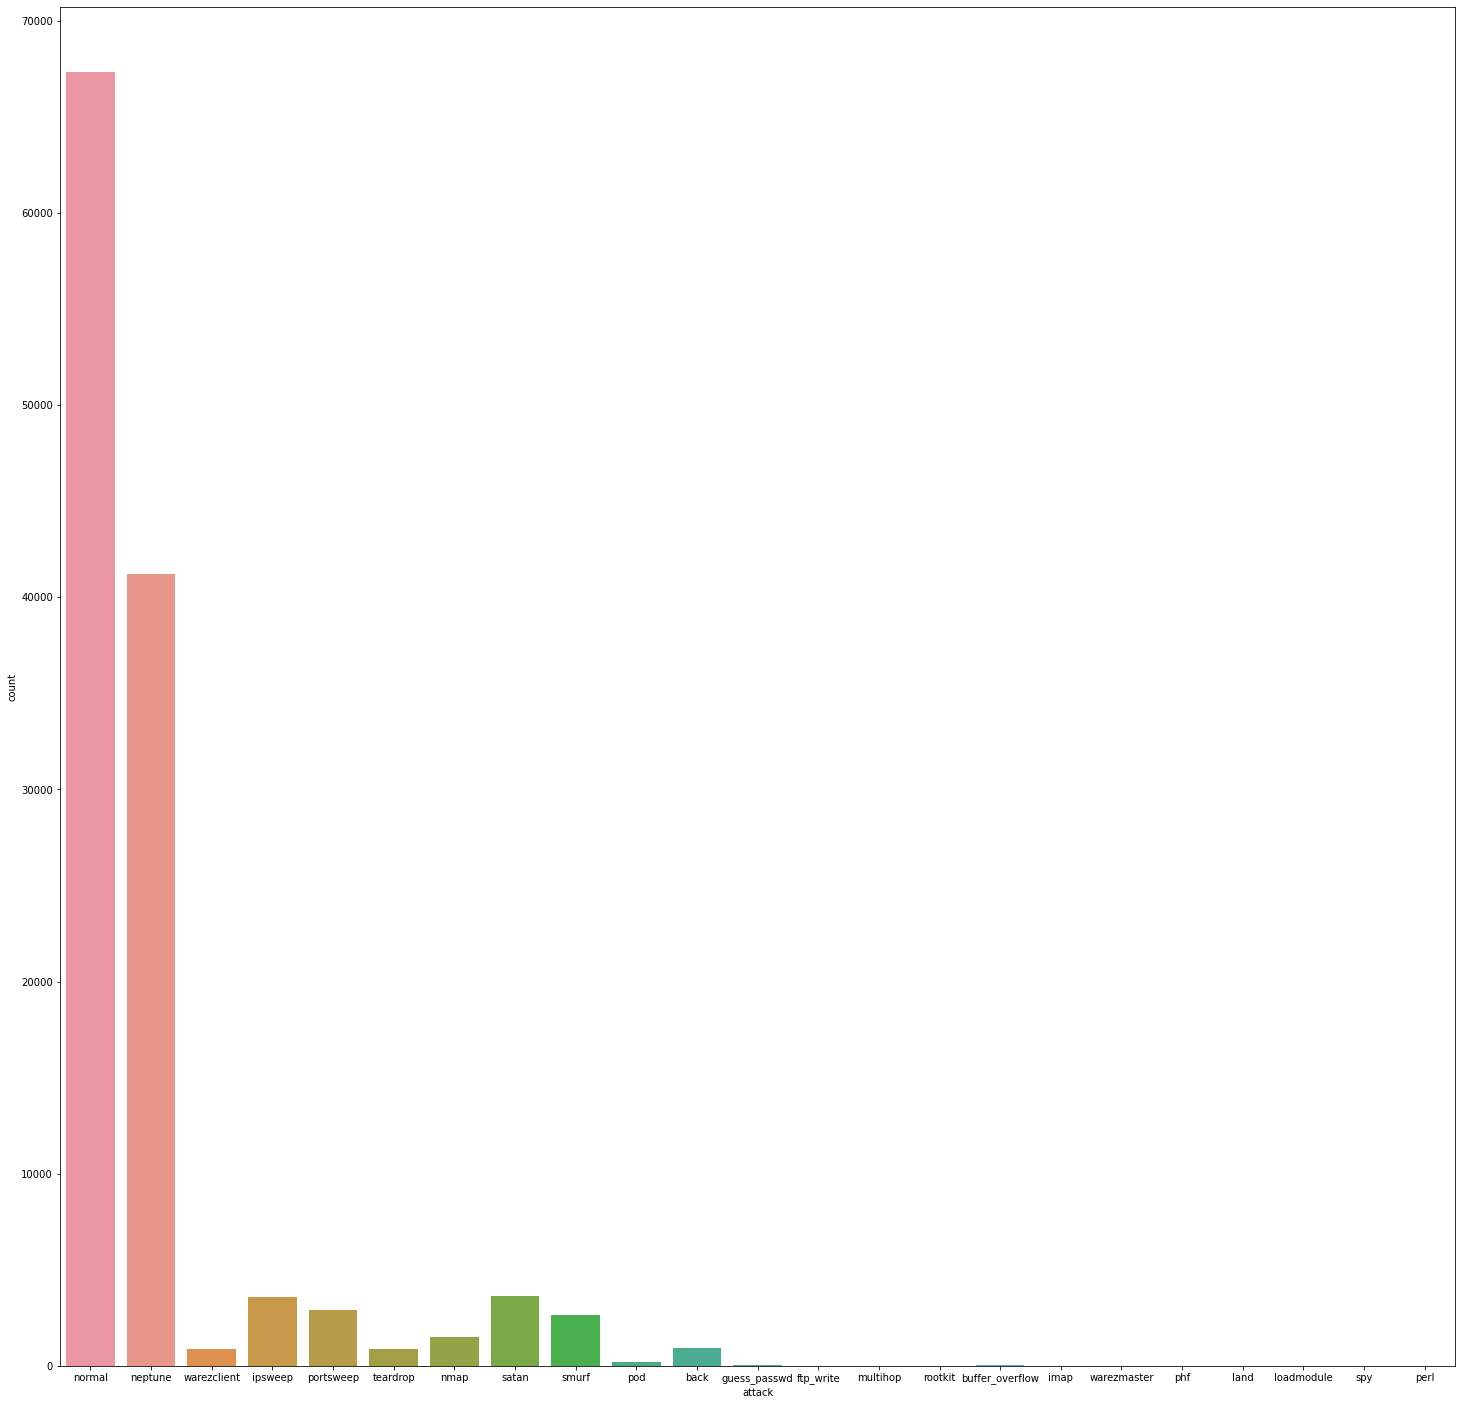

In [40]:
plt.figure(figsize=(25, 25))
sns.countplot(x='attack', data=train)
plt.show()


In [41]:
print('The number of classes in our target feature is:', train['attack'].nunique())

The number of classes in our target feature is: 23


In [42]:
for i in train['attack'].unique():
    percentage = (train['attack'].value_counts() / 125973) * 100
    print(f"The percentage of {i} equals to : {percentage[i]:.2f}%")

The percentage of normal equals to : 53.46%
The percentage of neptune equals to : 32.72%
The percentage of warezclient equals to : 0.71%
The percentage of ipsweep equals to : 2.86%
The percentage of portsweep equals to : 2.33%
The percentage of teardrop equals to : 0.71%
The percentage of nmap equals to : 1.19%
The percentage of satan equals to : 2.88%
The percentage of smurf equals to : 2.10%
The percentage of pod equals to : 0.16%
The percentage of back equals to : 0.76%
The percentage of guess_passwd equals to : 0.04%
The percentage of ftp_write equals to : 0.01%
The percentage of multihop equals to : 0.01%
The percentage of rootkit equals to : 0.01%
The percentage of buffer_overflow equals to : 0.02%
The percentage of imap equals to : 0.01%
The percentage of warezmaster equals to : 0.02%
The percentage of phf equals to : 0.00%
The percentage of land equals to : 0.01%
The percentage of loadmodule equals to : 0.01%
The percentage of spy equals to : 0.00%
The percentage of perl equals

We can mention that normal has the highest proportion then comes neptune and so on.

✅<b>"level" </b> can be droped cause it has no dependence with target

In [43]:
train.drop('level',axis=1,inplace=True)
test.drop('level',axis=1,inplace=True)

<b>✅There are 4 basic types of class :</b>
1. DoS(Denial of Service)- It is one of the most harmful attacks. These type of attacks restrict the user from using
certain services. The attacker tries to overload the system or keep the resources busy in the network and does not
allow the user to access services.

2. U2R- In this kind of attack, the attacker tries to gain access to the system as a root user. The attacker tries to gain
access to all data of the system and have full control on the server.

3. R2L- In this attack, the attacker tries to gain access to a system by sending some message to the server and gaining
access to system from a remote machine. The attacker makes some changes to the server to get access to resources.
One of the examples being guessing passwords.

4. Probe attacks- This attack aims to analysing the network, gather information. This attack is generally performed to
be able to attack through some other methods later.


<p><h1 style="color:red;font-weight:bolder;"> III/ Data Preparation</h1></p>

In [44]:
train.drop('num_outbound_cmds',axis=1,inplace=True)
test.drop('num_outbound_cmds',axis=1,inplace=True)

<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Handling Outliers 🛑🛑  </center>
    </h1>
</div>

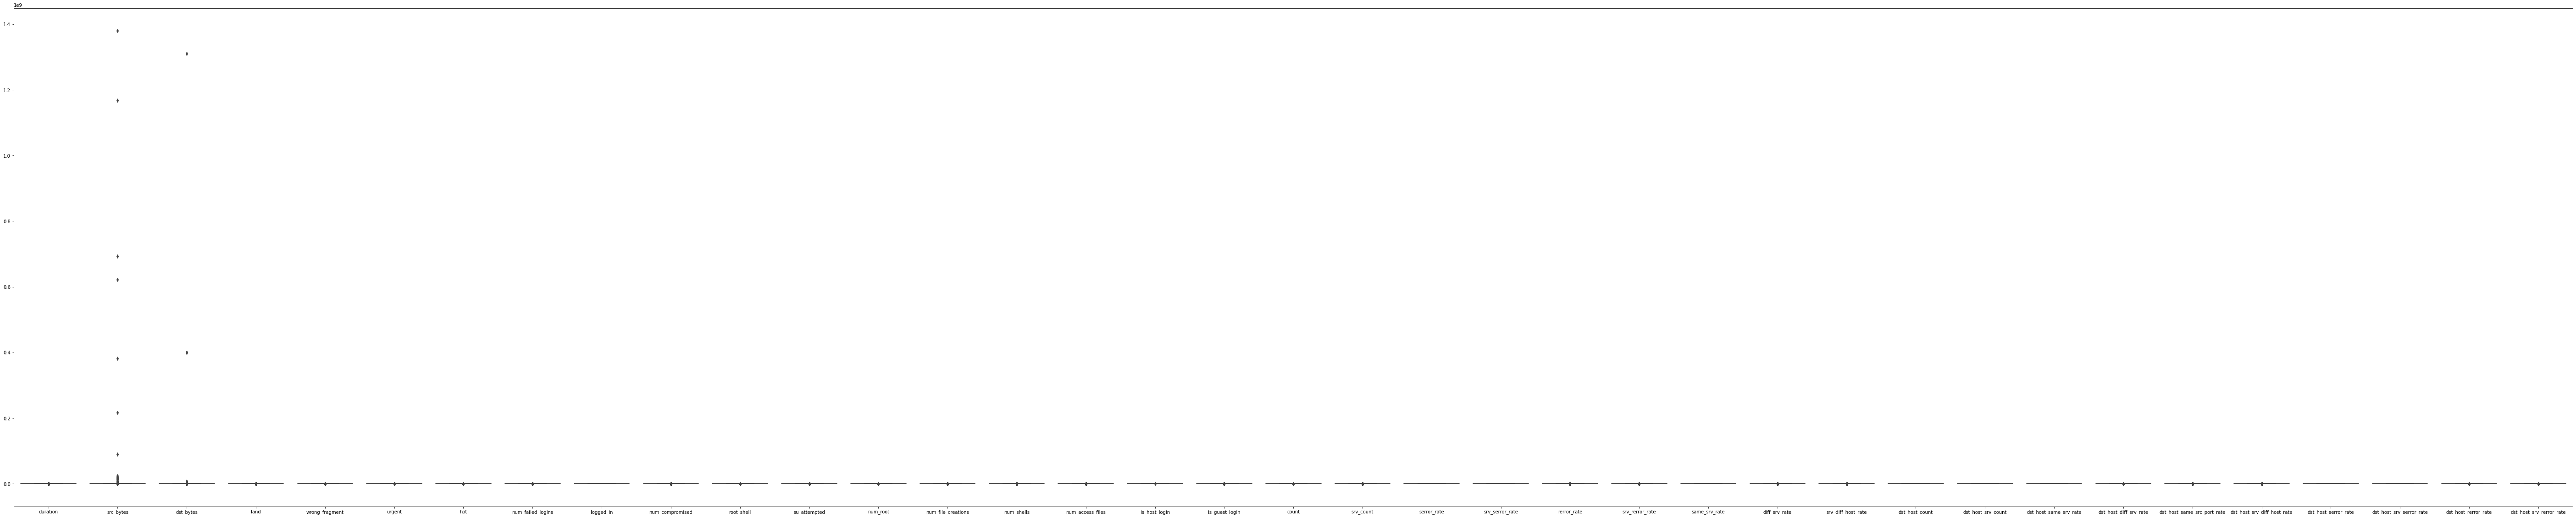

In [45]:
plt.figure(figsize=(100, 20))
sns.boxplot(data=train)
plt.show()

<b> ✅While our dataset contains outliers, we've chosen to retain them intentionally as they offer valuable insights or represent unique scenarios critical to understanding the complete spectrum of our data. Not to mention that the features are on the same scall so we don t need to scall it . </b>

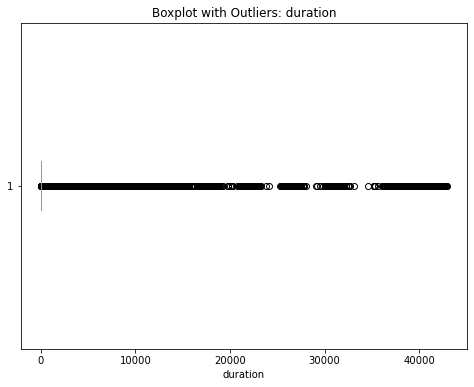

Outliers for duration: 23        5607
25         507
35           1
42           2
43        9052
          ... 
125866      28
125876       5
125944       1
125957       1
125969       8
Name: duration, Length: 10018, dtype: int64


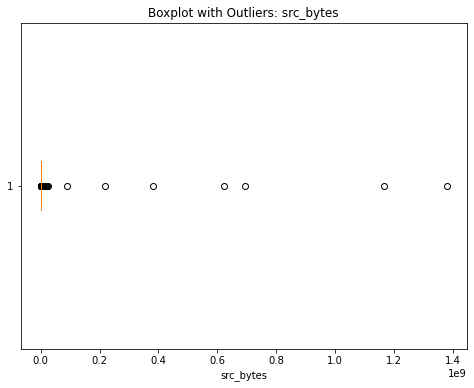

Outliers for src_bytes: 42        1591
65         696
95        3065
111       2089
127       1079
          ... 
125944    2049
125952    1289
125957    1247
125965    2233
125970    2231
Name: src_bytes, Length: 13840, dtype: int64


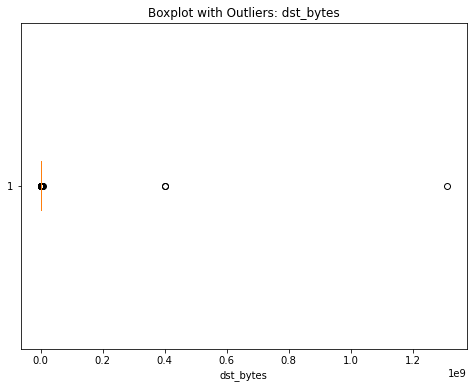

Outliers for dst_bytes: 3          8153
12         2251
16        13788
22        11905
25        14421
          ...  
125941    12471
125954    10939
125959     4777
125961     2698
125963     1600
Name: dst_bytes, Length: 23579, dtype: int64


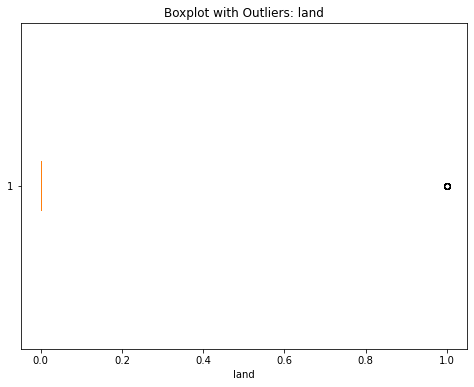

Outliers for land: 13210     1
16015     1
26748     1
37107     1
38774     1
47492     1
52662     1
59752     1
62554     1
63005     1
64190     1
66481     1
67588     1
72491     1
73452     1
82725     1
85275     1
89324     1
89411     1
101543    1
105684    1
112222    1
112310    1
113810    1
121116    1
Name: land, dtype: int64


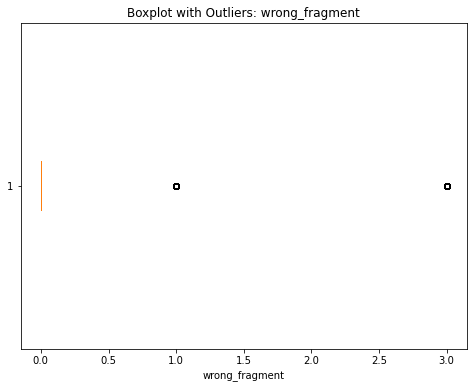

Outliers for wrong_fragment: 46        3
52        3
104       3
184       3
211       1
         ..
125323    3
125333    3
125435    3
125798    3
125950    3
Name: wrong_fragment, Length: 1090, dtype: int64


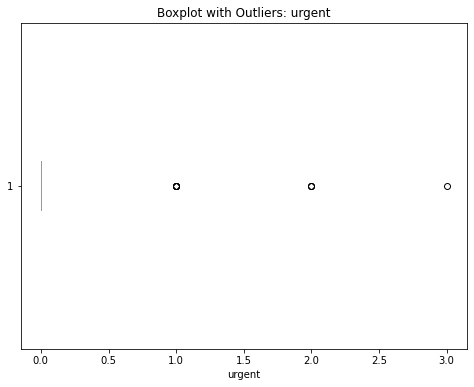

Outliers for urgent: 3173      1
32978     3
88122     2
89785     2
90778     1
101086    2
103959    1
111610    1
115868    1
Name: urgent, dtype: int64


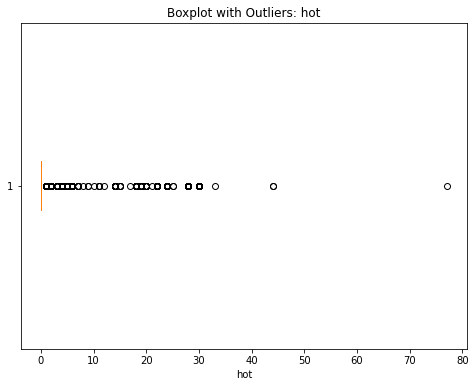

Outliers for hot: 129        5
190        6
303        4
366        2
405        1
          ..
125851    30
125866    18
125877     2
125910     2
125929     2
Name: hot, Length: 2671, dtype: int64


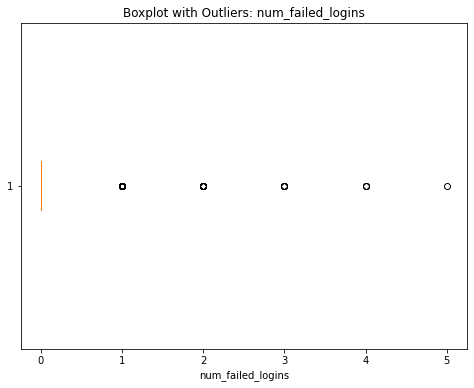

Outliers for num_failed_logins: 405       2
689       1
1792      1
1914      1
2798      1
         ..
122128    1
122977    1
124825    1
125065    1
125118    1
Name: num_failed_logins, Length: 122, dtype: int64


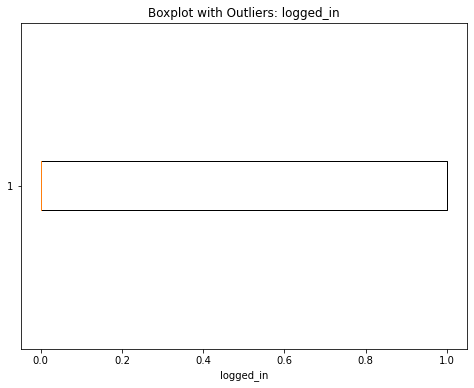

Outliers for logged_in: Series([], Name: logged_in, dtype: int64)


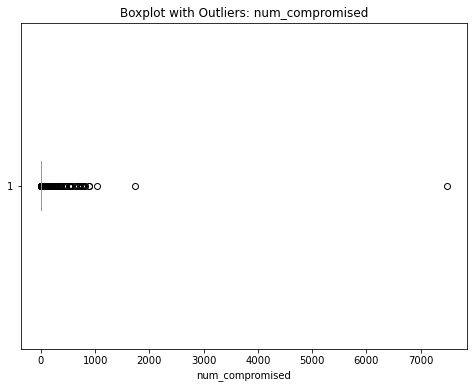

Outliers for num_compromised: 25          3
278         2
366         1
405        19
466         1
         ... 
125756    375
125807     11
125877      1
125910      1
125929      1
Name: num_compromised, Length: 1286, dtype: int64


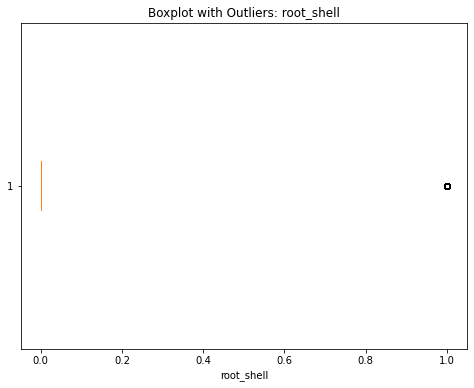

Outliers for root_shell: 1333      1
1463      1
2694      1
2993      1
3005      1
         ..
121483    1
122637    1
122920    1
123880    1
125756    1
Name: root_shell, Length: 169, dtype: int64


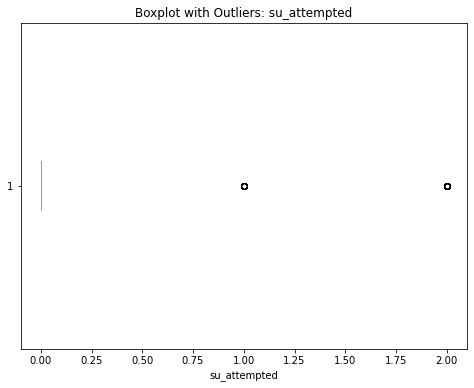

Outliers for su_attempted: 405       1
2407      1
4525      1
4677      2
4915      1
         ..
120354    2
120618    2
121262    2
123880    2
125756    2
Name: su_attempted, Length: 80, dtype: int64


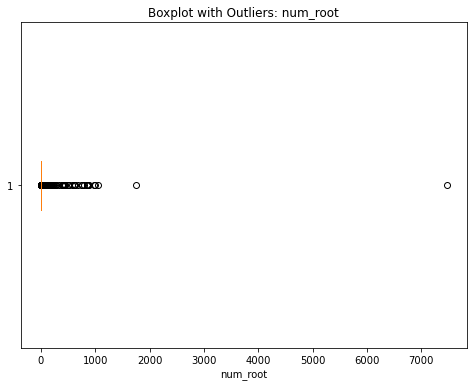

Outliers for num_root: 156         9
405        10
955         1
957         5
1226        9
         ... 
125357      1
125756    425
125768      6
125804      1
125943      5
Name: num_root, Length: 649, dtype: int64


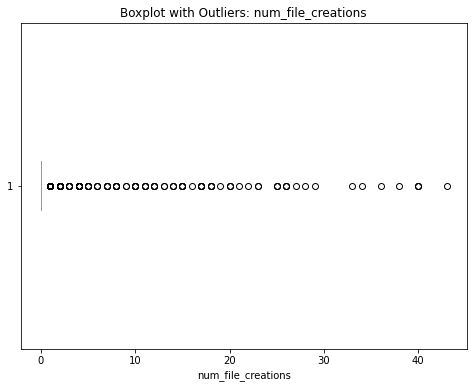

Outliers for num_file_creations: 127        1
405        8
2294       1
3005       4
3106       2
          ..
124137     1
124279     1
124327     2
124987    25
125369     1
Name: num_file_creations, Length: 287, dtype: int64


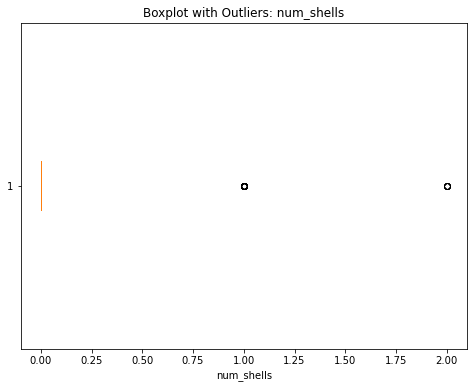

Outliers for num_shells: 3005      1
5097      1
5213      1
6784      1
7744      1
9648      1
16146     1
16476     1
17076     1
25995     1
26815     1
34654     1
43226     1
44610     1
48750     2
50731     1
54357     1
56375     1
61752     1
64331     1
65145     1
66007     1
66884     1
68279     1
69147     1
69195     1
69490     2
70027     1
77945     2
81498     1
81702     2
82345     2
86502     1
89514     1
95403     1
97385     1
98093     1
98445     1
98618     1
101585    1
104397    1
104451    1
107142    1
112579    1
114239    1
120362    1
124638    1
Name: num_shells, dtype: int64


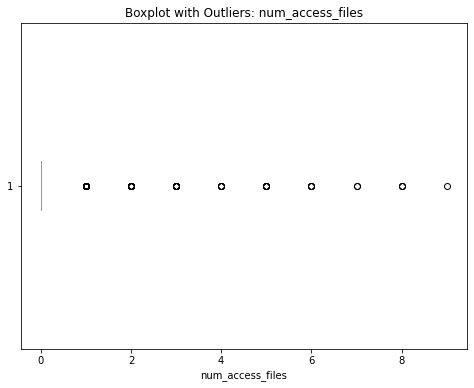

Outliers for num_access_files: 25        1
208       1
698       1
950       1
995       1
         ..
124862    1
125012    1
125756    1
125770    1
125961    1
Name: num_access_files, Length: 371, dtype: int64


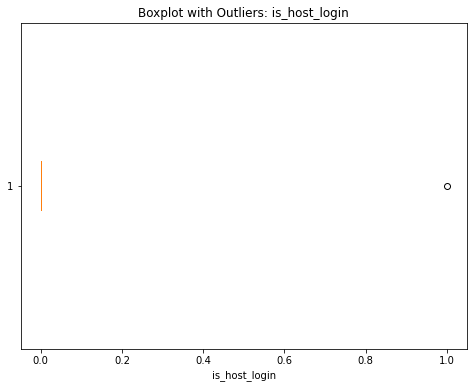

Outliers for is_host_login: 82775    1
Name: is_host_login, dtype: int64


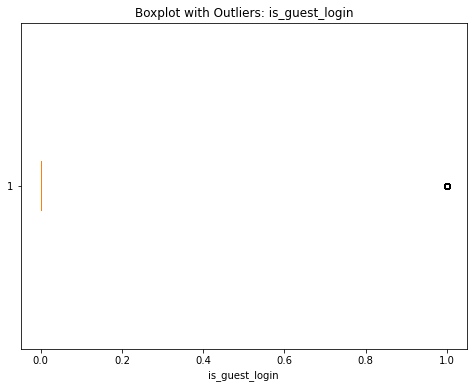

Outliers for is_guest_login: 129       1
190       1
506       1
525       1
581       1
         ..
125363    1
125441    1
125485    1
125851    1
125866    1
Name: is_guest_login, Length: 1187, dtype: int64


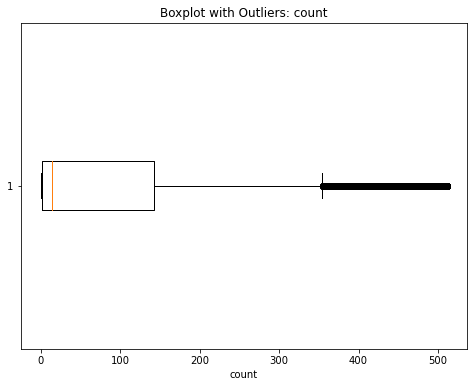

Outliers for count: 172       511
177       486
198       406
354       425
426       486
         ... 
125687    509
125695    509
125707    509
125780    511
125927    511
Name: count, Length: 3157, dtype: int64


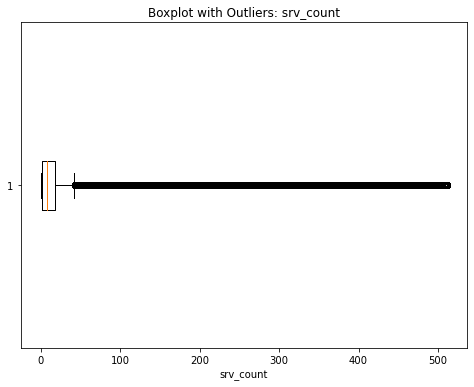

Outliers for srv_count: 34        181
36        202
46         80
47         44
54        120
         ... 
125886    157
125895    141
125921    335
125927    511
125936     46
Name: srv_count, Length: 12054, dtype: int64


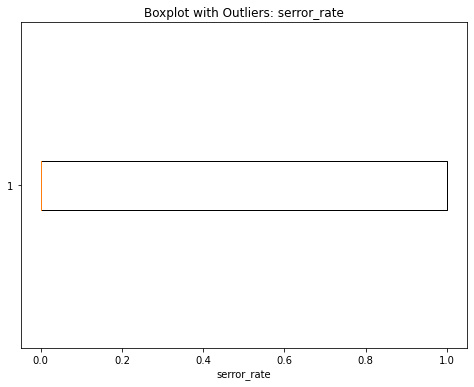

Outliers for serror_rate: Series([], Name: serror_rate, dtype: float64)


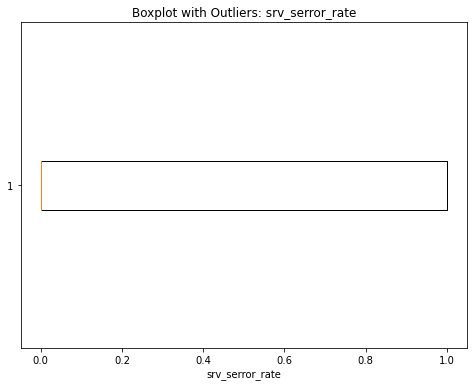

Outliers for srv_serror_rate: Series([], Name: srv_serror_rate, dtype: float64)


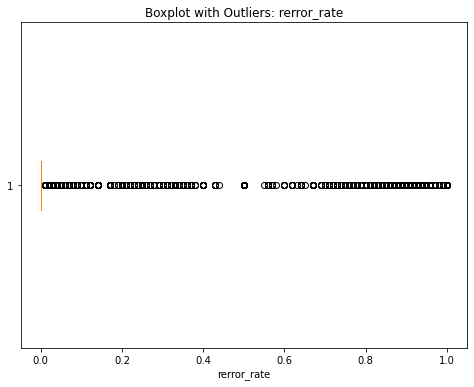

Outliers for rerror_rate: 5         1.00
10        1.00
29        0.03
33        1.00
51        1.00
          ... 
125917    0.03
125918    1.00
125932    1.00
125949    1.00
125955    1.00
Name: rerror_rate, Length: 16190, dtype: float64


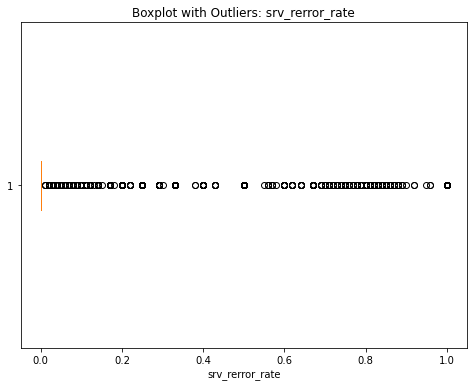

Outliers for srv_rerror_rate: 5         1.00
10        1.00
29        0.03
33        1.00
51        1.00
          ... 
125918    1.00
125932    1.00
125933    0.12
125949    1.00
125955    1.00
Name: srv_rerror_rate, Length: 16206, dtype: float64


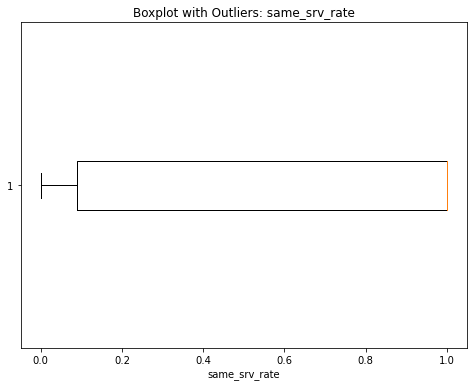

Outliers for same_srv_rate: Series([], Name: same_srv_rate, dtype: float64)


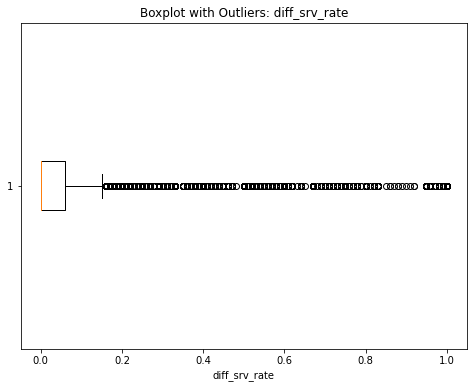

Outliers for diff_srv_rate: 33        1.00
43        0.50
62        1.00
72        0.67
89        0.67
          ... 
125821    0.40
125828    0.23
125887    1.00
125902    0.17
125956    0.67
Name: diff_srv_rate, Length: 7788, dtype: float64


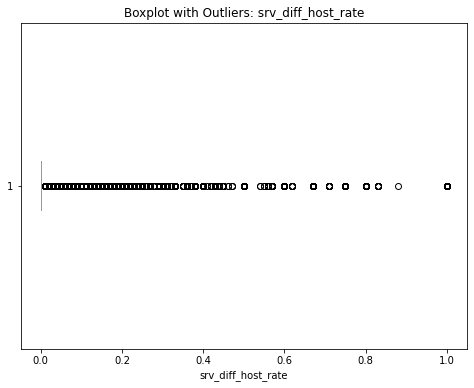

Outliers for srv_diff_host_rate: 4         0.09
12        0.43
16        0.22
19        0.20
22        0.20
          ... 
125949    1.00
125954    0.15
125955    1.00
125962    1.00
125967    0.18
Name: srv_diff_host_rate, Length: 28399, dtype: float64


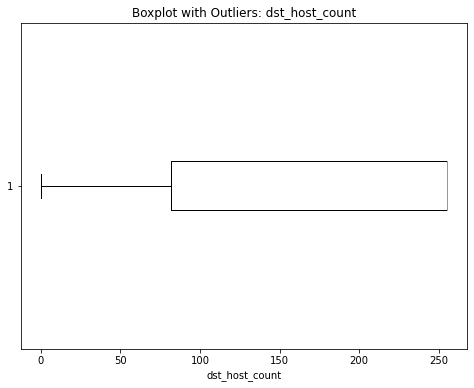

Outliers for dst_host_count: Series([], Name: dst_host_count, dtype: int64)


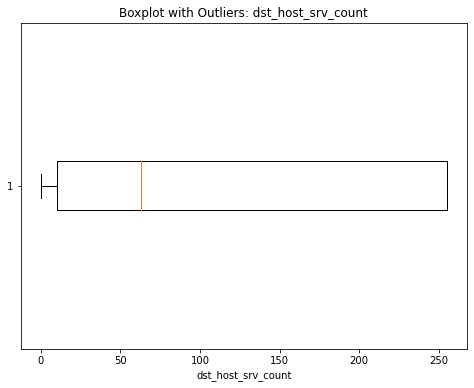

Outliers for dst_host_srv_count: Series([], Name: dst_host_srv_count, dtype: int64)


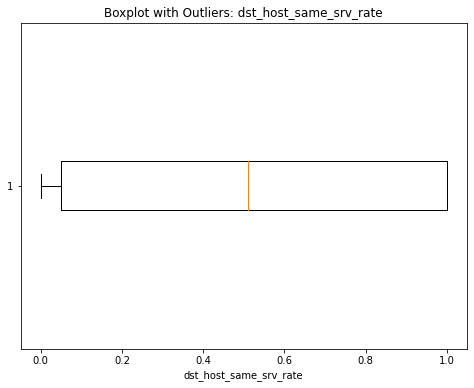

Outliers for dst_host_same_srv_rate: Series([], Name: dst_host_same_srv_rate, dtype: float64)


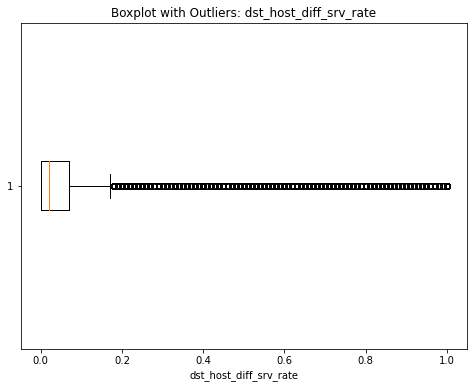

Outliers for dst_host_diff_srv_rate: 1         0.60
23        0.85
33        0.31
43        0.66
62        0.84
          ... 
125843    1.00
125851    0.43
125878    0.47
125931    0.82
125943    0.33
Name: dst_host_diff_srv_rate, Length: 10550, dtype: float64


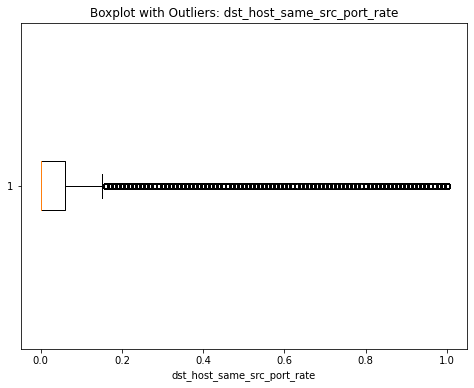

Outliers for dst_host_same_src_port_rate: 0         0.17
1         0.88
13        1.00
17        1.00
23        1.00
          ... 
125947    1.00
125955    1.00
125965    1.00
125967    0.33
125972    0.30
Name: dst_host_same_src_port_rate, Length: 25052, dtype: float64


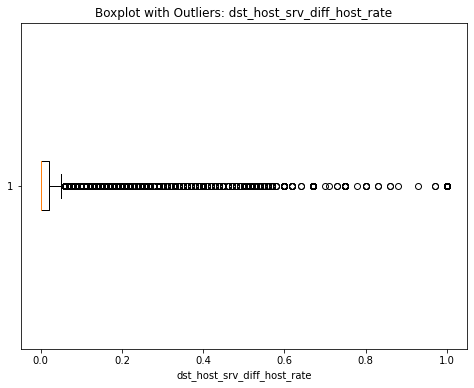

Outliers for dst_host_srv_diff_host_rate: 13        0.20
17        1.00
27        0.14
30        0.51
48        0.18
          ... 
125912    0.51
125932    0.23
125947    0.25
125955    0.06
125965    1.00
Name: dst_host_srv_diff_host_rate, Length: 11682, dtype: float64


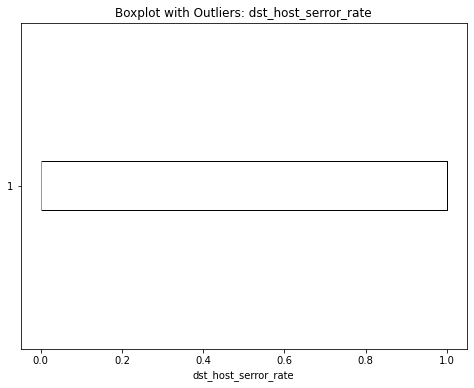

Outliers for dst_host_serror_rate: Series([], Name: dst_host_serror_rate, dtype: float64)


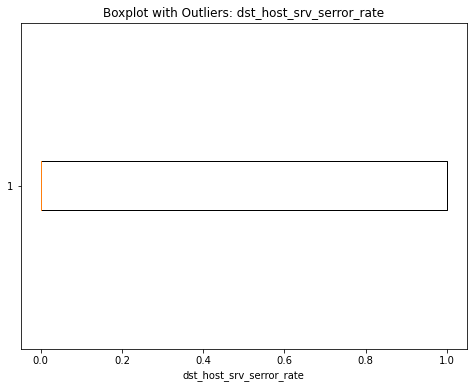

Outliers for dst_host_srv_serror_rate: Series([], Name: dst_host_srv_serror_rate, dtype: float64)


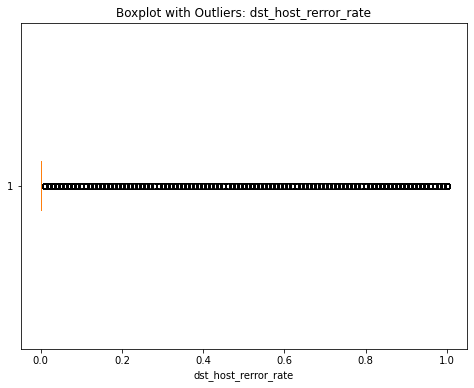

Outliers for dst_host_rerror_rate: 0         0.05
5         1.00
10        1.00
18        0.02
25        0.02
          ... 
125931    0.76
125932    1.00
125952    0.02
125955    1.00
125970    0.01
Name: dst_host_rerror_rate, Length: 22795, dtype: float64


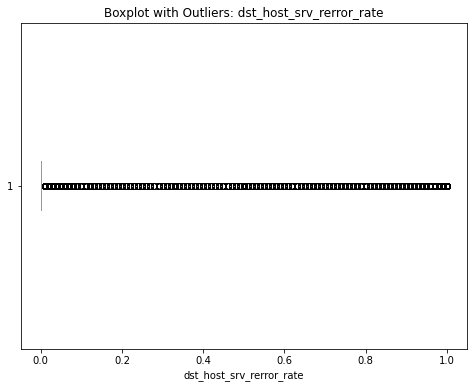

Outliers for dst_host_srv_rerror_rate: 3         0.01
5         1.00
10        1.00
25        0.16
27        0.57
          ... 
125918    0.84
125929    0.05
125931    0.02
125932    0.93
125955    1.00
Name: dst_host_srv_rerror_rate, Length: 19357, dtype: float64


In [46]:
# Choose the variables for outlier detection
variables = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

# Iterate over the variables
for variable in variables:
    # Select the data for the current variable
    data = train[variable]

    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, vert=False)
    plt.xlabel(variable)
    plt.title('Boxplot with Outliers: ' + variable)
    plt.show()

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print('Outliers for', variable + ':', outliers)

✅ Some features have outliers others don't such as logged_in.

<b>Note : </b>
In the <b>Data Preparation</b> phase , we're going to apply the same methods and procedures to the <b>Test</b> set that we're going to apply to the <b>Train</b> set because the <b>Test</b> set isn't treated in any way initially

<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style=' font-weight: bold; font-family: Cascadia code;'>
        <center> Handling Missing Values 🔦 </center>
    </h1>
</div>

In [47]:
print(('We have {} missing values in out Train set\nWe have {} missing values in the Test set').format(train.isna().sum().sum(),test.isna().sum().sum()))

We have 0 missing values in out Train set
We have 0 missing values in the Test set


In [48]:
print(test.duplicated().sum())
print(train.duplicated().sum())

0
0


<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style=' font-weight: bold; font-family: Cascadia code;'>
        <center> Mapping </center>
    </h1>
</div>

In [49]:
values_to_replace = {
    'neptune': 'DoS',
    'back': 'DoS',
    'land': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    'worm': 'DoS',
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'httptunnel': 'R2L',
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe'
}

train['attack'].replace(values_to_replace, inplace=True)

In [50]:
values_to_replace = {
    'neptune': 'DoS',
    'back': 'DoS',
    'land': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    'worm': 'DoS',
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'httptunnel': 'R2L',
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe'
}

test['attack'].replace(values_to_replace, inplace=True)

From the code above we've replaced the values that can take each attack type with the pricipal attack types (DoS,Probe,R2L,U2R) in both train set and test set.  

In [51]:
def value_counts(train, feature):

    total = pd.DataFrame(train.loc[:,feature].value_counts(dropna=False))


    total.columns = ["Total"]

    return pd.concat([total], axis = 1)

value_counts(train,'attack')

,Total
normal,67343
DoS,45927
Probe,11656
R2L,995
U2R,52


In [52]:
value_counts(test,'attack')

,Total
normal,9711
DoS,7460
R2L,2885
Probe,2421
U2R,67


<AxesSubplot:>

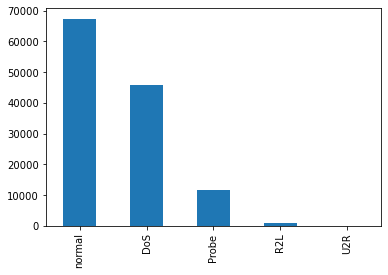

In [53]:
train['attack'].value_counts().plot(kind="bar")

✅ Normal attacks has the highest rate 53.45 % of the total number of atttacks then comes Dos with 36.45% of total and lastly U2R with lowest rate 0.05 %

<AxesSubplot:>

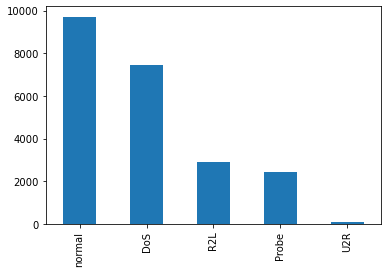

In [54]:
test['attack'].value_counts().plot(kind="bar")

In [55]:
train.duplicated().sum()

9

The duplication here is resulted from renaming the values of each attack by the class : Dos, probe ... for exemple we replaced 2 rows having respectively back and neptune with Dos so we're not gonna drop the duplicates

# Distribution of categorical features

<h3>Train Set</h3>

In [56]:
print('Training set:')
categorical_columns = train.select_dtypes(include=['object']).columns
for col_name in categorical_columns:
    unique_categories = train[col_name].nunique()
    print(f"Feature '{col_name}' has {unique_categories} categories")

# See the distribution of categories in the 'service' feature
print('\nDistribution of categories in service:')
print(train['service'].value_counts().head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 5 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


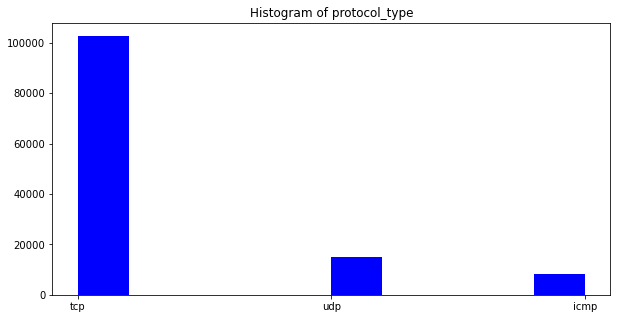

In [57]:
plt.figure(figsize=(10, 5))
plt.hist(train['protocol_type'], color='blue')
plt.title('Histogram of protocol_type')
plt.show()

✅ As we can see the protocol_type has 3 categories with tcp with the highest rate and icmp with the lowest

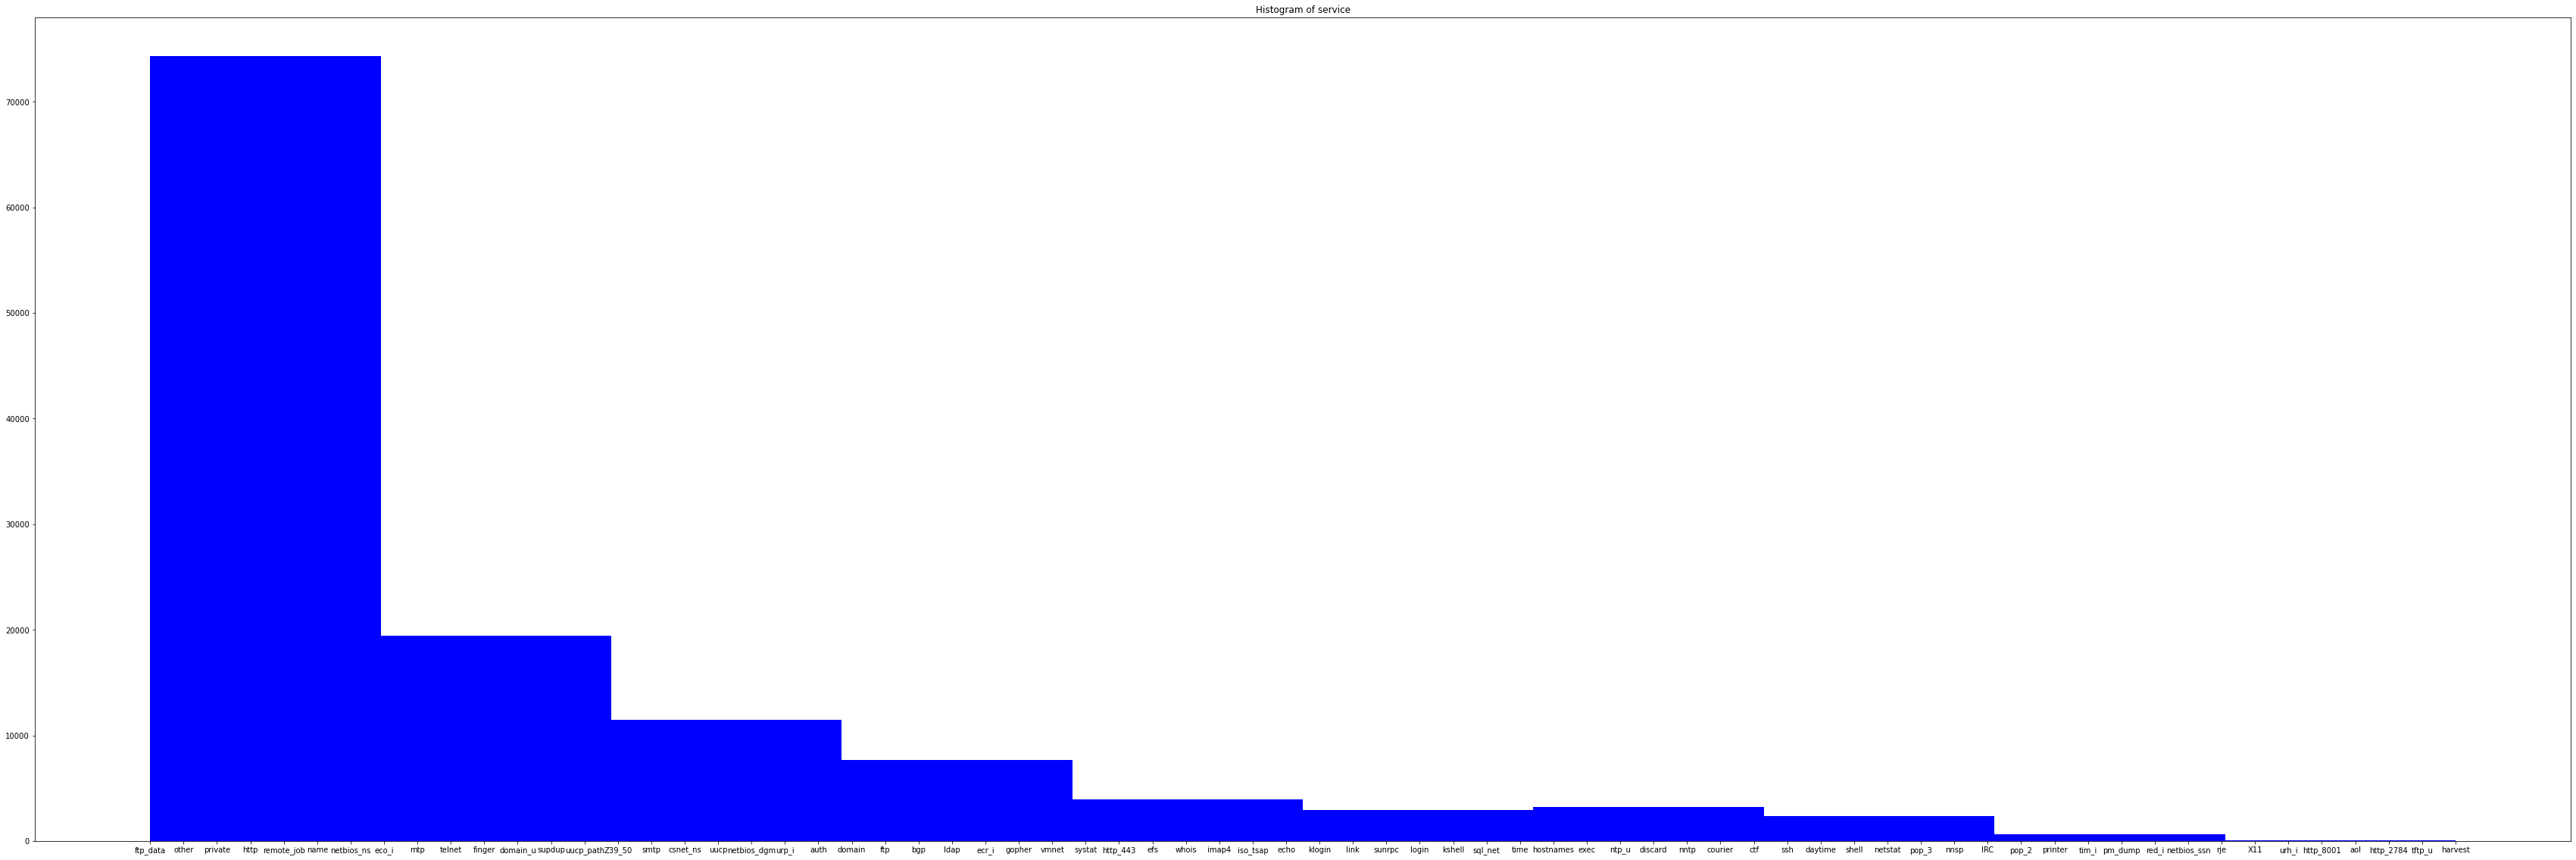

In [58]:
plt.figure(figsize=(60, 20))
plt.hist(train['service'], color='blue')
plt.title('Histogram of service')
plt.show()

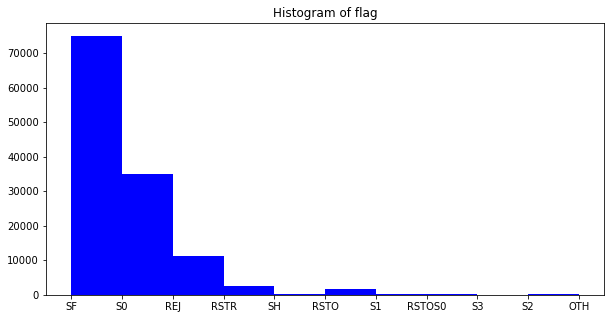

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(train['flag'], color='blue')
plt.title('Histogram of flag')
plt.show()

We can notice a balanced proportions of values for the features flag and service.

<h3>Test Set</h3>

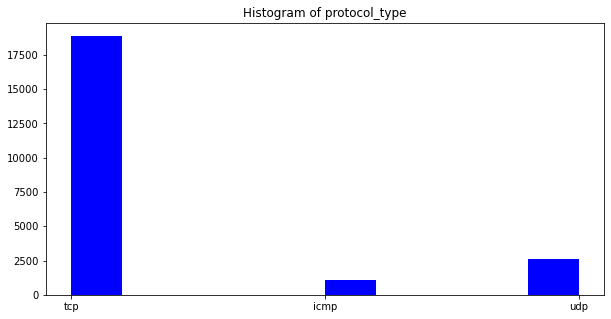

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(test['protocol_type'], color='blue')
plt.title('Histogram of protocol_type')
plt.show()

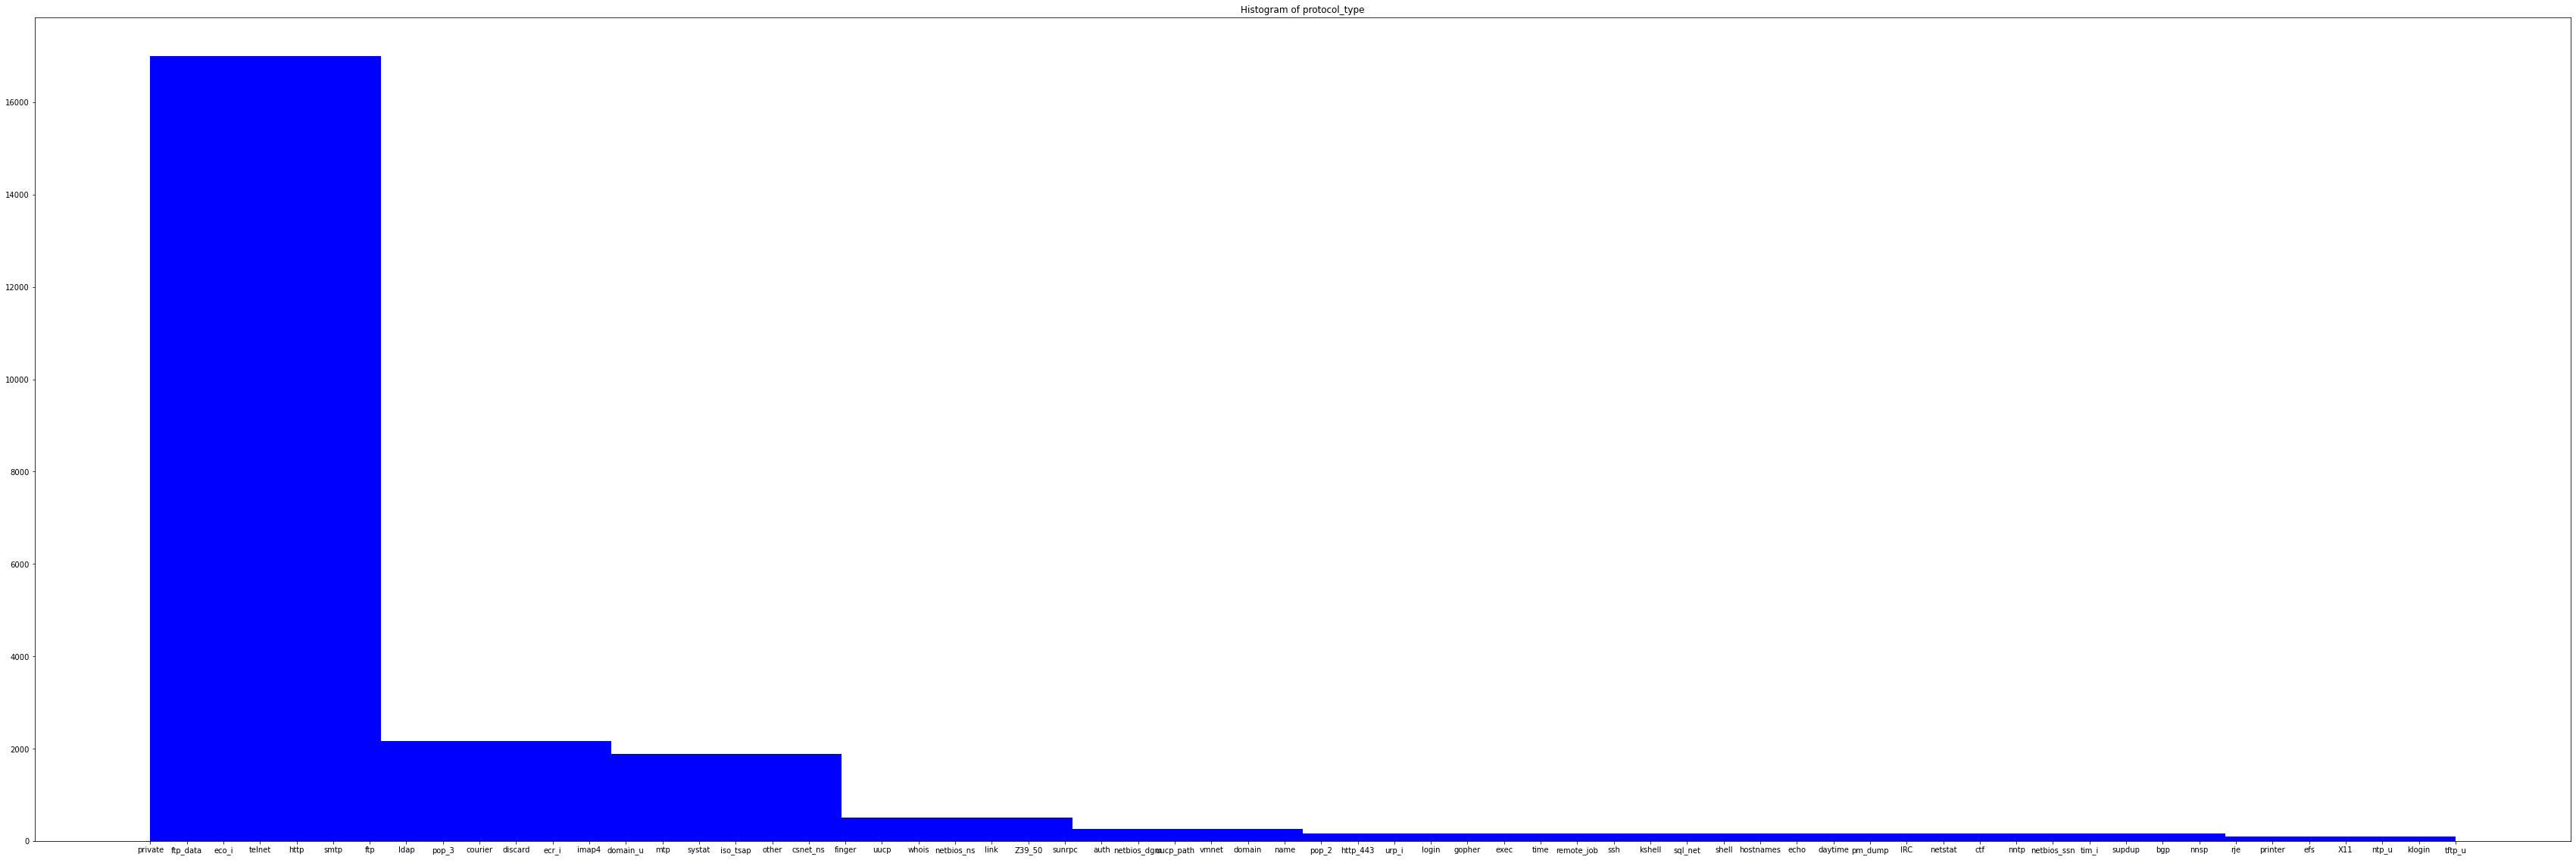

In [61]:
plt.figure(figsize=(60, 20))
plt.hist(test['service'], color='blue')
plt.title('Histogram of protocol_type')
plt.show()

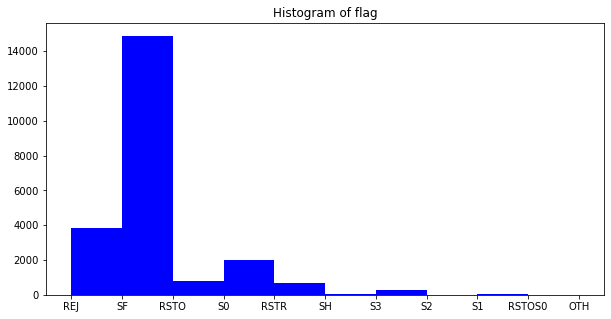

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(test['flag'], color='blue')
plt.title('Histogram of flag')
plt.show()

In [63]:
print("Valeurs de 'service' dans l'ensemble d'entraînement :")
print(train['service'].value_counts())

print()

# Afficher les valeurs de la colonne 'service' dans l'ensemble de test
print("Valeurs de 'service' dans l'ensemble de test :")
print(test['service'].value_counts())

print()

# Afficher les variables manquantes dans l'ensemble de test
missing_variables = set(train['service'].unique()) - set(test['service'].unique())
print("Variables manquantes dans l'ensemble de test :")
print(missing_variables)

Valeurs de 'service' dans l'ensemble d'entraînement :
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

Valeurs de 'service' dans l'ensemble de test :
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

Variables manquantes dans l'ensemble de test :
{'harvest', 'urh_i', 'http_2784', 'http_8001', 'aol', 'red_i'}



Upon comparison, it is evident that the Test set contains fewer categories (6) compared to the Training set. To address this disparity, it is essential to augment the Test set by introducing empty columns. The addition of these empty columns ensures uniformity between the test and training sets, enabling the models to make predictions consistently across both datasets.

<div style='font-size:100%;'>
    <a id='dn'></a>
    <h1 style=' font-weight: bold; font-family: Cascadia code;'>
        <center> Data Encoding  🔦 </center>
    </h1>
</div>

For the categorical features we are going to make new derived features for each feature value. Then apply one hot encoding on them .

In [64]:

categorical_columns=['protocol_type', 'service', 'flag']
train_categorical_values = train[categorical_columns]
test_categorical_values = test[categorical_columns]


In [65]:
train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [66]:
test_categorical_values.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


# Make column names for dummies (Add title for new features created by OneHotEncoder)

In [67]:

# protocol type
unique_protocol=sorted(train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [68]:
train_categorical_values_enc=train_categorical_values.apply(LabelEncoder().fit_transform)
print(train_categorical_values_enc.head())
# test set
test_categorical_values_enc=test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [69]:
enc = OneHotEncoder()
train_categorical_values_encenc = enc.fit_transform(train_categorical_values_enc)
train_cat_data = pd.DataFrame(train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
test_categorical_values_encenc = enc.fit_transform(test_categorical_values_enc)
test_cat_data = pd.DataFrame(test_categorical_values_encenc.toarray(),columns=testdumcols)

train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The number of features increased . We have now 84 features in the train dataset.

In [70]:
test_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see the test dataset has 78 features whereas train dataset has 84 so we need to add 6 features to the test dataset in order to balance the Service column.

In [71]:
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_urh_i',
 'service_http_2784',
 'service_http_8001',
 'service_aol',
 'service_red_i']

The six missing features are service new derived features.

In [72]:
for col in difference:
    test_cat_data[col] = 0


print(train.shape)
print(test.shape)

(125973, 41)
(22544, 41)


In [73]:
newtrain=train.join(train_cat_data)
newtrain.drop('flag', axis=1, inplace=True)
newtrain.drop('protocol_type', axis=1, inplace=True)
newtrain.drop('service', axis=1, inplace=True)
# test data
newtest=test.join(test_cat_data)
newtest.drop('flag', axis=1, inplace=True)
newtest.drop('protocol_type', axis=1, inplace=True)
newtest.drop('service', axis=1, inplace=True)
print(newtrain.shape)
print(newtest.shape)

(125973, 122)
(22544, 122)


✅ Now the test and train datasets are balanced.

In [74]:
value_counts(newtrain,'attack')

,Total
normal,67343
DoS,45927
Probe,11656
R2L,995
U2R,52


**We are going to assign 0 to normal , 1 to DoS attacks , 2 to R2L attacks, 3 to U2R and 4 to Probe.**

In [75]:
Target_train=newtrain['attack']

Target_test=newtest['attack']


# change the label column
Target_train_df=Target_train.replace({ 'normal' : 0, 'DoS' : 1 ,'R2L': 2, 'U2R': 3, 'Probe': 4})
Target_test_df=Target_test.replace({ 'normal' : 0, 'DoS' : 1 ,'R2L': 2, 'U2R': 3, 'Probe': 4})
# put the new label column back
newtrain['attack'] = Target_train_df
newtest['attack'] = Target_test_df
print(newtrain['attack'].head())

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64


In [76]:
value_counts(newtrain,'attack')

,Total
0,67343
1,45927
4,11656
2,995
3,52


In [77]:
value_counts(newtest,'attack')

,Total
0,9711
1,7460
2,2885
4,2421
3,67


In both train and test datasets Normal has the highest proportion , then comes Dos then R2L and lastly U2R with the lowest proportion.

In [78]:
print(newtrain.shape)
print(newtest.shape)

(125973, 122)
(22544, 122)


<AxesSubplot:>

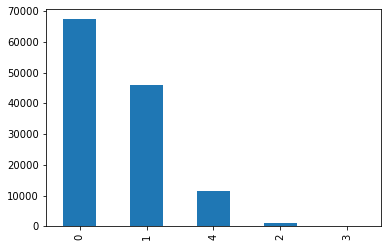

In [79]:
newtrain['attack'].value_counts().plot(kind="bar")

In [80]:
print(newtrain['attack'].head())

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64


<AxesSubplot:>

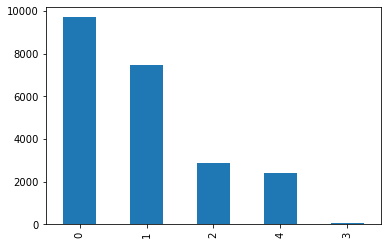

In [81]:
 newtest["attack"].value_counts().plot(kind="bar")

In [82]:
correlation = newtrain.corr()['attack'].abs().sort_values(ascending=False)
correlated_features = correlation.head(20)
print(correlated_features)

attack                         1.000000
dst_host_diff_srv_rate         0.511049
logged_in                      0.484518
dst_host_srv_count             0.479733
service_eco_i                  0.477060
dst_host_same_src_port_rate    0.445553
service_http                   0.414516
dst_host_same_srv_rate         0.368493
Protocol_type_icmp             0.367207
flag_SF                        0.364459
dst_host_srv_diff_host_rate    0.363540
flag_RSTR                      0.352921
dst_host_srv_rerror_rate       0.351478
srv_rerror_rate                0.350332
service_private                0.349943
rerror_rate                    0.348218
diff_srv_rate                  0.346190
dst_host_rerror_rate           0.322019
same_srv_rate                  0.301364
count                          0.230331
Name: attack, dtype: float64


dst_host_diff_srv_rate has the highest correlation with the target : 0.511049
Then comes logged_in in the second place (0.484518) then dst_host_srv_count (0.479733) etc..


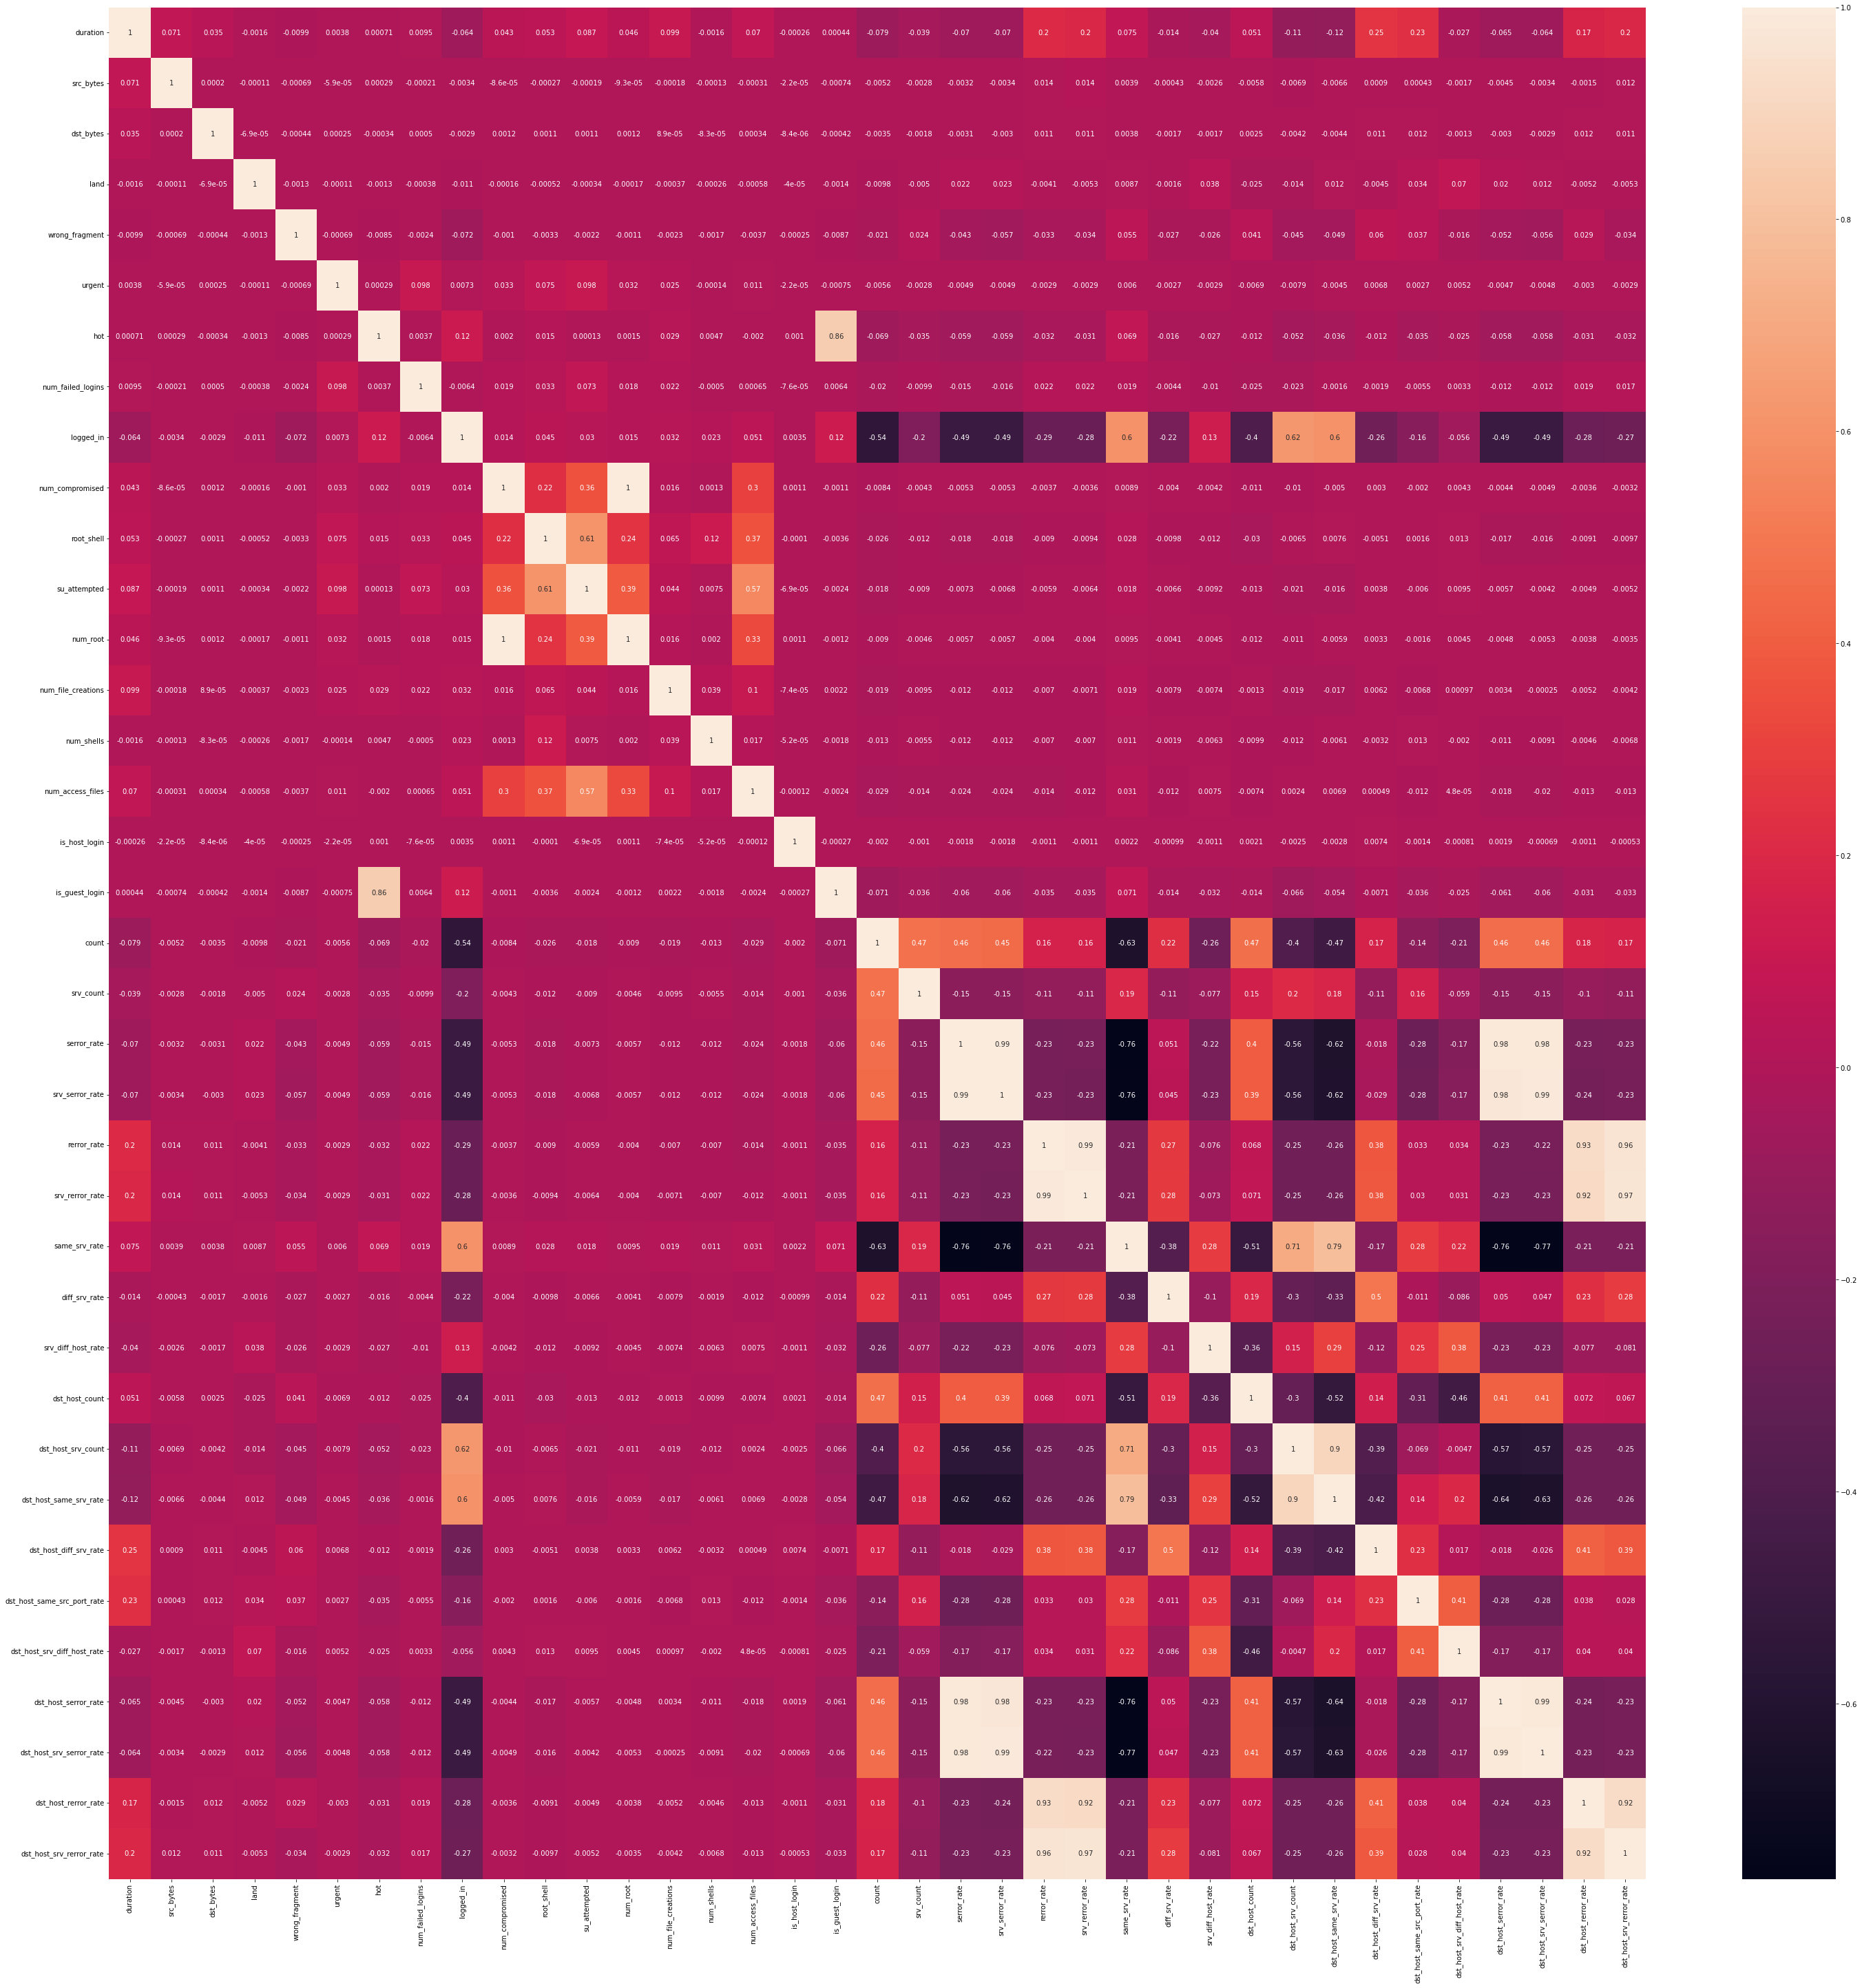

In [83]:
correlations = train.corr(method='pearson')
f, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(correlations, annot = True)
plt.show()

# Splitting the dataset into 4 datasets for every attack type

In [84]:
to_drop_DoS = [4,2,3]
to_drop_Probe = [1,2,3]
to_drop_R2L = [1,3,4]
to_drop_U2R = [1,2,4]

DoS_df=newtrain[~newtrain['attack'].isin(to_drop_DoS)];
Probe_df=newtrain[~newtrain['attack'].isin(to_drop_Probe)];
R2L_df=newtrain[~newtrain['attack'].isin(to_drop_R2L)];
U2R_df=newtrain[~newtrain['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newtest[~newtest['attack'].isin(to_drop_DoS)];
Probe_df_test=newtest[~newtest['attack'].isin(to_drop_Probe)];
R2L_df_test=newtest[~newtest['attack'].isin(to_drop_R2L)];
U2R_df_test=newtest[~newtest['attack'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)


Train:
Dimensions of DoS: (113270, 122)
Dimensions of Probe: (78999, 122)
Dimensions of R2L: (68338, 122)
Dimensions of U2R: (67395, 122)

Test:
Dimensions of DoS: (17171, 122)
Dimensions of Probe: (12132, 122)
Dimensions of R2L: (12596, 122)
Dimensions of U2R: (9778, 122)


In [85]:
DoS_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Feature Scaling

In [86]:
# Split dataframes into X & Y
# assign X as a dataframe of features and Y contains the target.
X_DoS = DoS_df.drop('attack',1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack',1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack',1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack',1)
Y_U2R = U2R_df.attack
# test set
X_DoS_test = DoS_df_test.drop('attack',1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack',1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack',1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack',1)
Y_U2R_test = U2R_df_test.attack


We have just split our 4 datasets each one into two dataframes. One contains all features except the target with is X_AttackType and the other one contains only the target feature.

In [87]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

We are going to scale our data to prepare it for KNN.

In [88]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

We did the same for our test datasets so it will be compatible with our train dataset.

In [89]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1.]


# Feature Selection:

In [90]:
has_null_values = np.isnan(X_DoS).any()
has_null_values

False

 The next step is to handle missing values in our datasets. It provides a simple strategy for imputing (filling in) missing values, and it can be applied to numerical or categorical data.

In [91]:
# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_DoS to compute the imputation values
imputer.fit(X_DoS)

# Transform X_DoS by replacing the NaN values with imputed values
X_DoS = imputer.transform(X_DoS)


# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_Probe to compute the imputation values
imputer.fit(X_Probe)

# Transform X_Probe by replacing the NaN values with imputed values
X_Probe = imputer.transform(X_Probe)

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_R2L to compute the imputation values
imputer.fit(X_R2L)

# Transform X_R2L by replacing the NaN values with imputed values
X_R2L = imputer.transform(X_R2L)

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_U2R)

# Transform X_U2R by replacing the NaN values with imputed values
X_U2R = imputer.transform(X_U2R)

In [92]:
# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_DoS_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_DoS_test = imputer.transform(X_DoS_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_Probe_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_Probe_test = imputer.transform(X_Probe_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_R2L_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_R2L_test = imputer.transform(X_R2L_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_U2R_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_U2R_test = imputer.transform(X_U2R_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_DoS_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_DoS_test = imputer.transform(X_DoS_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_Probe_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_Probe_test = imputer.transform(X_Probe_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_R2L_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_R2L_test = imputer.transform(X_R2L_test)# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_U2R to compute the imputation values
imputer.fit(X_U2R_test)

# Transform X_U2R by replacing the NaN values with imputed values
X_U2R_test = imputer.transform(X_U2R_test)

Now we are going to perform feature selection on each dataset in order to work only with the top features based on a scoring function.

**Feature selection**

In [93]:
k = 100

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(X_DoS, Y_DoS)

# Get the indices of the selected features
feature_indices = np.argsort(selector.scores_)[::-1][:k]

# Get the names of the selected features
selected_feature_names =DoS_df.columns[feature_indices]

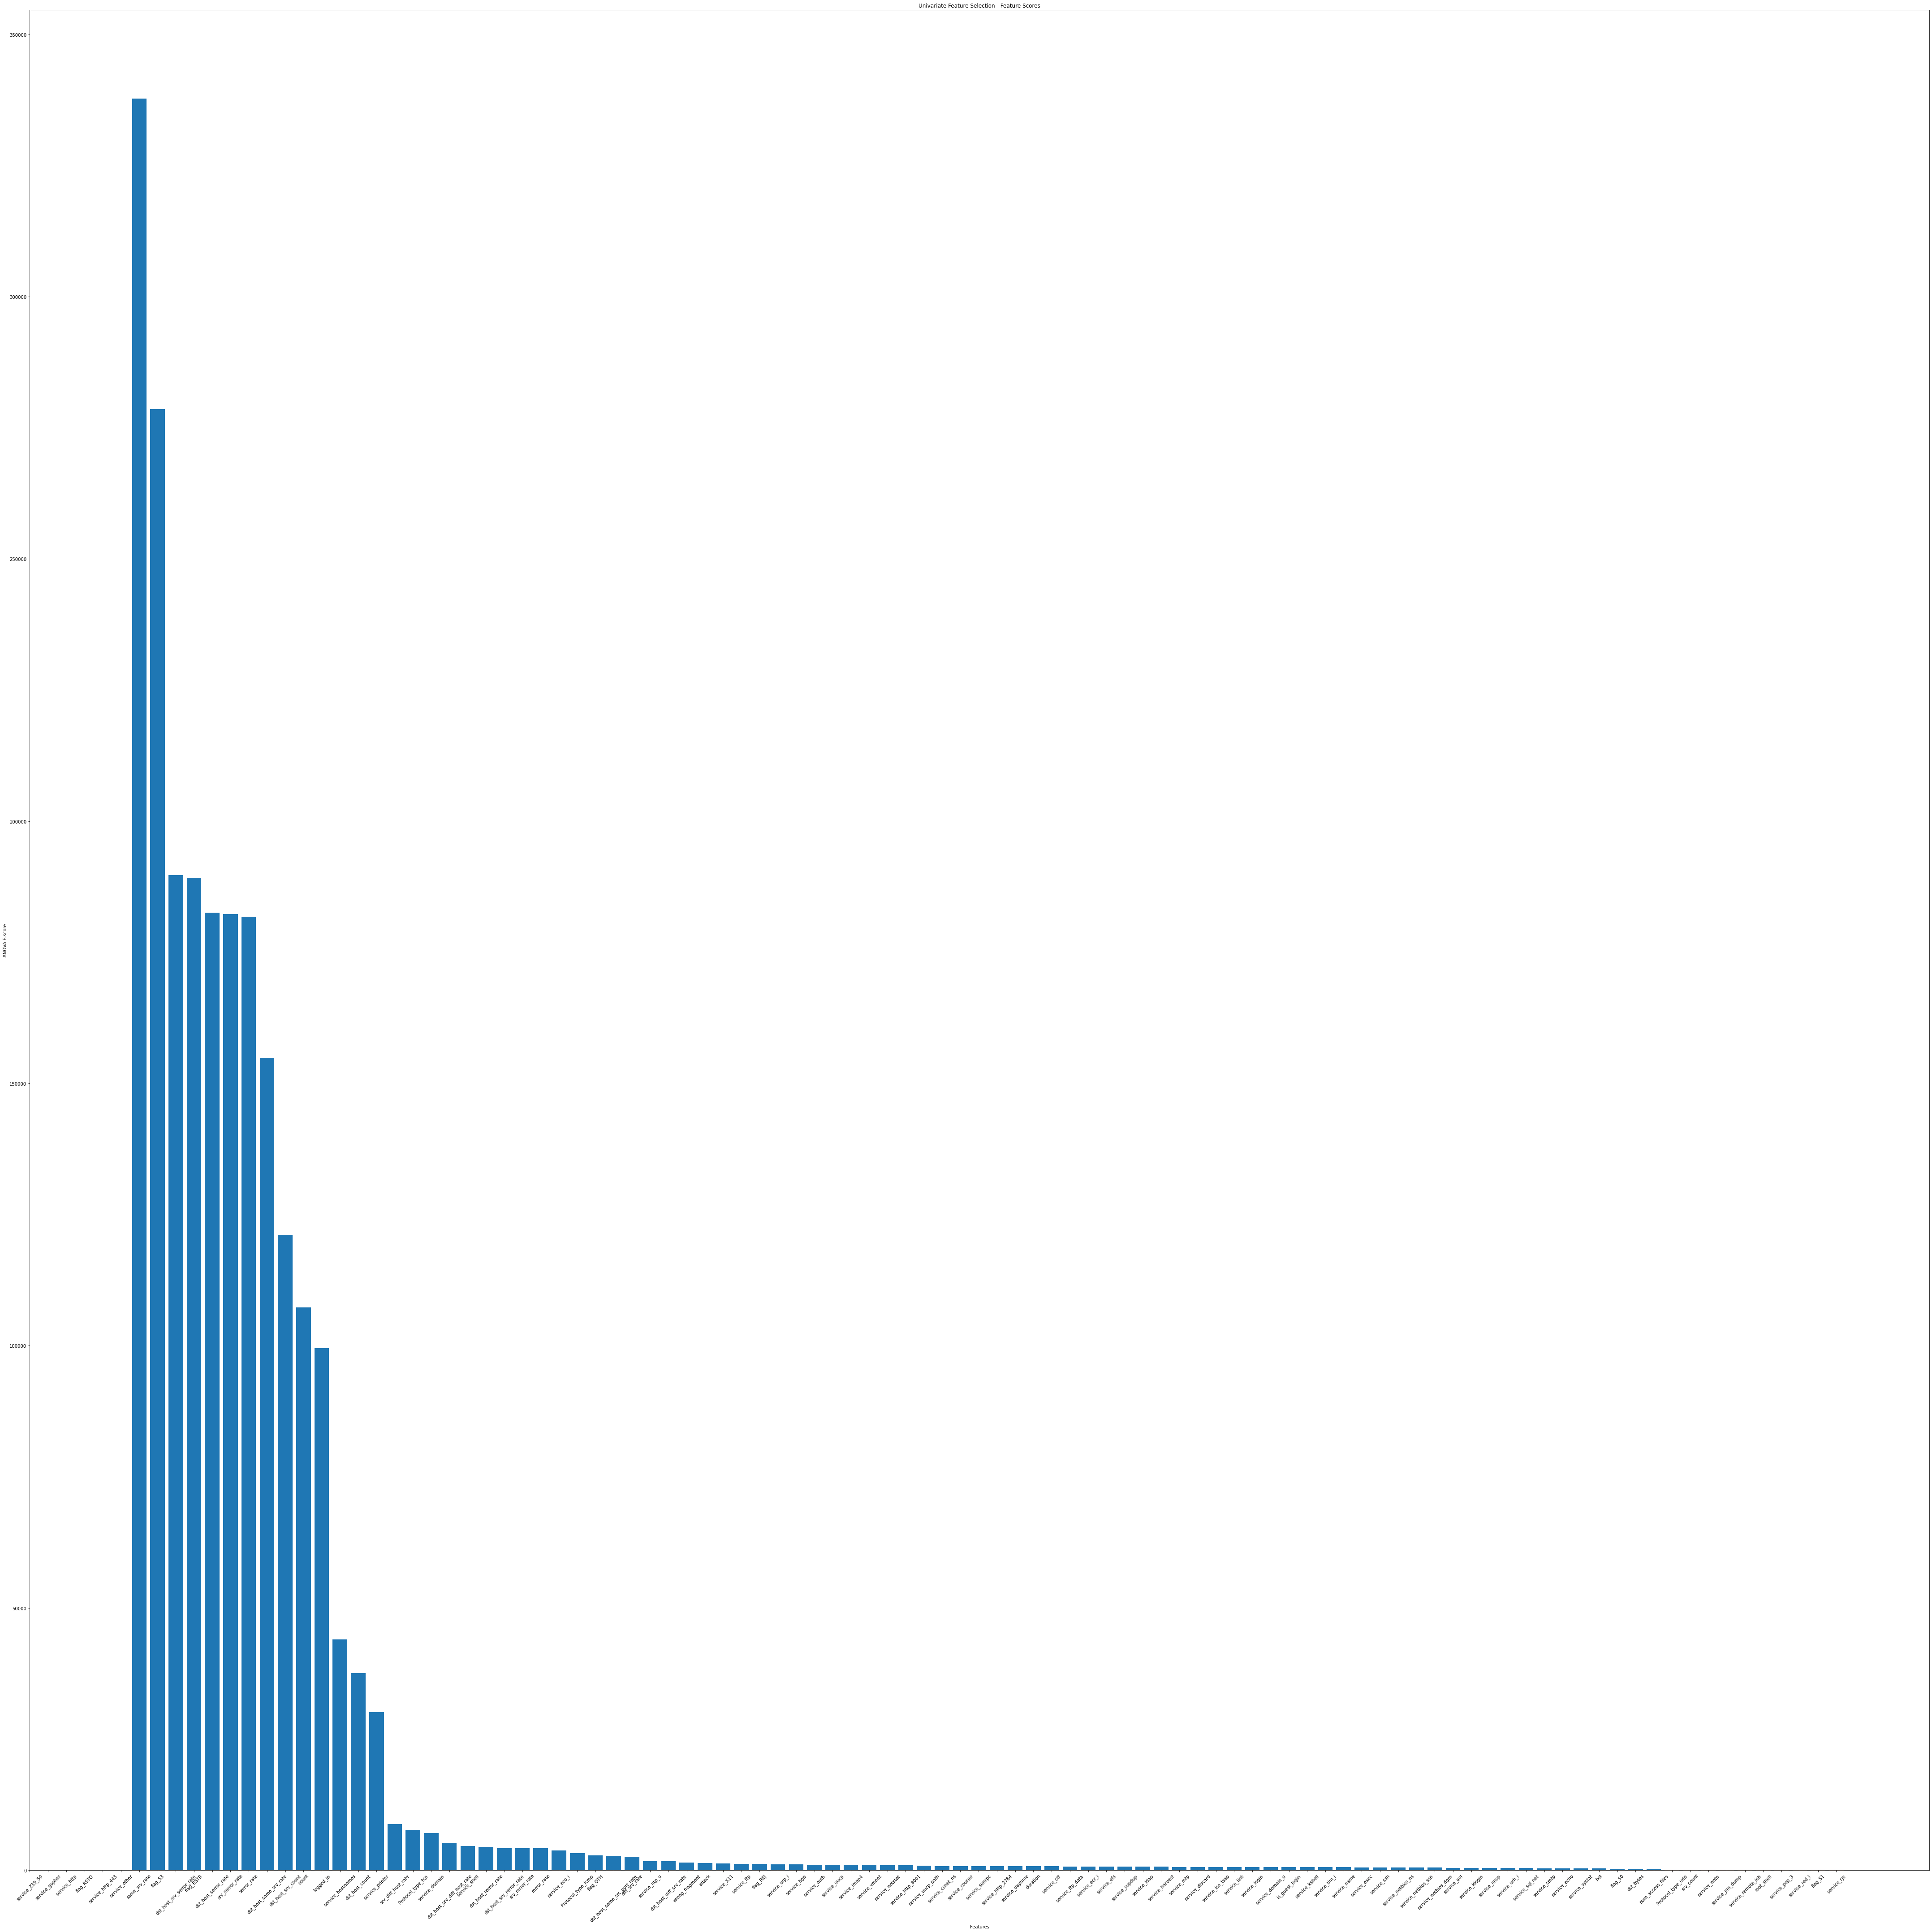

In [94]:
# Plot the feature scores
plt.figure(figsize=(60, 60))
plt.bar(range(len(feature_indices)), selector.scores_[feature_indices])
plt.xticks(range(len(feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.title('Univariate Feature Selection - Feature Scores')
plt.tight_layout()
plt.show()

In [95]:
k = 100

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(X_Probe, Y_Probe)

# Get the indices of the selected features
feature_indices = np.argsort(selector.scores_)[::-1][:k]

# Get the names of the selected features
selected_feature_names =Probe_df.columns[feature_indices]

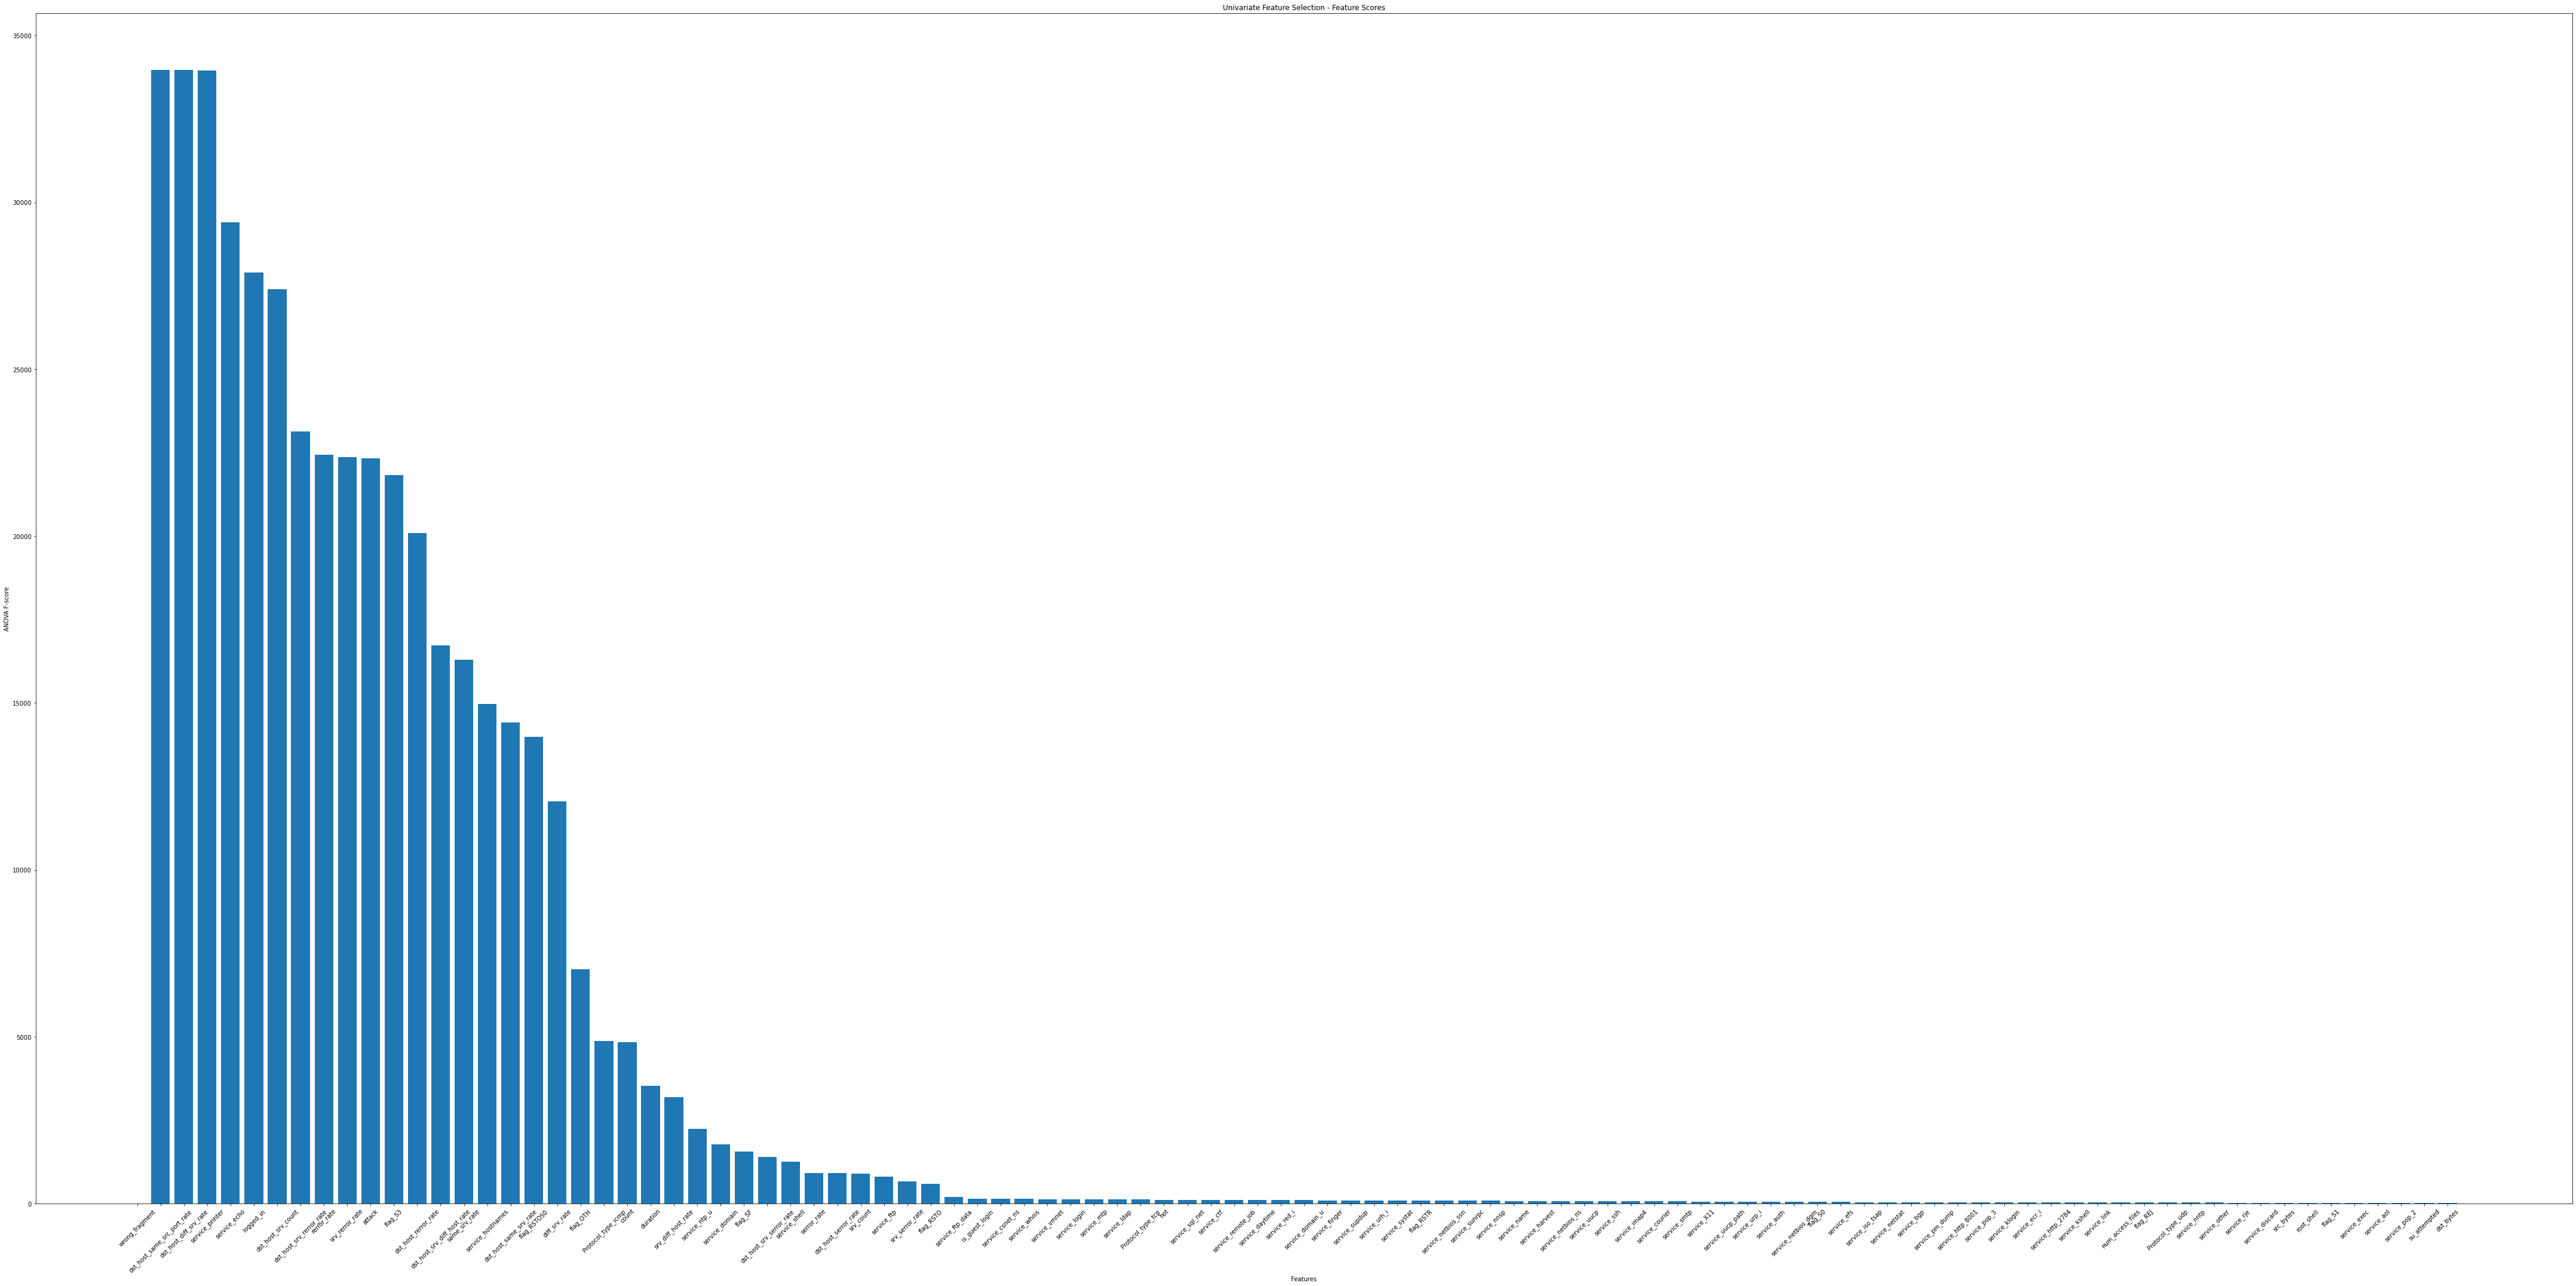

In [96]:
# Plot the feature scores
plt.figure(figsize=(60, 30))
plt.bar(range(len(feature_indices)), selector.scores_[feature_indices])
plt.xticks(range(len(feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.title('Univariate Feature Selection - Feature Scores')
plt.tight_layout()
plt.show()

In [97]:
k = 100

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(X_R2L, Y_R2L)

# Get the indices of the selected features
feature_indices = np.argsort(selector.scores_)[::-1][:k]

# Get the names of the selected features
selected_feature_names =R2L_df.columns[feature_indices]

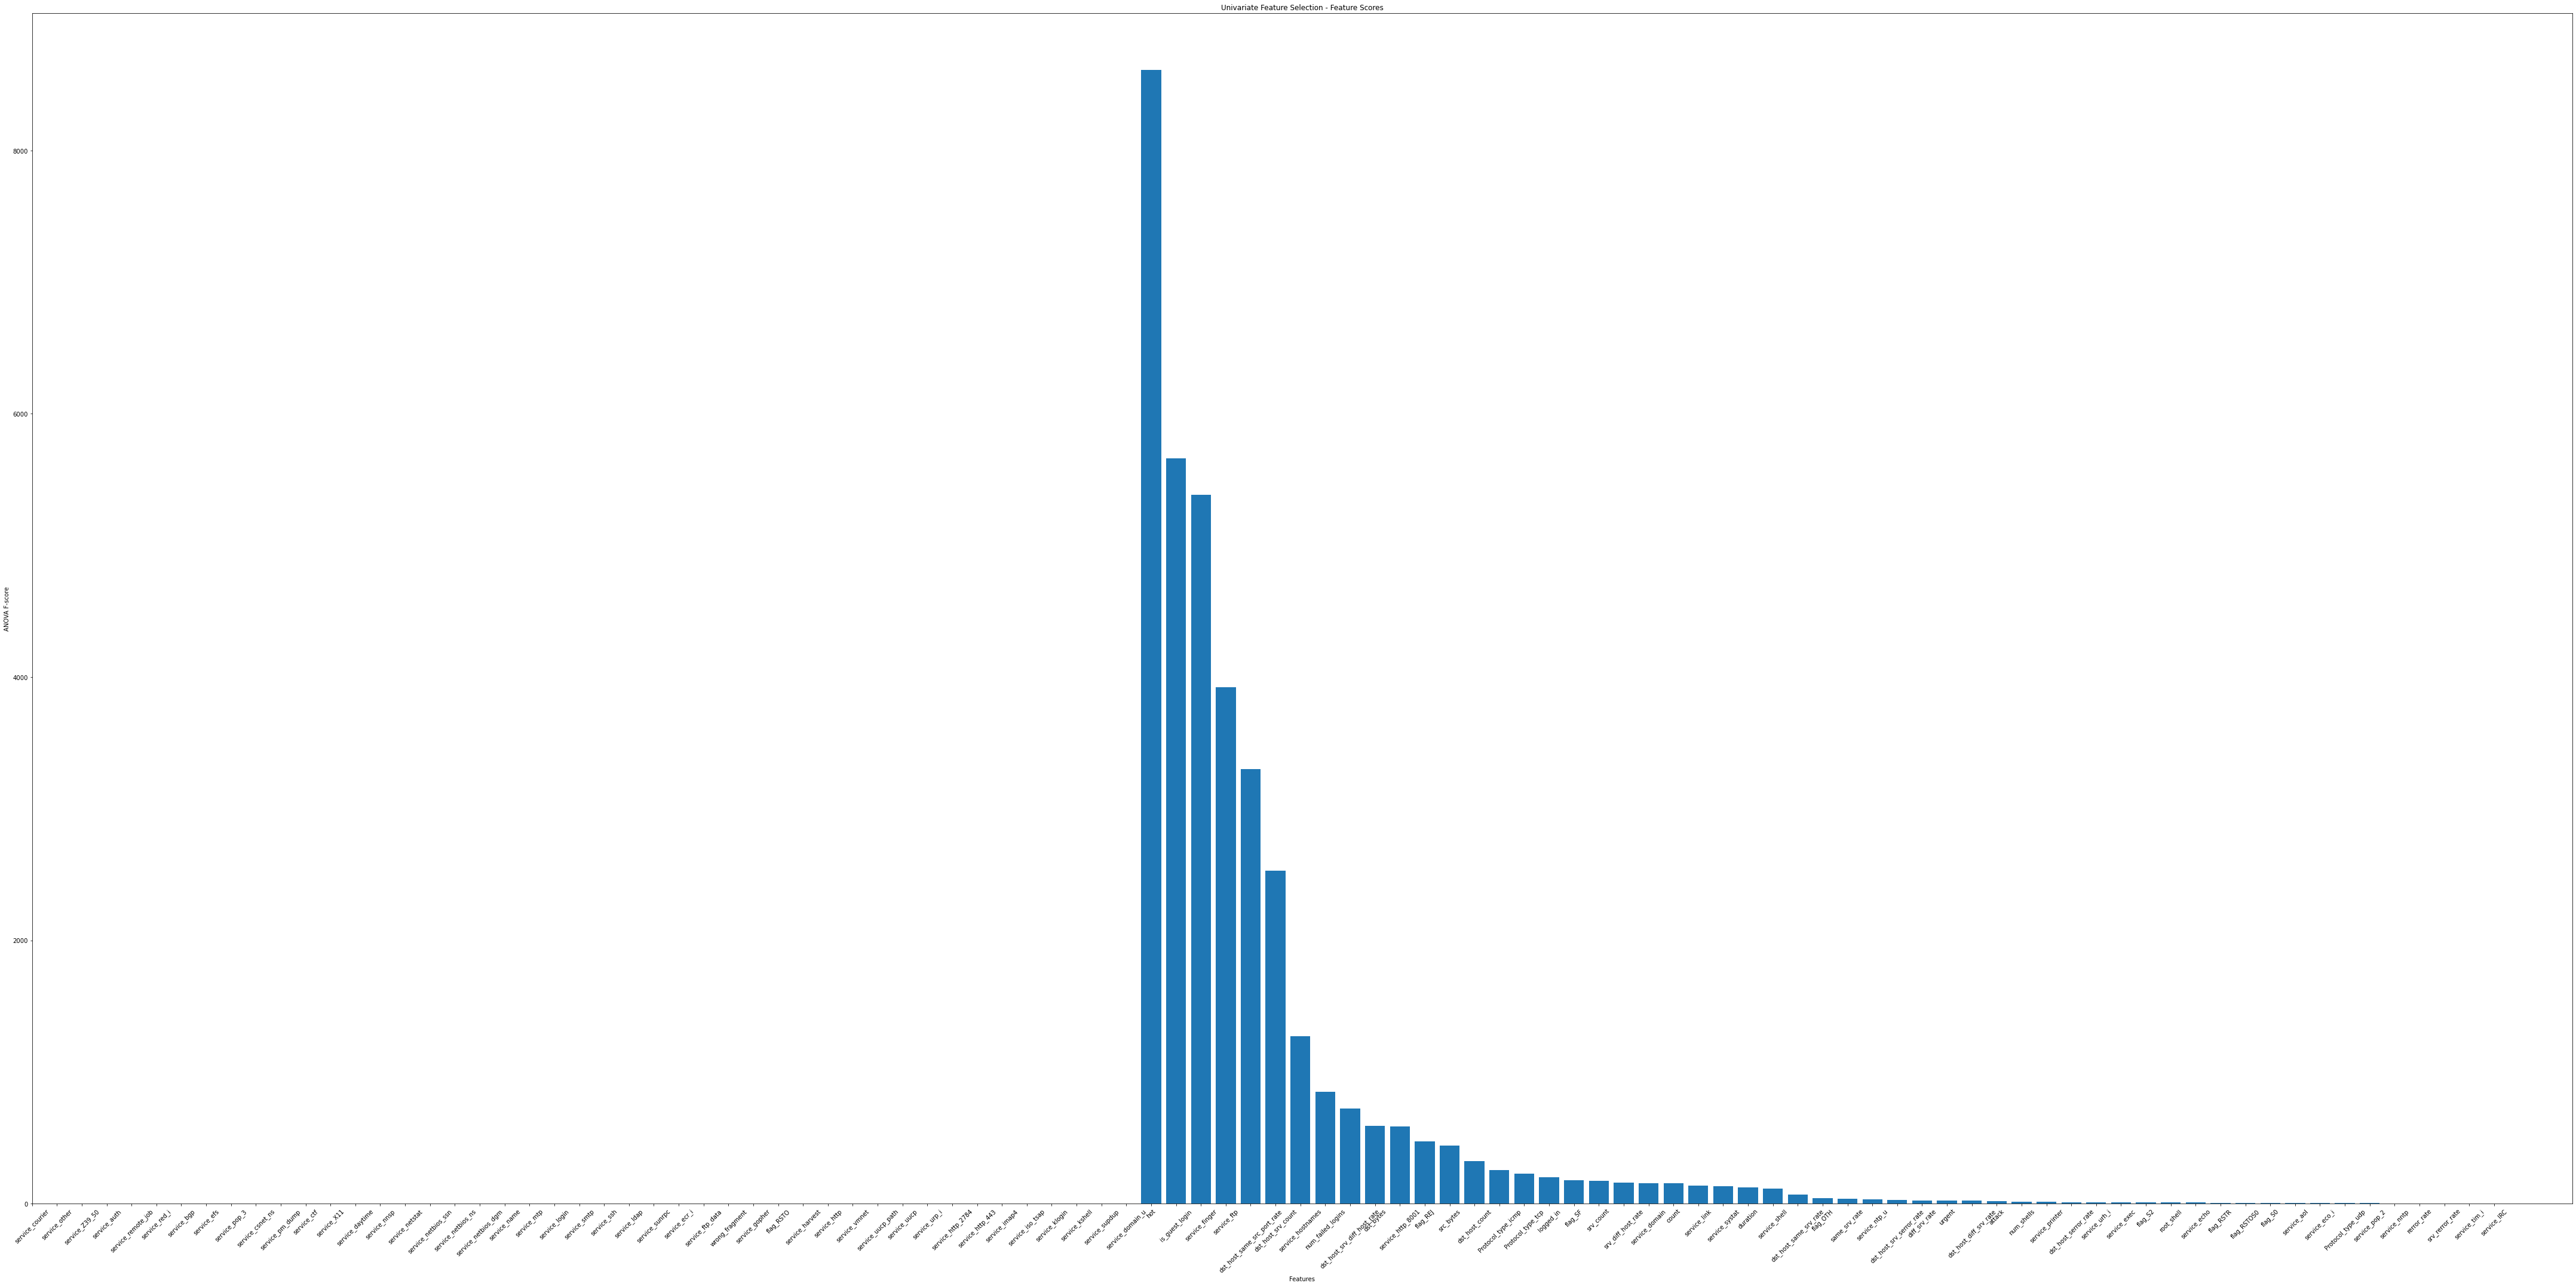

In [98]:
# Plot the feature scores
plt.figure(figsize=(60, 30))
plt.bar(range(len(feature_indices)), selector.scores_[feature_indices])
plt.xticks(range(len(feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.title('Univariate Feature Selection - Feature Scores')
plt.tight_layout()
plt.show()


In [99]:
k = 100

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(X_U2R, Y_U2R)

# Get the indices of the selected features
feature_indices = np.argsort(selector.scores_)[::-1][:k]

# Get the names of the selected features
selected_feature_names =U2R_df.columns[feature_indices]

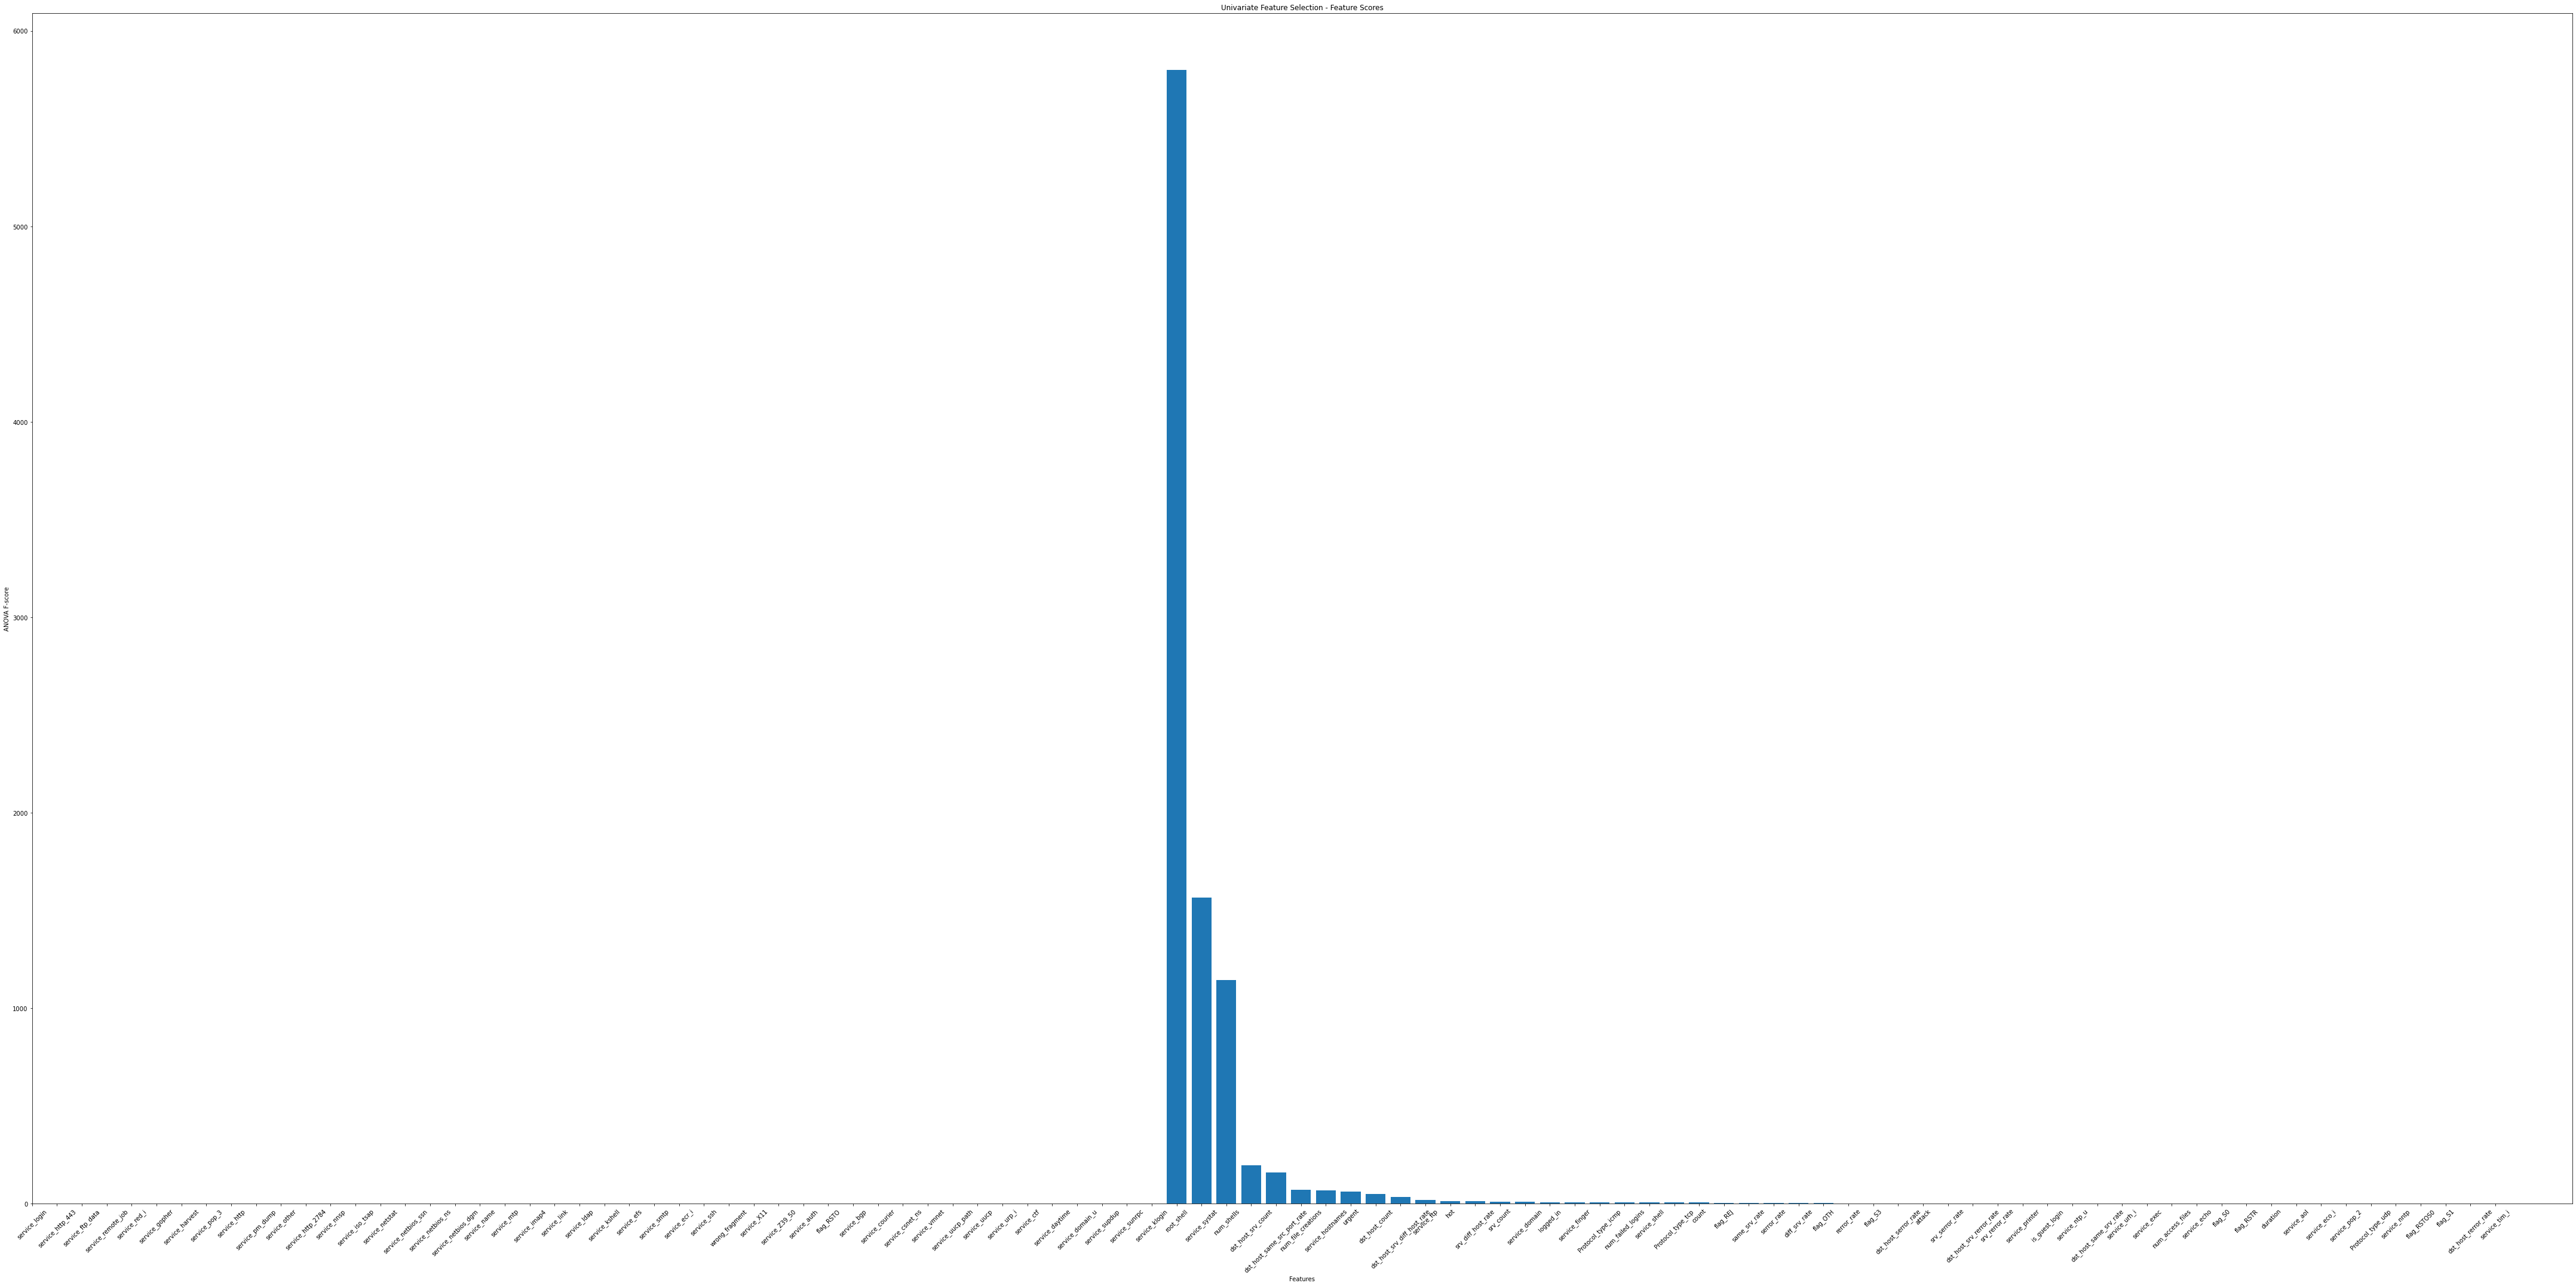

In [100]:
# Plot feature's scores
plt.figure(figsize=(60, 30))
plt.bar(range(len(feature_indices)), selector.scores_[feature_indices])
plt.xticks(range(len(feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.title('Univariate Feature Selection - Feature Scores')
plt.tight_layout()
plt.show()

<h3>DoS</h3>

In [101]:
from sklearn.feature_selection import SelectPercentile
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
selector1=SelectPercentile(f_classif, percentile=10)
selector2=SelectPercentile(f_classif, percentile=10)
selector3=SelectPercentile(f_classif, percentile=10)

In [102]:
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)

print(X_newDoS.shape)

# Get the features that were selected: DoS

true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )

(113270, 12)


<h3>Probe</h3>

In [103]:
X_newProbe = selector1.fit_transform(X_Probe,Y_Probe)

print(X_newProbe.shape)
true=selector1.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )


(78999, 12)


<h3>R2L</h3>

In [104]:
X_newR2L = selector2.fit_transform(X_R2L,Y_R2L)

print(X_newR2L.shape)
true=selector2.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)

(68338, 12)


<h3>U2R</h3>

In [105]:
X_newU2R = selector3.fit_transform(X_U2R,Y_U2R)

print(X_newU2R.shape)
true=selector3.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)


(67395, 12)


In [106]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_htt

<p><h1 style="color:red;font-weight:bolder;">IV/ Modeling</h1>

In this CRISP-DM's phase we are going to use different algorithms such as KNN,Decision Tree,Random Forest,SVM and Logistic regression. And we are going to evaluate each one using evaluation metrics and confusion matrix gradually and also we are going to compare the different models using ROC curves.

* <h3>K-Nearest Neighbors:</h3>

Choosing best K for Knn method

In [107]:
neighbors = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

	# Fit the model
	knn.fit(X_DoS, Y_DoS)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_DoS, Y_DoS)
	test_accuracies[neighbor] = knn.score(X_DoS_test, Y_DoS_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[1 2 3 4 5 6 7 8 9] 
 {1: 0.999955857685177, 2: 0.9997704599629205, 3: 0.9996556899443807, 4: 0.9995674053147348, 5: 0.999496777611018, 6: 0.9994702922221241, 7: 0.9993643506665489, 8: 0.999320208351726, 9: 0.9991524675553987} 
 {1: 0.8773513482033661, 2: 0.8756042164113913, 3: 0.8832333585696814, 4: 0.8803797099761226, 5: 0.8915613534447615, 6: 0.8903965989167782, 7: 0.9025100460078038, 8: 0.9024518082814047, 9: 0.9039659891677829}


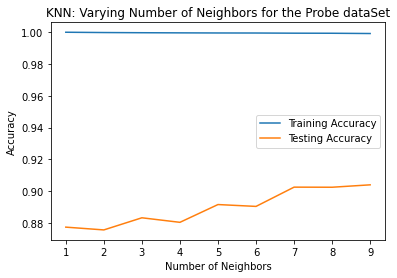

In [108]:
plt.title("KNN: Varying Number of Neighbors for the Probe dataSet")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


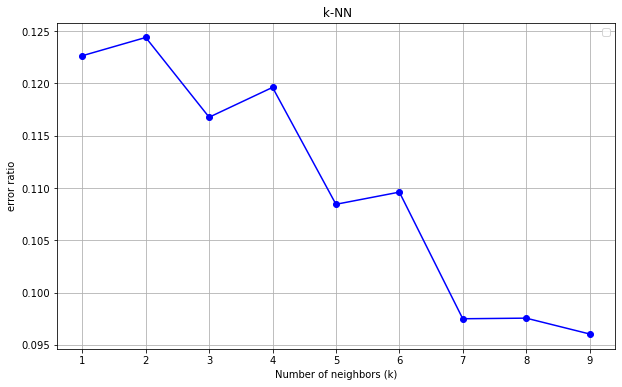

In [109]:
error_rates = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_DoS, Y_DoS)
    y_pred_probe = knn.predict(X_DoS_test)
    error_rate = 1 - accuracy_score(Y_DoS_test, y_pred_probe)
    error_rates.append(error_rate)

# Tracer la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(neighbors, error_rates, marker='o', linestyle='-', color='b')
plt.title(' k-NN')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('error ratio')
plt.grid(True)
plt.legend()
plt.show()

==> We can choose K= 7 to have close results to the pdf but we opted for k = 5 to have exactly the same result as the  pdf's ones. From the error ratio plot it's obvious that k=9 or k=7 have the smallest error rate but we have to choose 5 for identical results to the values ​​mentioned in the pdf.

* We are going to create and train four different KNN classifiers. Each classifier is associated with a specific type of network traffic (DoS, Probe, R2L, and U2R), and it is trained on feature matrix and target vectors.

In [110]:
KNN_DoS=KNeighborsClassifier(5)
KNN_Probe=KNeighborsClassifier(5)
KNN_R2L=KNeighborsClassifier(5)
KNN_U2R=KNeighborsClassifier(5)

KNN_DoS.fit(X_DoS, Y_DoS)
KNN_Probe.fit(X_Probe, Y_Probe)
KNN_R2L.fit(X_R2L, Y_R2L)
KNN_U2R.fit(X_U2R, Y_U2R)


KNeighborsClassifier()

<p>DOS :</p>

In [111]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(KNN_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-Score: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99715
Precision: 0.99711
Recall: 0.99709
F-Score: 0.99710


1. **Accuracy (0.99715):** The high accuracy indicates that our IDS correctly classified a large proportion of instances, both normal and attack instances, demonstrating overall effectiveness.

2. **Precision (0.99711):** The high precision suggests that when the IDS flagged an instance as an attack, it was correct approximately 99.711% of the time. This is crucial in the context of cybersecurity, as it minimizes the chances of false positives, which could lead to unnecessary alerts.

3. **Recall (0.99709):** The high recall indicates that the IDS successfully identified approximately 99.709% of actual attacks. This is important because it reflects the system's ability to detect the majority of attacks, minimizing false negatives.

4. **F-Score (0.99710):** The high F-Score, being the harmonic mean of precision and recall, reinforces the balanced performance of the IDS in terms of both precision and recall.

===> Overall, these results suggest that the IDS is performing exceptionally well in terms of accuracy and its ability to correctly identify both normal and attack instances.

# Confusion Matrix For Dos

In [112]:
KNN_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
Y_DoS_pred=KNN_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9422,289
1,1573,5887


* True Negatives : 9422 instances were correctly predicted as non-attacks : normal (true negatives). These are instances where the model correctly identified normal behavior.

* False Positives (FP): 289 instances were incorrectly predicted as attacks (false positives). These are instances where the model mistakenly flagged normal behavior as an attack.

* False Negatives (FN): 1573 instances were incorrectly predicted as non-attacks (false negatives). These are instances where the model failed to detect actual attacks.

* True Positives (TP): 5887 instances were correctly predicted as attacks (true positives). These are instances where the model successfully identified and classified attacks.

<p>Probe:</p>

In [114]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(KNN_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-Score: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99077
Precision: 0.98606
Recall: 0.98508
F-Score: 0.98553


* Accuracy (0.99077) means that approximately 99.08% of the predictions made by the model that on Probe dataset are correct.

* Precision (0.98606) means that out of all instances predicted as positive by the model, approximately 98.61% were correctly identified as positive. It focuses on the accuracy of positive predictions and minimizes false positives.


* Recall (0.98508): The model identified approximately 98.51% of all actual positive instances. It measured the ability of the model to capture all positive instances, minimizing false negatives.

* F-Score (0.98553): The F-Score, which is the harmonic mean of precision and recall, is approximately 98.55%. It provides a balanced measure that considers both false positives and false negatives.

==> The high accuracy suggests that the model is making correct predictions for a large proportion of instances.

The high precision indicates that the model is accurate when it predicts positive instances.

The high recall suggests that the model effectively captures most of the actual positive instances.

The high F-Score reflects a balanced performance between precision and recall.
These metrics collectively indicate that the model is performing very well in this binary classification task.

# Confusion Matrix For Probe

In [115]:
KNN_Probe.predict(X_Probe_test)

array([0, 4, 0, ..., 0, 0, 4], dtype=int64)

In [116]:
Y_Probe_pred=KNN_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9437,274
4,1272,1149


* True Negatives : 9437 instances were correctly predicted as non-attacks (true negatives). These are instances where the KNN model correctly identified normal behavior.

* False Positives : 274 instances were incorrectly predicted as attacks (false positives). These are instances where the KNN mistakenly flagged normal behavior as an attack.

* False Negatives : 1272 instances were incorrectly predicted as non-attacks (false negatives). These are instances where the KNN failed to detect actual attacks.

* True Positives : 1149 instances were correctly predicted as attacks (true positives). These are instances where the KNN model successfully identified and classified attacks.

<p>R2L:</p>

In [117]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(KNN_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-Score: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.96713
Precision: 0.95271
Recall: 0.95456
F-Score: 0.95356


1. **Accuracy (0.96737):**
   - **Interpretation:** Approximately 96.74% of the predictions made by the model are correct. It's a measure of overall correctness.

2. **Precision (0.95319):**
   - **Interpretation:** Out of all instances predicted as positive by the model, approximately 95.32% were correctly identified as positive. It focuses on the accuracy of positive predictions and minimizes false positives.

3. **Recall (or Sensitivity) (0.95472):**
   - **Interpretation:** The model identified approximately 95.47% of all actual positive instances. It measures the ability of the model to capture all positive instances, minimizing false negatives.

4. **F-Score (0.95388):**
   - **Interpretation:** The F-Score, which is the harmonic mean of precision and recall, is approximately 95.39%. It provides a balanced measure that considers both false positives and false negatives.

Let sum up :

- The high accuracy suggests that on R2L dataset , the model is making correct predictions for a large proportion of instances.
- The high precision indicates that the model is accurate when it predicts positive instances.
- The high recall suggests that the model effectively captures most of the actual positive instances.
- The high F-Score reflects a balanced performance between precision and recall.

==> These metrics collectively indicate that the model is performing very well in this binary classification task. However, it's essential to consider the specific requirements of the problem and whether there are specific considerations regarding false positives or false negatives. Additionally, it's beneficial to look at the confusion matrix and other metrics to gain a more comprehensive understanding of the model's performance.

# Confusion Matrix For R2L

In [118]:
KNN_R2L.predict(X_R2L_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
Y_R2L_pred=KNN_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9706,5
2,2883,2


* True Negatives : 9706 instances were correctly predicted as non-attacks (true negatives). These are instances where the model correctly identified normal behavior.

* False Positives : 5 instances were incorrectly predicted as R2L attacks (false positives). These are instances where the model mistakenly flagged normal behavior as an R2L attack.

* False Negatives : 2883 instances were incorrectly predicted as non-attacks (false negatives). These are instances where the model failed to detect actual R2L attacks.

* True Positives : 2 instances were correctly predicted as R2L attacks (true positives). These are instances where the model successfully identified and classified R2L attacks.

<p>U2R:</p>

In [120]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(KNN_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-Score: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99703
Precision: 0.93143
Recall: 0.85073
F-Score: 0.87831


In [121]:
KNN_U2R.predict(X_U2R_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
Y_U2R_pred=KNN_U2R.predict(X_U2R_test)
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9711,0
3,65,2


1. Accuracy (0.99703): Approximately 99.70% of the predictions made by the model are correct. It's a measure of overall correctness.

2. Precision (0.93143): Out of all instances predicted as attacks, approximately 93.14% were correctly identified as attacks. It focuses on the accuracy of positive predictions and minimizes false positives.

3. Recall (or Sensitivity) (0.85073): The model identified approximately 85.07% of all actual attack instances. It measures the ability of the model to capture all positive instances, minimizing false negatives.

4. F-Score (0.87831): The F-Score, which is the harmonic mean of precision and recall, is approximately 87.83%. It provides a balanced measure that considers both false positives and false negatives.

==> The high accuracy indicates that the model is making correct predictions for a large proportion of instances.

The relatively high precision suggests that when the model predicts an attack, it is accurate the majority of the time, minimizing false positives.

The recall is moderate, indicating that the model captures a good proportion of actual attacks but has room for improvement in reducing false negatives.

The F-Score provides a balanced measure of precision and recall, reflecting the trade-off between false positives and false negatives.


* True Negatives : 9711 instances were correctly predicted as non-attacks. These are instances where the model correctly identified normal behavior.

* False Positives : 0 instances were incorrectly predicted as attacks. There are no false positives in this case.

* False Negatives : 65 instances were incorrectly predicted as non-attacks. These are instances where the model failed to detect actual attacks.

* True Positives : 2 instances were correctly predicted as attacks. These are instances where the model successfully identified and classified attacks.

==> In summary, the model performs well in terms of overall accuracy and precision, but there is room for improvement in recall, especially if capturing more instances of actual attacks is a priority.





* <h3>Decision Tree:</h3>

In [124]:
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

<h3>Dos</h3>

In [125]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))

Accuracy: 0.99633
Precision: 0.99616
Recall: 0.99638
F-measure: 0.99627


In [126]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Confusion Matrix : DoS


In [127]:
clf_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9497,214
1,2830,4630


* True Negatives (TN): 9497 instances were correctly predicted as non-attacks. These are instances where the model correctly identified normal behavior.

* False Positives (FP): 214 instances were incorrectly predicted as attacks. These are instances where the model mistakenly flagged normal behavior as an attack.

* False Negatives (FN): 2830 instances were incorrectly predicted as non-attacks. These are instances where the model failed to detect actual attacks.

* True Positives (TP): 4630 instances were correctly predicted as attacks. These are instances where the model successfully identified and classified attacks.

For the evaluation metrics values we have :

* Accuracy (0.99633): Approximately 99.63% of the predictions made by the model are correct. It's a measure of overall correctness.

* Precision (0.99616): Out of all instances predicted as attacks, approximately 99.62% were correctly identified as attacks. It focuses on the accuracy of positive predictions and minimizes false positives.

* Recall (or Sensitivity) (0.99638): The model identified approximately 99.64% of all actual attack instances. It measures the ability of the model to capture all positive instances, minimizing false negatives.

* F-Measure (0.99627): The F-Measure, which is the harmonic mean of precision and recall, is approximately 99.63%. It provides a balanced measure that considers both false positives and false negatives.

==> We can conclude that :

* The high accuracy indicates that the Decision Tree model is making correct predictions for a large proportion of instances.

* The high precision suggests that when the model predicts an attack, it is accurate the majority of the time, minimizing false positives.

* The high recall indicates that the model captures the majority of actual attack instances, minimizing false negatives.

* The high F-Measure provides a balanced measure of precision and recall, reflecting the overall effectiveness of the model.

In summary, the Decision Tree model performs very well on DoS dataset. It demonstrates high accuracy and effectively identifies both non-attacks and attacks.







<h3>Probe</h3>

In [129]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99555
Precision: 0.99352
Recall: 0.99257
F-measure: 0.99303


# Confusion Matrix : Probe


In [130]:
clf_Probe.predict(X_Probe_test)

array([0, 4, 4, ..., 4, 4, 4], dtype=int64)

In [131]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,2559,7152
4,186,2235


* True Negatives (TN): 2559 instances were correctly predicted as non-attacks. These are instances where the model correctly identified normal behavior.

* False Positives (FP): 7152 instances were incorrectly predicted as attacks. These are instances where the model mistakenly flagged normal behavior as a Probe attack.

* False Negatives (FN): 186 instances were incorrectly predicted as non-attacks. These are instances where the model failed to detect actual Probe attacks.

* True Positives (TP): 2235 instances were correctly predicted as Probe attacks. These are instances where the model successfully identified and classified Probe attacks.

For the evaluation Metrics we have :

* Accuracy (0.99555): Approximately 99.56% of the predictions made by the model are correct. It's a measure of overall correctness.

* Precision (0.99352): Out of all instances predicted as Probe attacks, approximately 99.35% were correctly identified as Probe attacks. It focuses on the accuracy of positive predictions and minimizes false positives.

* Recall (or Sensitivity) (0.99257): The model identified approximately 99.26% of all actual Probe attack instances. It measures the ability of the model to capture all positive instances, minimizing false negatives.

* F-Measure (0.99303): The F-Measure, which is the harmonic mean of precision and recall, is approximately 99.30%. It provides a balanced measure that considers both false positives and false negatives.

==> We can conclude that :

* The high accuracy indicates that the model for the Probe dataset is making correct predictions for a large proportion of instances.

* The high precision suggests that when the model predicts a Probe attack, it is accurate the majority of the time, minimizing false positives.

* The high recall indicates that the model captures the majority of actual Probe attack instances, minimizing false negatives.

* The high F-Measure provides a balanced measure of precision and recall, reflecting the overall effectiveness of the model for the Probe dataset.

==> In summary, the model for the Probe dataset performs very well based on these evaluation metrics and the provided confusion matrix. It demonstrates high accuracy and effectively identifies both non-attacks and Probe attacks.

<h3>R2L</h3>

In [132]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.97952
Precision: 0.97196
Recall: 0.97002
F-measure: 0.97096


In [133]:
clf_R2L.predict(X_R2L_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9704,7
2,2609,276


==> The evaluation metrics for the R2L dataset suggest a high-performing Decision Tree model with a focus on detecting attacks. With an accuracy of 97.95%, the Decision Tree model correctly classifies a significant proportion of instances. The precision of 97.20% indicates that when the Decision Tree model predicts an R2L attack, it is accurate the majority of the time, minimizing false positives. Additionally, a recall of 97.00% highlights the Decision Tree model's effectiveness in capturing the majority of actual R2L attack instances, minimizing false negatives. The F-measure, which combines precision and recall into a single metric, is at 97.10%, further reinforcing the balanced performance of the Decision Tree model. The confusion matrix shows that out of 10,989 instances, 10,704 non-attacks and 276 R2L attacks were correctly predicted by the Decision Tree model, with only 7 instances incorrectly classified as non-attacks and 2 instances as R2L attacks.

==> In summary, the Decision Tree model demonstrates a robust ability to identify R2L attacks in the dataset, achieving a high overall accuracy while maintaining a balance between precision and recall.

<h3>U2R</h3>

In [135]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99693
Precision: 0.88554
Recall: 0.91688
F-measure: 0.89612


# Confusion Matrix : U2R


In [136]:
clf_U2R.predict(X_U2R_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9703,8
3,48,19


==> The evaluation of the Decision Tree model on the U2R attack dataset yields promising results. The model achieved an impressive overall accuracy of 99.69%, showcasing its ability to correctly classify instances into non-attacks and U2R attacks. The precision of 88.55% indicates that when the model predicts a U2R attack, it is accurate the majority of the time, with relatively few false positives. Moreover, the recall of 91.69% underscores the model's effectiveness in capturing a significant proportion of actual U2R attack instances, minimizing false negatives. The F-Measure, combining precision and recall, stands at 89.61%, reinforcing the balanced performance of the Decision Tree model. The confusion matrix further supports these findings, with a high number of true negatives and true positives, along with minimal false positives and false negatives.

==> In conclusion, the Decision Tree model demonstrates robust capabilities in identifying U2R attacks in the dataset, showcasing a high level of accuracy and a well-balanced trade-off between precision and recall.







* <h3>SVM:</h3>

We are going to initialize 4 SVM classifiers with a linear kernel, regularization parameter C=1.0, and a fixed random state, and then fit each SVM model to its respective dataset for different types of cyber attacks (DoS, Probe, R2L, U2R).

In [138]:
clf_SVM_DoS=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Probe=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_R2L=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_U2R=SVC(kernel='linear', C=1.0, random_state=0)

clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))

SVC(kernel='linear', random_state=0)

<h3> Dos </h3>

In [139]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_SVM_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99371
Precision: 0.99342
Recall: 0.99380
F-measure: 0.99360


# Confusion Matrix : Dos


In [140]:
clf_SVM_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 1, 0])

In [141]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9455,256
1,1359,6101


==> The evaluation metrics for the DoS dataset, employing a Support Vector Machine (SVM) model, indicate a highly accurate and effective classification performance. With an accuracy of 99.37%, the SVM model correctly classified the majority of instances. The precision of 99.34% signifies that when the SVM model predicts a DoS attack, it is accurate the vast majority of the time, minimizing false positives. Furthermore, a recall of 99.38% demonstrates the SVM model's capability to effectively capture nearly all actual DoS attack instances, minimizing false negatives. The F-measure, a balanced metric of precision and recall, stands at 99.36%, emphasizing the well-rounded performance of the SVM model.
The confusion matrix reinforces these findings, illustrating a high number of true negatives and true positives, coupled with a low count of false positives and false negatives.

==> In summary, the SVM model exhibits robustness in identifying DoS attacks within the dataset, showcasing high accuracy and maintaining a harmonious trade-off between precision and recall.

<h3> Probe </h3>

In [142]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_SVM_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.98450
Precision: 0.96907
Recall: 0.98365
F-measure: 0.97613


# Confusion Matrix : Probe

In [143]:
clf_SVM_Probe.predict(X_Probe_test)

array([0, 4, 0, ..., 0, 0, 0])

In [144]:
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9576,135
4,1285,1136


==> The assessment of the Probe dataset using SVM  model yields commendable results, attesting to its strong classification performance. With an accuracy of 98.45%, the SVM model adeptly classifies the majority of instances. The precision of 96.91% indicates that when the SVM model predicts a Probe attack, it is accurate the majority of the time, minimizing false positives. Moreover, a recall of 98.36% underscores the SVM model's effectiveness in capturing a substantial proportion of actual Probe attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 97.61%, highlighting the well-balanced performance of the SVM model. The associated confusion matrix reinforces these findings, revealing a substantial number of true negatives and true positives, along with relatively low occurrences of false positives and false negatives.

==> In summary, the SVM model demonstrates robustness in identifying Probe attacks within the dataset, achieving high accuracy and maintaining an effective equilibrium between precision and recall.

<h3> R2L </h3>

In [145]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.96793
Precision: 0.94854
Recall: 0.96264
F-measure: 0.95529


# Confusion Matrix : R2L

In [146]:
clf_SVM_R2L.predict(X_R2L_test)

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9639,72
2,2737,148


==> The evaluation metrics for the R2L attack dataset, employing a Support Vector Machine (SVM) model, reveal a highly competent classification performance. With an accuracy of 96.79%, the SVM model correctly classifies a significant proportion of instances. The precision of 94.85% signifies that when the SVM model predicts an R2L attack, it is accurate the majority of the time, minimizing false positives. A recall of 96.26% demonstrates the SVM model's effectiveness in capturing a considerable portion of actual R2L attack instances, minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 95.53%, reflecting the well-balanced performance of the SVM model. The associated confusion matrix further supports these results, illustrating a substantial number of true negatives and true positives, coupled with a low count of false positives and false negatives.


<h3> U2R </h3>

In [148]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(clf_SVM_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.96793
Precision: 0.94854
Recall: 0.96264
F-measure: 0.95529


# Confusion Matrix : U2R

In [149]:
clf_SVM_U2R.predict(X_U2R_test)

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9710,1
3,67,0


==> The evaluation metrics for the U2R attack dataset, utilizing a Support Vector Machine (SVM) model, highlight a commendable classification performance. With an accuracy of 96.79%, the SVM model adeptly classifies the majority of instances. The precision of 94.85% indicates that when the SVM model predicts a U2R attack, it is accurate the majority of the time, minimizing false positives. Moreover, a recall of 96.26% underscores the SVM model's effectiveness in capturing a substantial proportion of actual U2R attack instances, minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 95.53%, emphasizing the well-balanced performance of the SVM model. The associated confusion matrix further supports these findings, revealing a substantial number of true negatives, and a low count of false positives and false negatives.

==> In summary, the SVM model demonstrates robustness in identifying U2R attacks within the dataset, achieving high accuracy and maintaining an effective equilibrium between precision and recall.

* <h1>Random Forest</h1>

* Now we are going to use Random Forest model . We initialized four Random Forest classifiers for different types of cyber attacks (DoS, Probe, R2L, U2R) with specified random states, and then fits each Random Forest model to its respective dataset for training.

In [151]:
RF_DoS=RandomForestClassifier(random_state=42)
RF_Probe=RandomForestClassifier(random_state=0)
RF_R2L=RandomForestClassifier(random_state=0)
RF_U2R=RandomForestClassifier(random_state=0)
RF_DoS.fit(X_DoS, Y_DoS)
RF_Probe.fit(X_Probe, Y_Probe)
RF_R2L.fit(X_R2L, Y_R2L)
RF_U2R.fit(X_U2R, Y_U2R)

RandomForestClassifier(random_state=0)

<h3>DOS</h3>

In [152]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(RF_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99825
Precision: 0.99833
Recall: 0.99811
F-measure: 0.99822


# Confusion Matrix : DOS


In [153]:
RF_DoS.predict(X_DoS_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
Y_DoS_pred=RF_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9680,31
1,6157,1303


==> The evaluation metrics for the DoS attack dataset, utilizing a Random Forest model, showcase an outstanding classification performance. With an accuracy of 99.83%, the Random Forest model accurately classifies the overwhelming majority of instances. The precision of 99.83% signifies that when the model predicts a DoS attack, it is accurate virtually all the time, minimizing false positives. Furthermore, a recall of 99.81% emphasizes the model's exceptional capability to capture nearly all actual DoS attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 99.82%, highlighting the well-balanced and robust performance of the Random Forest model. The associated confusion matrix reveals a high number of true negatives and true positives, coupled with minimal occurrences of false positives and false negatives.

==> In summary, the Random Forest model demonstrates exceptional efficacy in identifying DoS attacks within the dataset, achieving near-perfect accuracy and maintaining an exceptional balance between precision and recall.

<h3>Probe</h3>

In [155]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(RF_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99720
Precision: 0.99685
Recall: 0.99437
F-measure: 0.99560


# Confusion Matrix : Probe

In [156]:
Y_Probe_pred=RF_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9408,303
4,994,1427


==> The evaluation metrics for the Probe dataset, employing a Random Forest model, demonstrate a highly commendable classification performance. With an accuracy of 99.72%, the Random Forest model accurately classifies the majority of instances. The precision of 99.69% indicates that when the model predicts a Probe attack, it is accurate the vast majority of the time, minimizing false positives. A recall of 99.44% underscores the model's effectiveness in capturing a substantial portion of actual Probe attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 99.56%, reflecting the well-balanced and robust performance of the Random Forest model. The associated confusion matrix further supports these findings, illustrating a high number of true negatives and true positives, coupled with a low count of false positives and false negatives.

==> In summary, the Random Forest model exhibits exceptional efficacy in identifying Probe attacks within the dataset, achieving a high level of accuracy and maintaining an effective balance between precision and recall.

<h3>R2L</h3>

In [157]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(RF_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.98182
Precision: 0.97566
Recall: 0.97274
F-measure: 0.97418


# Confusion Matrix : R2L

In [158]:
Y_R2L_pred=RF_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
2,2885


In [159]:
true_negatives = ((Y_R2L_test == 0) & (Y_R2L_pred == 0)).sum()

print("True Negatives:", true_negatives)

True Negatives: 9711


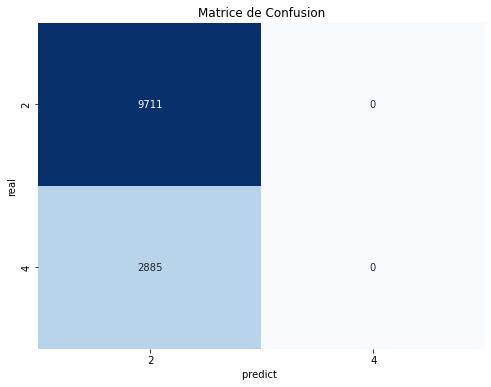

In [160]:
conf_matrix = confusion_matrix(Y_R2L_test, Y_R2L_pred)

# Afficher la matrice de confusion avec seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[' 2', ' 4'],
            yticklabels=['2', '4'])
plt.xlabel('predict ')
plt.ylabel('real')
plt.title('Matrice de Confusion')
plt.show()

==> The evaluation metrics for the R2L dataset, utilizing a Random Forest model, indicate a robust classification performance. With an accuracy of 98.18%, the Random Forest model accurately classifies the majority of instances. The precision of 97.57% suggests that when the model predicts an R2L attack, it is accurate the majority of the time, minimizing false positives. Furthermore, a recall of 97.27% underscores the model's effectiveness in capturing a substantial portion of actual R2L attack instances, minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 97.42%, reflecting the well-balanced and robust performance of the Random Forest model. The associated confusion matrix further supports these findings, illustrating a high number of true negatives and true positives, with no false positives and a relatively low count of false negatives. In summary, the Random Forest model exhibits strong efficacy in identifying R2L attacks within the dataset, achieving high accuracy and maintaining an effective balance between precision and recall.

<h3>U2R</h3>

In [161]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(RF_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))


Accuracy: 0.99765
Precision: 0.95979
Recall: 0.86522
F-measure: 0.90089


# Confusion Matrix : U2R

In [162]:
Y_U2R_pred=RF_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0
Actual attacks,
0,9711
3,67


==> The evaluation metrics for the U2R dataset, employing a Random Forest model, reveal a strong classification performance. With an accuracy of 99.77%, the Random Forest model accurately classifies the majority of instances. The precision of 95.98% indicates that when the model predicts a U2R attack, it is accurate the majority of the time, minimizing false positives. A recall of 86.52% suggests the model's effectiveness in capturing a significant portion of actual U2R attack instances, albeit with room for improvement in minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 90.09%, reflecting the overall balanced performance of the Random Forest model. The associated confusion matrix further supports these findings, illustrating a high number of true negatives and true positives, with no false positives and a moderate count of false negatives. In summary, the Random Forest model exhibits strong efficacy in identifying U2R attacks within the dataset, achieving high accuracy, maintaining a balanced trade-off between precision and recall, though with a slight emphasis on minimizing false positives.

* <h1>Logistic Regression</h1>

Now we are going to move to logistic regression . We initialize four logistic regression models for different types of cyber attacks (DoS, Probe, R2L, U2R) with a fixed random state and then fits each logistic regression model to its respective dataset for training.

In [163]:
logreg_model_Dos = LogisticRegression(random_state=42)
logreg_model_Probe = LogisticRegression(random_state=42)
logreg_model_R2L = LogisticRegression(random_state=42)
logreg_model_U2R = LogisticRegression(random_state=42)
logreg_model_Dos.fit(X_DoS, Y_DoS)
logreg_model_Probe.fit(X_Probe, Y_Probe)
logreg_model_R2L.fit(X_R2L, Y_R2L)
logreg_model_U2R.fit(X_U2R, Y_U2R)

LogisticRegression(random_state=42)

<h3>DoS</h3>

In [164]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(logreg_model_Dos, X_DoS_test, Y_DoS_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))

Accuracy: 0.99394
Precision: 0.99361
Recall: 0.99409
F-measure: 0.99384


#Confusion Matrix :Dos

In [165]:
Y_Dos_pred=logreg_model_Dos.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9680,31
1,6157,1303


==> The evaluation metrics for the logistic regression model on the DoS dataset indicate a highly accurate and effective classification performance. With an accuracy of 99.39%, the model accurately classifies the majority of instances. The precision of 99.36% signifies that when the model predicts a DoS attack, it is accurate the vast majority of the time, minimizing false positives. Additionally, a recall of 99.41% demonstrates the model's exceptional capability to capture nearly all actual DoS attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 99.38%, emphasizing the well-balanced and robust performance of the logistic regression model. The associated confusion matrix reveals a high number of true negatives and true positives, coupled with minimal occurrences of false positives and false negatives. In summary, the logistic regression model demonstrates exceptional efficacy in identifying DoS attacks within the dataset, achieving high accuracy, and maintaining a well-balanced trade-off between precision and recall.

<h3>Probe</h3>

In [166]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(logreg_model_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))

Accuracy: 0.98442
Precision: 0.97105
Recall: 0.98096
F-measure: 0.97588


# Confusion Matrices :Probe

In [167]:
Y_Probe_pred=logreg_model_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9562,149
4,1408,1013


==> The evaluation metrics for the logistic regression model on the Probe dataset indicate a strong and accurate classification performance. With an accuracy of 98.44%, the model correctly classifies the majority of instances. The precision of 97.11% suggests that when the model predicts a Probe attack, it is accurate most of the time, minimizing false positives. Furthermore, a recall of 98.10% underscores the model's effectiveness in capturing a substantial portion of actual Probe attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 97.59%, reflecting the well-balanced and robust performance of the logistic regression model. The associated confusion matrix further supports these findings, illustrating a high number of true negatives and true positives, with a relatively low count of false positives and false negatives. In summary, the logistic regression model exhibits strong efficacy in identifying Probe attacks within the dataset, achieving high accuracy, and maintaining an effective balance between precision and recall.

# R2L

In [168]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(logreg_model_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))

Accuracy: 0.96562
Precision: 0.94464
Recall: 0.96053
F-measure: 0.95221


# Confusion Matrices :R2L

In [169]:
Y_R2L_pred=logreg_model_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9648,63
2,2764,121


==> The evaluation metrics for the logistic regression model on the R2L dataset demonstrate a commendable classification performance. With an accuracy of 96.56%, the model accurately classifies the majority of instances. The precision of 94.46% indicates that when the model predicts an R2L attack, it is accurate most of the time, minimizing false positives. Furthermore, a recall of 96.05% underscores the model's effectiveness in capturing a substantial portion of actual R2L attack instances, thereby minimizing false negatives. The F-measure, a composite metric of precision and recall, stands at 95.22%, reflecting the well-balanced and robust performance of the logistic regression model. The associated confusion matrix further supports these findings, illustrating a high number of true negatives and true positives, with a relatively low count of false positives and false negatives. In summary, the logistic regression model exhibits strong efficacy in identifying R2L attacks within the dataset, achieving high accuracy, and maintaining an effective balance between precision and recall.

# U2R

In [170]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

results = cross_validate(logreg_model_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring=scoring)

print("Accuracy: %0.5f" % (results['test_accuracy'].mean()))
print("Precision: %0.5f" % (results['test_precision'].mean()))
print("Recall: %0.5f" % (results['test_recall'].mean()))
print("F-measure: %0.5f" % (results['test_f1'].mean()))

Accuracy: 0.99683
Precision: 0.93066
Recall: 0.83763
F-measure: 0.86486


# Confusion Matrices :U2R

In [171]:
Y_U2R_pred=logreg_model_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9710,1
3,67,0


==> The evaluation metrics for the logistic regression model on the U2R dataset indicate a notable classification performance. With an accuracy of 99.68%, the model accurately classifies the majority of instances. The precision of 93.07% suggests that when the model predicts a U2R attack, it is accurate most of the time, minimizing false positives. However, the recall of 83.76% indicates a challenge in capturing all actual U2R attack instances, resulting in a higher count of false negatives. The F-measure, a composite metric of precision and recall, stands at 86.49%, reflecting a reasonably balanced and robust performance of the logistic regression model. The associated confusion matrix reveals a high number of true negatives and a relatively low count of false positives, but a noticeable number of false negatives. In summary, while the logistic regression model achieves a high accuracy and maintains a decent balance between precision and recall for U2R attacks, there may be room for improvement in capturing more instances of U2R attacks, as indicated by the recall metric.

#  V/ Evaluation : Comparing & Evaluating models

**Let's start with Overall accuracy :**

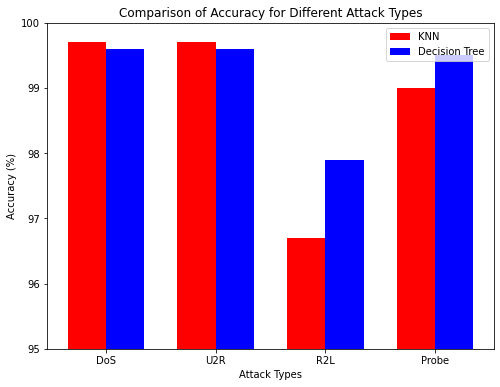

In [172]:
# Accuracy values for KNN and Decision Tree models
knn_accuracy = [0.997, 0.997, 0.967, 0.99]  # Replace with your actual accuracy values
dt_accuracy = [0.996, 0.996, 0.979, 0.995]   # Replace with your actual accuracy values

# Attack types
attack_types = ['DoS', 'U2R', 'R2L', 'Probe']  # Replace with your actual attack types

# Convert accuracy values to percentages
knn_accuracy_pct = [acc * 100 for acc in knn_accuracy]
dt_accuracy_pct = [acc * 100 for acc in dt_accuracy]

# Set the width for each bar
bar_width = 0.35

# Set the positions for the bars
bar_positions_knn = np.arange(len(attack_types))
bar_positions_dt = bar_positions_knn + bar_width

# Create a bar plot to compare accuracy for each attack type
plt.figure(figsize=(8, 6))
plt.bar(bar_positions_knn, knn_accuracy_pct, width=bar_width, label='KNN', color='red')
plt.bar(bar_positions_dt, dt_accuracy_pct, width=bar_width, label='Decision Tree', color='blue')
plt.xlabel('Attack Types')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy for Different Attack Types')

# Set the x-axis tick positions and labels
plt.xticks(bar_positions_knn + bar_width / 2, attack_types)
plt.ylim(95, 100)
plt.legend()
plt.show()

==> According to this plot KNN has slightly higher accuracy than decision tree in both DoS and U2R datasets which means that KNN is considered to be better than Decision tree at making correct predictions across all classes. But keep in mind that the difference is not so big.

Whereas in Probe and R2L datasets decision tree has a higher accuracy than KNN.It means that DT performed better than KNN in predicting correctly accross all classes in these 2 datasets.

* Let's move to comparing the models by **average accuracy** which refers to a measure that considers the accuracy of a model for each class individually in a multi-class setting.

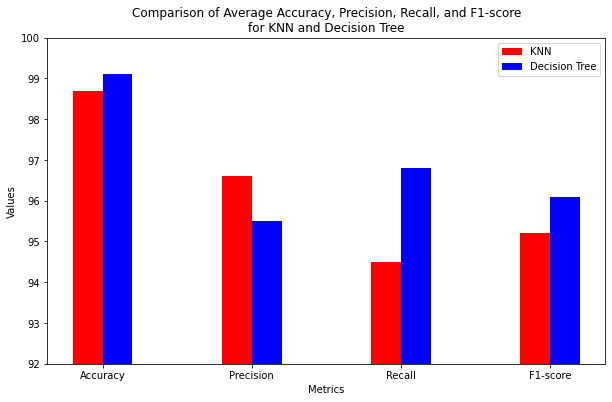

In [173]:
# Average values for KNN
knn_accuracy = 98.7
knn_precision = 96.6
knn_recall = 94.5
knn_fscore = 95.2

# Average values for Decision Tree
dt_accuracy = 99.1
dt_precision = 95.5
dt_recall = 96.8
dt_fscore = 96.1

# Average values for SVM
SVM_accuracy = 98.5
SVM_precision = 95.5
SVM_recall = 94.2
SVM_fscore = 94.3

# Average values for Ensemble Learning
el_accuracy = 98.9
el_precision = 96.9
el_recall = 95.8
el_fscore = 96



# Set the width for each bar
bar_width = 0.2

# Set the positions for the bars
bar_positions_knn = np.arange(4)
bar_positions_dt = bar_positions_knn + bar_width

# Create a bar plot to compare the average accuracy, precision, recall, and F1-score for KNN and Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(bar_positions_knn, [knn_accuracy, knn_precision, knn_recall, knn_fscore], width=bar_width, label='KNN', color='red')
plt.bar(bar_positions_dt, [dt_accuracy, dt_precision, dt_recall, dt_fscore], width=bar_width, label='Decision Tree', color='blue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Average Accuracy, Precision, Recall, and F1-score\nfor KNN and Decision Tree')

# Set the x-axis tick positions and labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.xticks(bar_positions_knn + bar_width / 2, metrics)
plt.ylim(92, 100)
plt.legend()
plt.show()

As we can see decision tree has a higher accuracy,recall and F1-score than KNN. But kNN has a higher precision than decision tree.

==> The Decision Tree outperforms kNN in terms of overall correctness (accuracy), ability to capture all instances of a particular class (recall), and the balanced trade-off between precision and recall (F1-score).
kNN excels in terms of precision, meaning that when it predicts positive instances, it is more likely to be correct than the Decision Tree. 
So we can co

In [174]:
# Obtain predicted scores or decision values for each model
y_score_model1 = KNN_DoS.predict(X_DoS_test)
y_score_model2 = clf_DoS.predict(X_DoS_test)
y_score_model3 = clf_SVM_DoS.decision_function(X_DoS_test)
y_score_model4 = RF_DoS.predict(X_DoS_test)
y_score_model5 = logreg_model_Dos.predict(X_DoS_test)

# ROC Curve For all method applied for Dos dataset

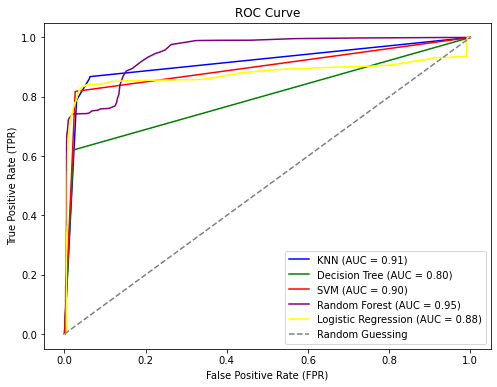

In [175]:
KNN_DoS.fit(X_DoS, Y_DoS)
y_score_model1 = KNN_DoS.predict_proba(X_DoS_test)[:, 1]
clf_DoS.fit(X_DoS, Y_DoS)
y_score_model2 = clf_DoS.predict_proba(X_DoS_test)[:, 1]
clf_SVM_DoS.fit(X_DoS, Y_DoS)
y_score_model3 = clf_SVM_DoS.predict(X_DoS_test)
RF_DoS.fit(X_DoS, Y_DoS)
y_score_model4  = RF_DoS.predict_proba(X_DoS_test)[:, 1]
logreg_model_Dos.fit(X_DoS, Y_DoS)
y_score_model5 = logreg_model_Dos.predict_proba(X_DoS_test)[:, 1]
fpr_kn, tpr_kn, _ = roc_curve(Y_DoS_test, y_score_model1)
roc_auc_kn = auc(fpr_kn, tpr_kn)
fpr_dt, tpr_dt, _ = roc_curve(Y_DoS_test, y_score_model2)
roc_auc_dt = auc(fpr_dt, tpr_dt)
fpr_sv, tpr_sv, _ = roc_curve(Y_DoS_test, y_score_model3)
roc_auc_sv = auc(fpr_sv, tpr_sv)
fpr_rf, tpr_rf, _ = roc_curve(Y_DoS_test, y_score_model4)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_lr, tpr_lr, _ = roc_curve(Y_DoS_test, y_score_model5)
roc_auc_lr = auc(fpr_lr, tpr_lr)


plt.figure(figsize=(8, 6))
plt.plot(fpr_kn, tpr_kn, label=f'KNN (AUC = {roc_auc_kn:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_sv, tpr_sv, label=f'SVM (AUC = {roc_auc_sv:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='purple')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curves plot of DoS datasets shows that Random Forest has the largest area under curve which is equal to 0.95. It means that RF model has a better overall ability to distinguish between the positive and negative classes compared to the others.Then comes KNN with an AUC=0.91 and so on . The least is decision tree with an AUC equal to 0.8 .

# ROC Curve For all method applied for Probe dataset

In [176]:
y_score_model1 = KNN_Probe.predict(X_Probe_test)
y_score_model2 = clf_Probe.predict(X_Probe_test)
y_score_model3 = clf_SVM_Probe.decision_function(X_Probe_test)
y_score_model4 = RF_Probe.predict(X_Probe_test)
y_score_model5 = logreg_model_Probe.predict(X_Probe_test)

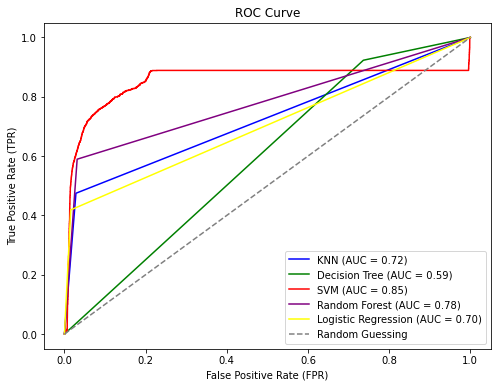

In [177]:
# Assuming Y_R2L_test contains labels in {0, 2}
# Convert labels to binary format
y_binary = np.where(Y_Probe_test == 4, 1, 0)

# Rest of your code remains unchanged
fpr_kn, tpr_kn, _ = roc_curve(y_binary, y_score_model1)
roc_auc_kn = auc(fpr_kn, tpr_kn)

fpr_dt, tpr_dt, _ = roc_curve(y_binary, y_score_model2)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_sv, tpr_sv, _ = roc_curve(y_binary, y_score_model3)
roc_auc_sv = auc(fpr_sv, tpr_sv)

fpr_rf, tpr_rf, _ = roc_curve(y_binary, y_score_model4)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_binary, y_score_model5)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kn, tpr_kn, label=f'KNN (AUC = {roc_auc_kn:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_sv, tpr_sv, label=f'SVM (AUC = {roc_auc_sv:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='purple')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curves plot for Probe datasets shows that SVM has the largest area under curve which is equal to 0.95. It means that SVM model has a better overall ability to distinguish between the positive and negative classes compared to the others.Then comes RF with an AUC=0.78 and so on . The least is decision tree with an AUC equal to 0.59 .

# ROC Curve For all method applied for R2L dataset

In [178]:
y_score_model1 = KNN_R2L.predict(X_R2L_test)
y_score_model2 = clf_R2L.predict(X_R2L_test)
y_score_model3 = clf_SVM_R2L.decision_function(X_R2L_test)
y_score_model4 = RF_R2L.predict(X_R2L_test)
y_score_model5 = logreg_model_R2L.predict(X_R2L_test)

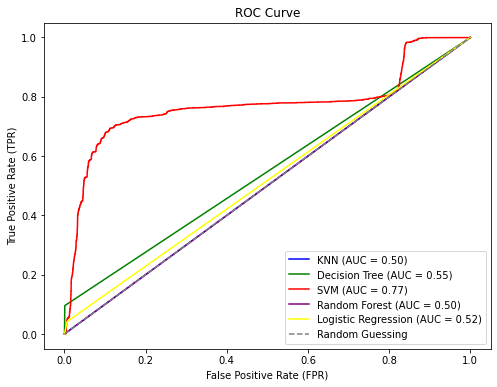

In [179]:
# Assuming Y_R2L_test contains labels in {0, 2}
# Convert labels to binary format
y_binary = np.where(Y_R2L_test == 2, 1, 0)

# Rest of your code remains unchanged
fpr_kn, tpr_kn, _ = roc_curve(y_binary, y_score_model1)
roc_auc_kn = auc(fpr_kn, tpr_kn)

fpr_dt, tpr_dt, _ = roc_curve(y_binary, y_score_model2)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_sv, tpr_sv, _ = roc_curve(y_binary, y_score_model3)
roc_auc_sv = auc(fpr_sv, tpr_sv)

fpr_rf, tpr_rf, _ = roc_curve(y_binary, y_score_model4)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_binary, y_score_model5)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kn, tpr_kn, label=f'KNN (AUC = {roc_auc_kn:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_sv, tpr_sv, label=f'SVM (AUC = {roc_auc_sv:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='purple')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curves plot for R2L datasets shows that SVM has the largest area under curve which is equal to 0.77. It means that SVM model has a better overall ability to distinguish between the positive and negative classes compared to the others.Then comes Decision tree with an AUC=0.55 and so on . The least is KNN and RF with an AUC equal to 0.5 . It means that KNN and RF's ability to distinguish between the positive and negative classes is no better than random guessing. Their ROC curve essentially hugs the diagonal line, and the model lacks discriminatory power.

# ROC Curve For all method applied for U2R dataset

In [180]:
y_score_model1 = KNN_U2R.predict(X_U2R_test)
y_score_model2 = clf_U2R.predict(X_U2R_test)
y_score_model3 = clf_SVM_U2R.decision_function(X_U2R_test)
y_score_model4 = RF_U2R.predict(X_U2R_test)
y_score_model5 = logreg_model_U2R.predict(X_U2R_test)

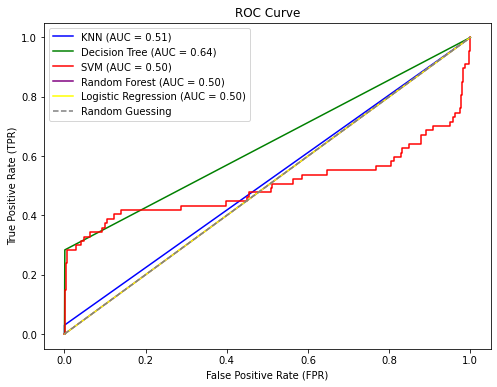

In [181]:
# Assuming Y_U2R_test contains labels in {0, 3}
# Convert labels to binary format
y_binary = np.where(Y_U2R_test == 3, 1, 0)

# Rest of your code remains unchanged
fpr_kn, tpr_kn, _ = roc_curve(y_binary, y_score_model1)
roc_auc_kn = auc(fpr_kn, tpr_kn)

fpr_dt, tpr_dt, _ = roc_curve(y_binary, y_score_model2)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_sv, tpr_sv, _ = roc_curve(y_binary, y_score_model3)
roc_auc_sv = auc(fpr_sv, tpr_sv)

fpr_rf, tpr_rf, _ = roc_curve(y_binary, y_score_model4)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_binary, y_score_model5)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kn, tpr_kn, label=f'KNN (AUC = {roc_auc_kn:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot(fpr_sv, tpr_sv, label=f'SVM (AUC = {roc_auc_sv:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='purple')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curves plot for U2R datasets shows that decision tree has the largest area under curve which is equal to 0.64. It means that DT model has a better overall ability to distinguish between the positive and negative classes compared to the others.Then comes KNN with an AUC=0.51 and so on.